# Home Credit Default Risk (HCDR)
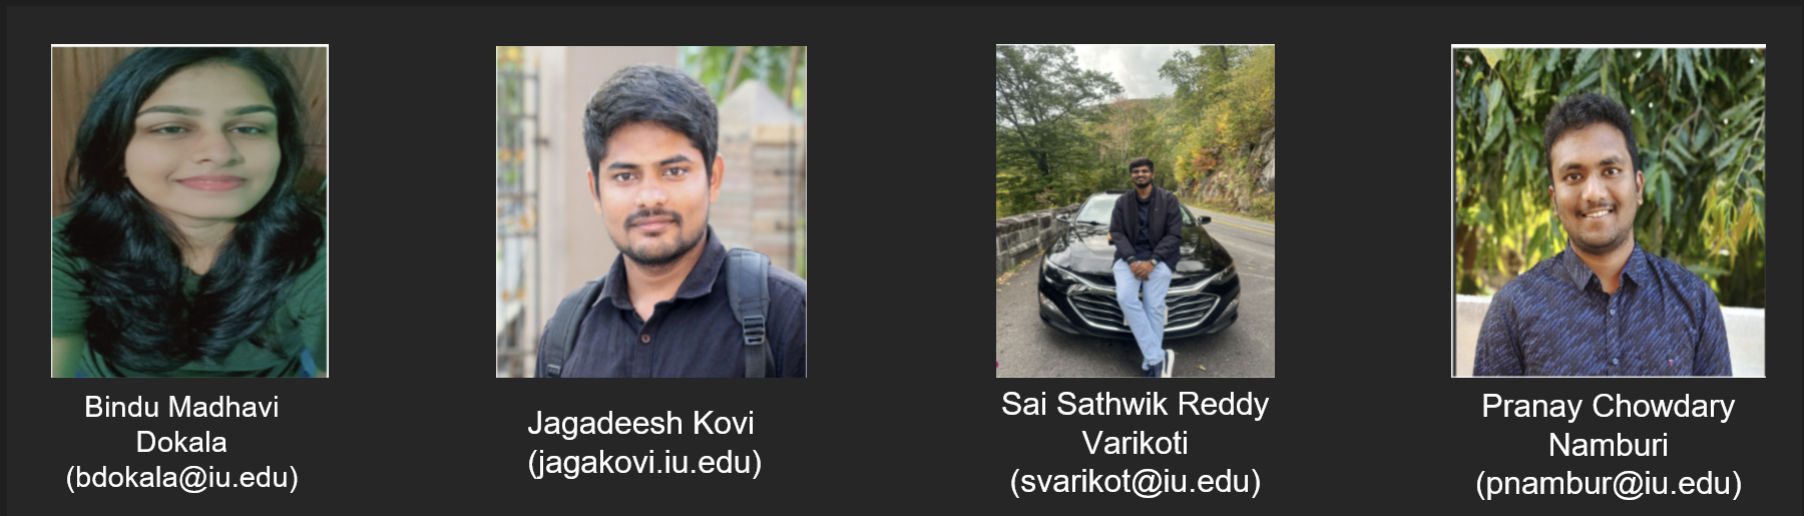

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size
   * (688 meg compressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g.,

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
!pip install kaggle

In [2]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!ls -l  ~/.kaggle/kaggle.json

In [ ]:
# We use this code when working with colab environment
# from google.colab import files
json_file_not_exists = True #Change this to false if you already have json from kaggle
if json_file_not_exists:
    files.upload()
    !mkdir ~/.kaggle
    !cp kaggle.json ~/.kaggle

Saving kaggle.json to kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions files home-credit-default-risk

name                                 size  creationDate         
----------------------------------  -----  -------------------  
sample_submission.csv               524KB  2019-12-11 02:55:35  
credit_card_balance.csv             405MB  2019-12-11 02:55:35  
installments_payments.csv           690MB  2019-12-11 02:55:35  
HomeCredit_columns_description.csv   37KB  2019-12-11 02:55:35  
bureau.csv                          162MB  2019-12-11 02:55:35  
application_test.csv                 25MB  2019-12-11 02:55:35  
POS_CASH_balance.csv                375MB  2019-12-11 02:55:35  
previous_application.csv            386MB  2019-12-11 02:55:35  
bureau_balance.csv                  358MB  2019-12-11 02:55:35  
application_train.csv               158MB  2019-12-11 02:55:35  


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview

The `HomeCredit_columns_description.csv` acts as a data dictioanry.

There are 7 different sources of data:

* __application_train/application_test (307k rows, and 48k rows):__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau (1.7 Million rows):__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance (27 Million rows):__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application (1.6 Million rows):__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE (10 Million rows):__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment (13.6 Million rows):__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


### Table sizes
```python
name                       [  rows cols]     MegaBytes         
-----------------------  ------------------  -------
application_train       : [  307,511, 122]:   158MB
application_test        : [   48,744, 121]:   25MB
bureau                  : [ 1,716,428, 17]    162MB
bureau_balance          : [ 27,299,925, 3]:   358MB
credit_card_balance     : [  3,840,312, 23]   405MB
installments_payments   : [ 13,605,401, 8]    690MB
previous_application    : [  1,670,214, 37]   386MB
POS_CASH_balance        : [ 10,001,358, 8]    375MB
```




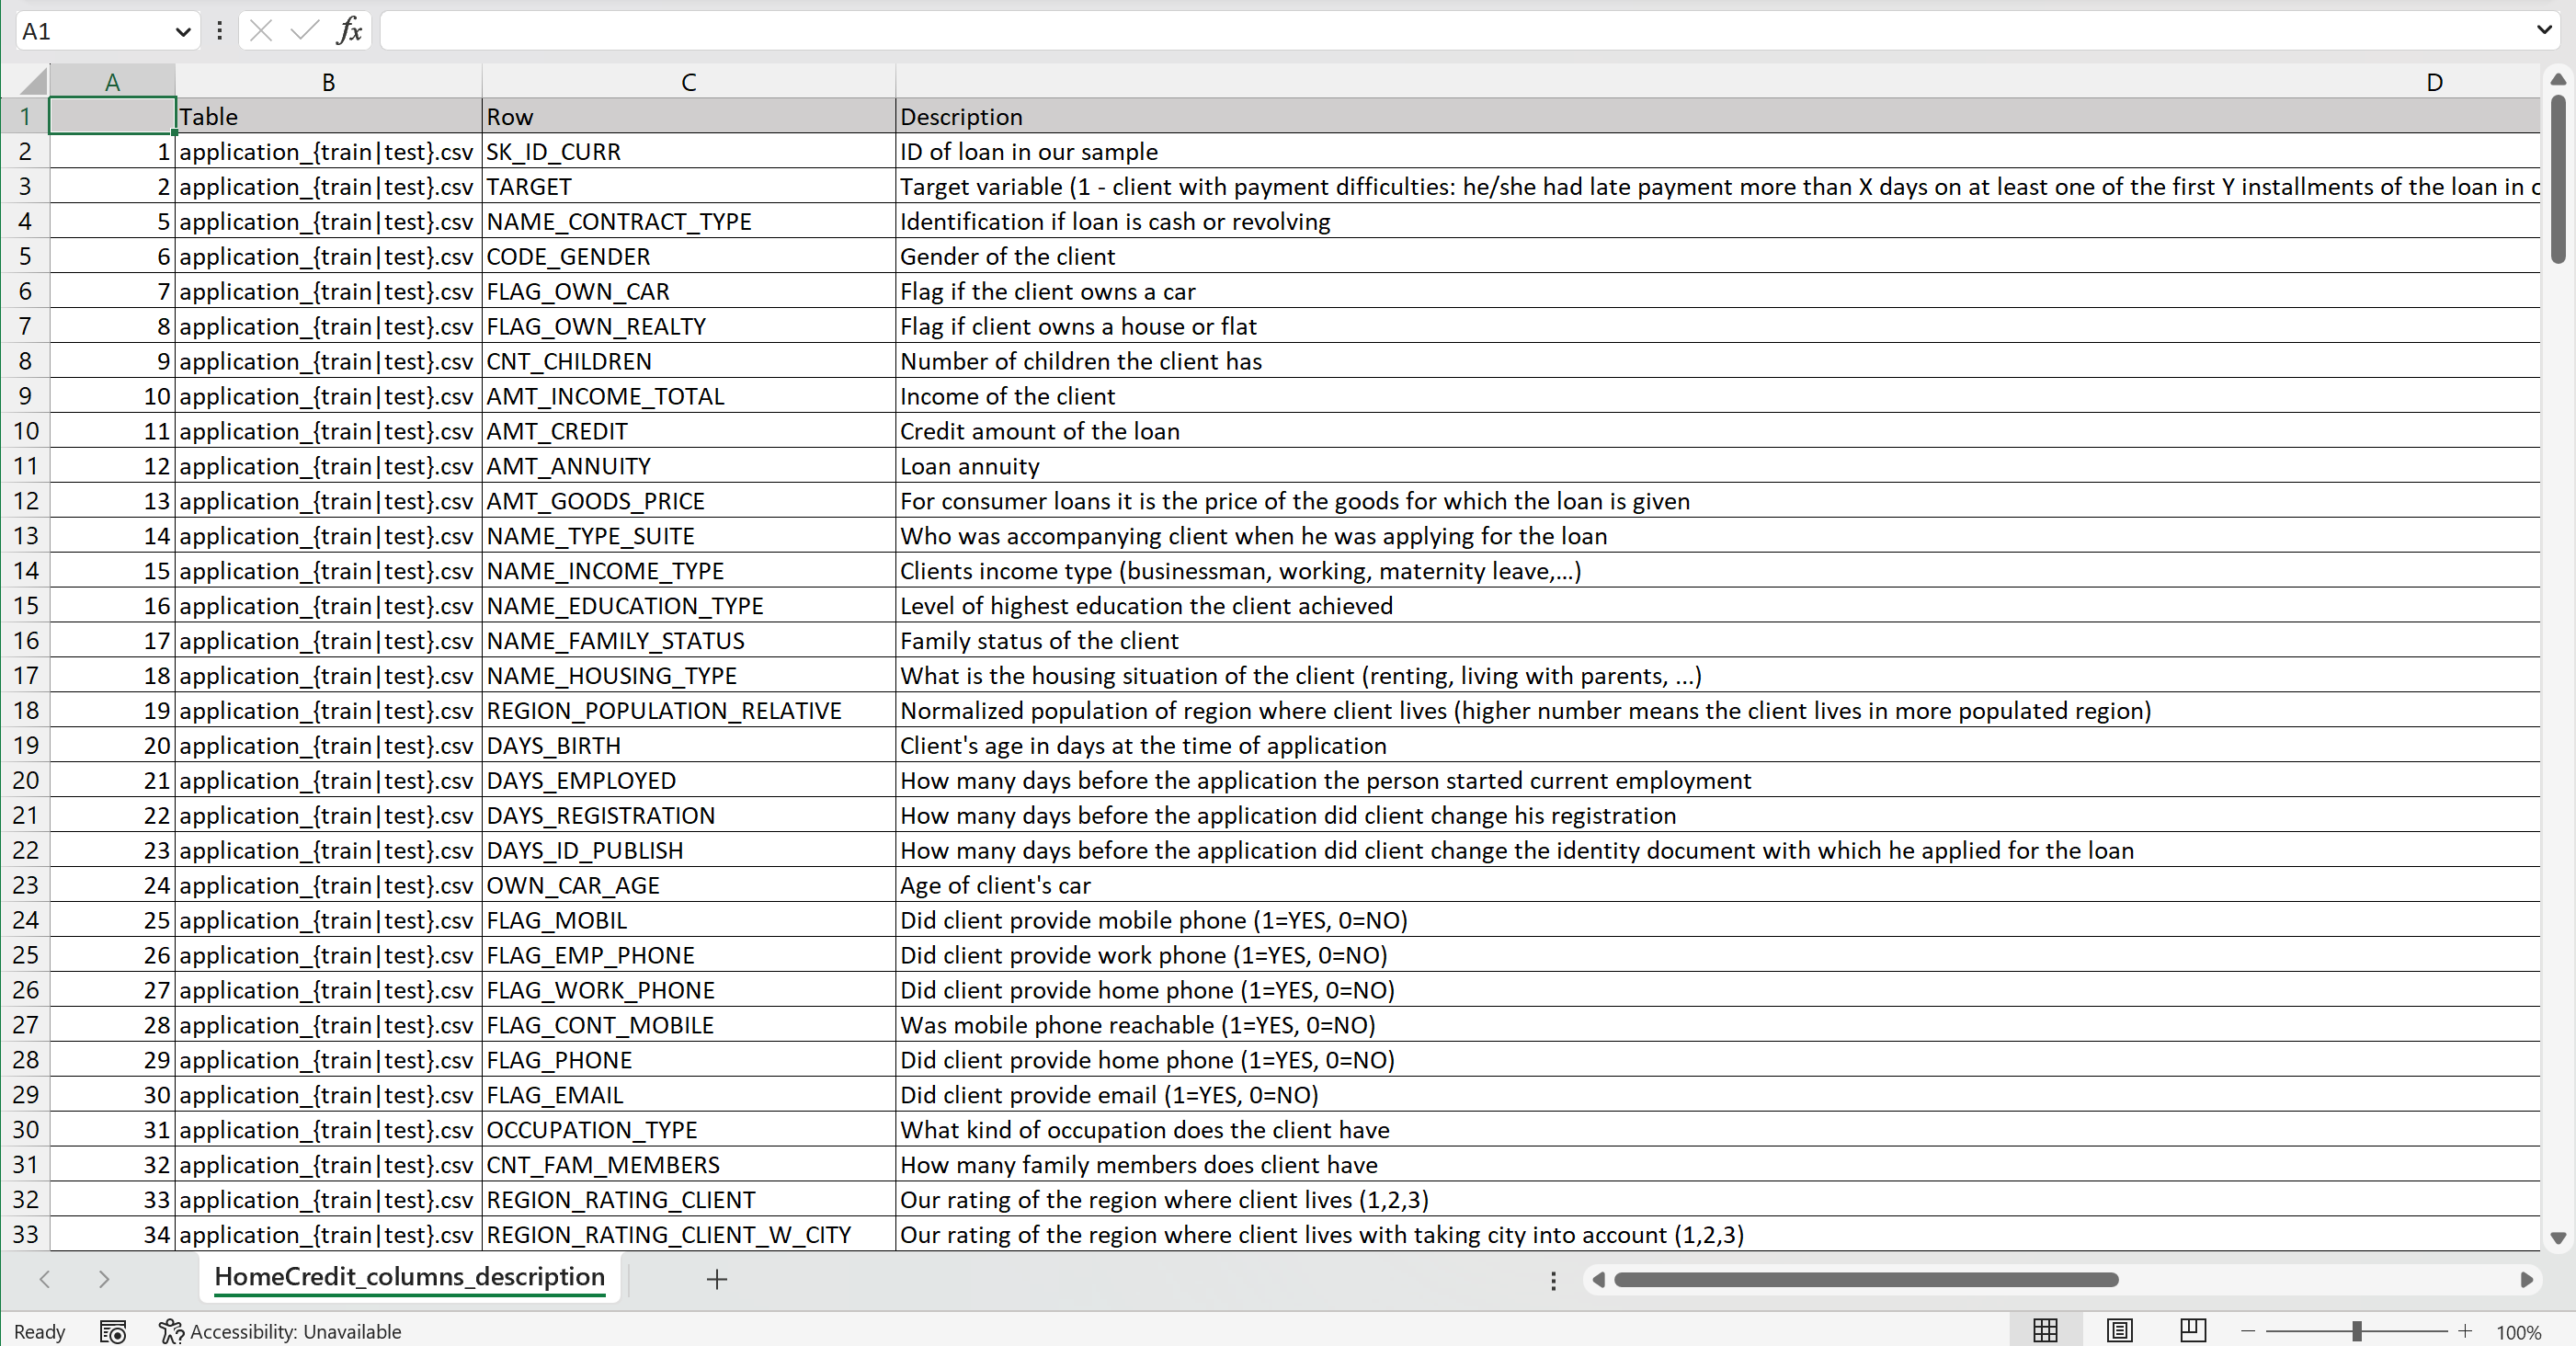

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [ ]:
# We use this code when working with colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DATA_DIR = "../Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir -p $DATA_DIR

The syntax of the command is incorrect.


In [3]:
!ls -l $DATA_DIR

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

home-credit-default-risk.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!pwd

/content


In [ ]:
!ls -l $DATA_DIR

total 704708
-rw-r--r-- 1 root root 721616255 Dec 11  2019 home-credit-default-risk.zip


### Imports

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
unzippingReq = False #True
if unzippingReq: #please modify this code
    zip_ref = zipfile.ZipFile(f'{DATA_DIR}/home-credit-default-risk.zip', 'r')
    # extractall():  Extract all members from the archive to the current working directory. path specifies a different directory to extract to
    zip_ref.extractall(DATA_DIR)
    zip_ref.close()


## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

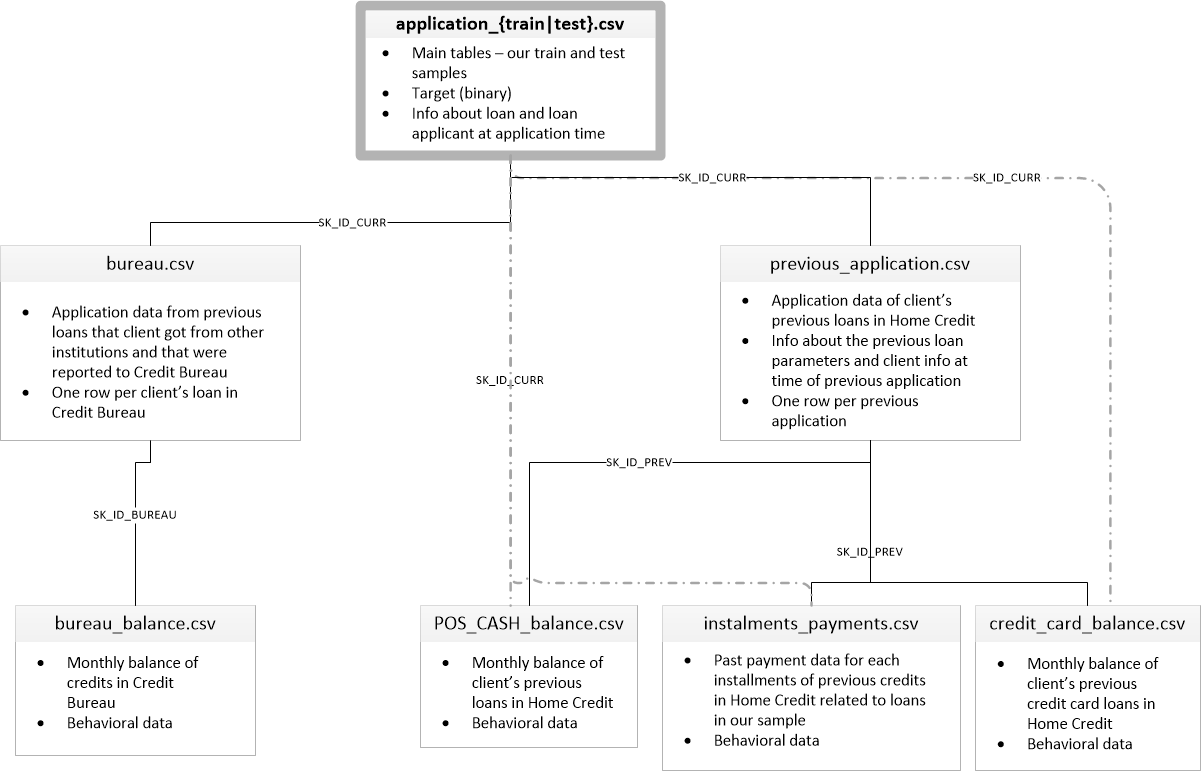

### Application train

In [4]:
ls -l ../../../Data/home-credit-default-risk/application_train.csv

Invalid switch - "..".


In [6]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
# DATA_DIR=f"{DATA_DIR}/home-credit-default-risk/"
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

In [7]:
DATA_DIR

'../Data/home-credit-default-risk'

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [8]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [9]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (4728516, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728516 entries, 0 to 4728515
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SK_ID_BUREAU    int64  
 1   MONTHS_BALANCE  float64
 2   STATUS          object 
dtypes: float64(1), int64(1), object(1)
memory usage: 108.2+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448             0.0      C
1       5715448            -1.0      C
2       5715448            -2.0      C
3       5715448            -3.0      C
4       5715448            -4.0      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: total: 18.6 s
Wall time: 31 s


In [10]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [  4,728,516, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Function to plot the missing values

In [11]:
def plot_missing_data(df, x, y):
    g = sns.displot(
        data=datasets[df].isna().melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    g.fig.set_figwidth(x)
    g.fig.set_figheight(y)

## Summary of Application train

In [12]:
datasets["application_train"].info()
datasets["application_train"].columns
datasets["application_train"].dtypes
datasets["application_train"].describe() #numerical only features
datasets["application_train"].describe(include='all') #look at all categorical and numerical
datasets["application_train"].corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485 -0.012462     -0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025 -0.002022     -0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930     -0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             -0.003982   -0.030369    -0.012817   
CNT_CHILDREN                        0.012882    0.002145     0.021374   
AMT_INCOME_TOTAL                    1.000000    0.156870     0.191657   
AMT_CREDIT                          0.156870    1.000000     0.770138   
...                                      ...         ...          ...   
AMT_REQ_CREDIT_BUREAU_DAY           0.002944    0.004238     0.002185   
AMT_REQ_CREDIT_BUREAU_WEEK          0.002387   -0.001275     0.013881   
AMT_REQ_CREDIT_BUREAU_MON           0.024700    0.054451     0.039148   
AMT_REQ_CREDIT_BUREAU_QRT           0.004859    0.015925     0.010124   
AMT_REQ_CREDIT_BUREAU_YEAR          0.011690   -0.048448    -0.011320   

                            AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
SK_ID_CURR                        -0.000232                    0.000849   
TARGET                            -0.039645                   -0.037227   
CNT_CHILDREN                      -0.001827                   -0.025573   
AMT_INCOME_TOTAL                   0.159610                    0.074796   
AMT_CREDIT                         0.986968                    0.099738   
...                                     ...                         ...   
AMT_REQ_CREDIT_BUREAU_DAY          0.004677                    0.001399   
AMT_REQ_CREDIT_BUREAU_WEEK        -0.001007                   -0.002149   
AMT_REQ_CREDIT_BUREAU_MON          0.056422                    0.078607   
AMT_REQ_CREDIT_BUREAU_QRT          0.016432                   -0.001279   
AMT_REQ_CREDIT_BUREAU_YEAR        -0.050998                    0.001003   

                            DAYS_BIRTH  DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  \
SK_ID_CURR                   -0.001500       0.001366  ...          0.000509   
TARGET                        0.078239      -0.044932  ...         -0.007952   
CNT_CHILDREN                  0.330938      -0.239818  ...          0.004031   
AMT_INCOME_TOTAL              0.027261      -0.064223  ...          0.003130   
AMT_CREDIT                   -0.055436      -0.066838  ...          0.034329   
...                                ...            ...  ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.002255       0.000472  ...          0.013281   
AMT_REQ_CREDIT_BUREAU_WEEK   -0.001336       0.003072  ...         -0.004640   
AMT_REQ_CREDIT_BUREAU_MON     0.001372      -0.034457  ...         -0.001565   
AMT_REQ_CREDIT_BUREAU_QRT    -0.011799       0.015345  ...         -0.005125   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.071983       0.049988  ...         -0.047432   

                            FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
SK_ID_CURR                          0.000167          0.001073   
TARGET                             -0.001358          0.000215   
CNT_CHILDREN                        0.000864          0.000988   
AMT_INCOME_TOTAL                    0.002408          0.000242   
AMT_CREDIT                          0.021082          0.031023   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY         

### Missing data for application train

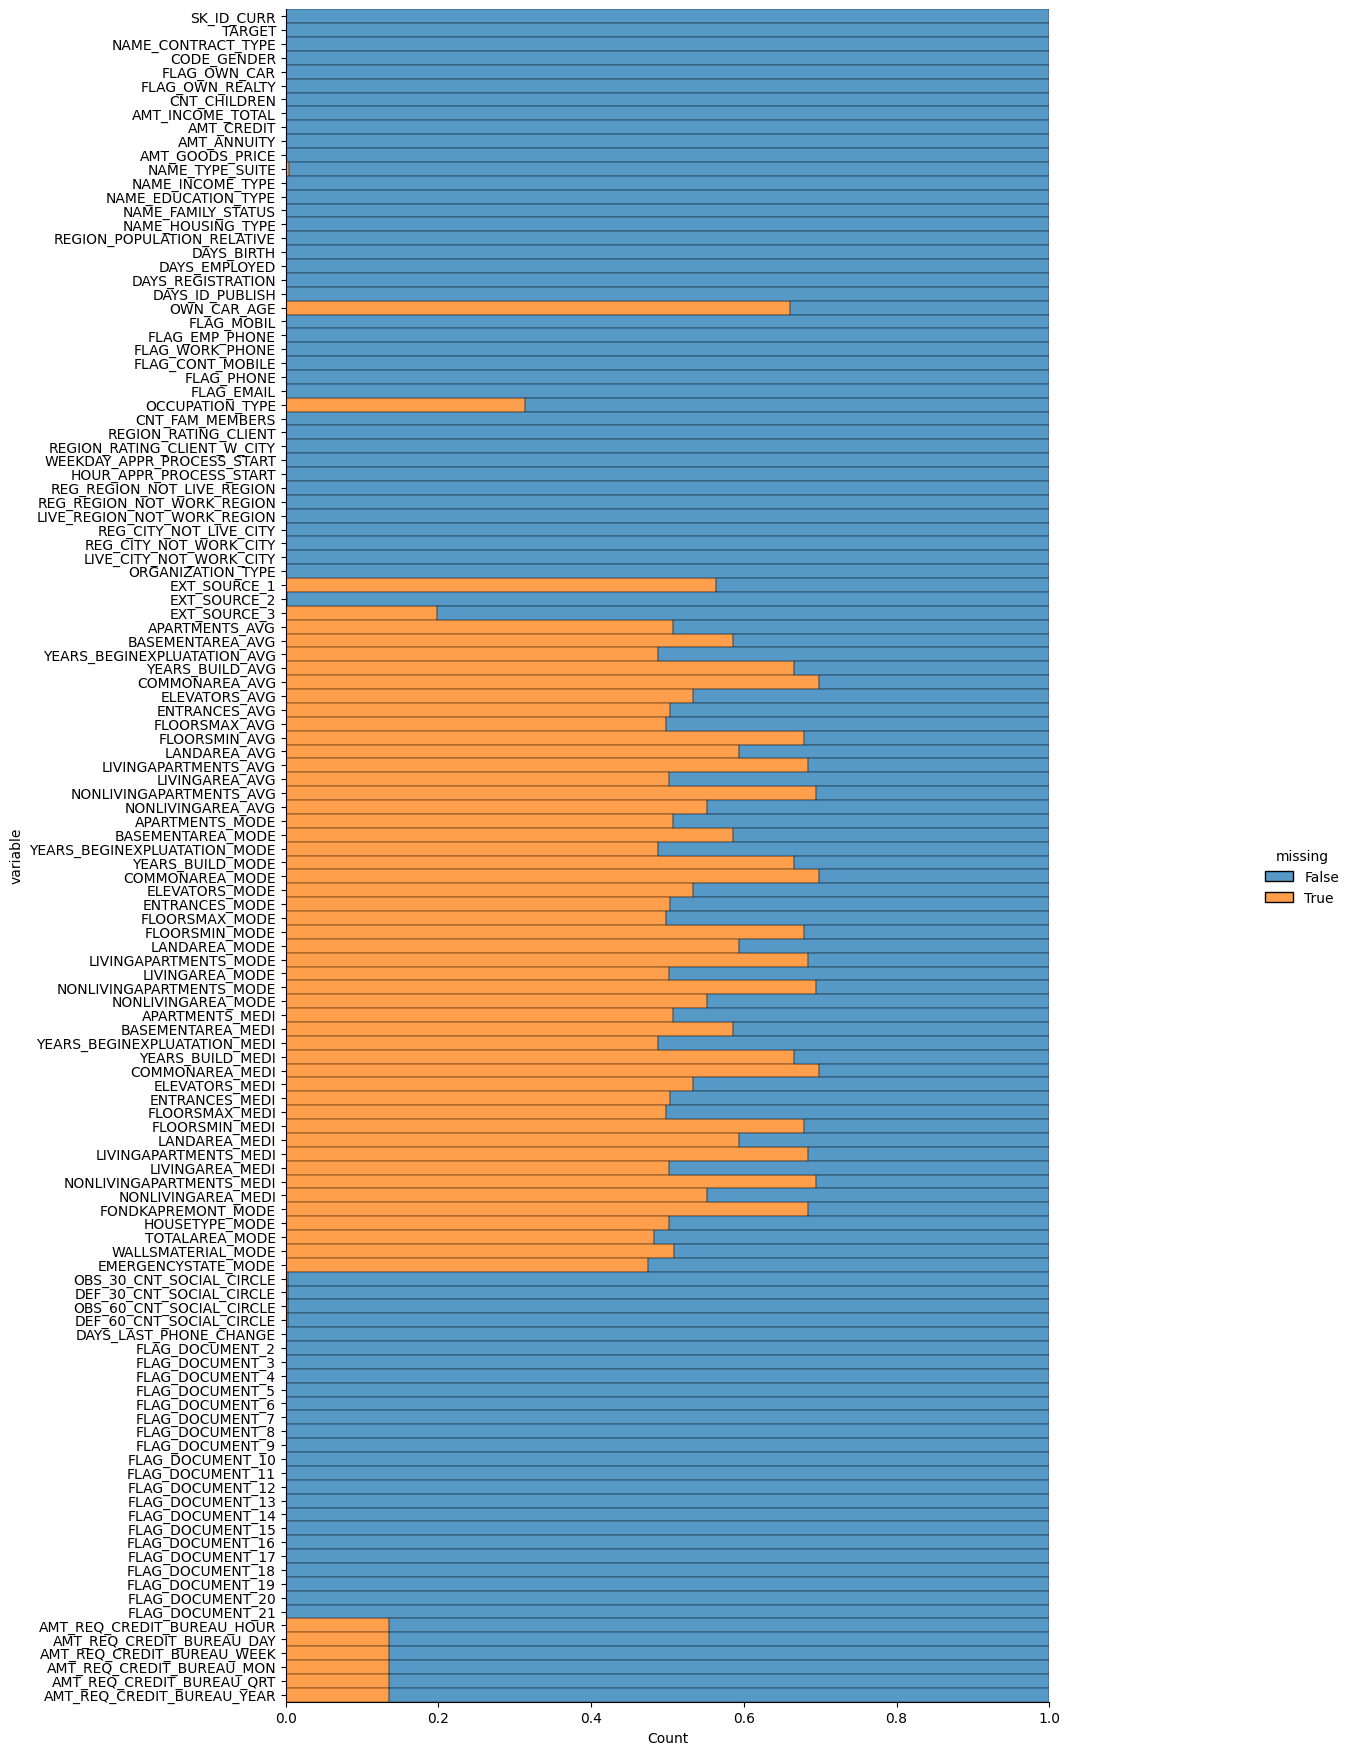

In [13]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)
plot_missing_data("application_train", 18, 20)

## Summary of Application test


In [14]:
datasets["application_test"].info()
datasets["application_test"].columns
datasets["application_test"].dtypes
datasets["application_test"].describe() #numerical only features
datasets["application_test"].describe(include='all')
datasets["application_test"].corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                    1.000000      0.000635          0.001278   
CNT_CHILDREN                  0.000635      1.000000          0.038962   
AMT_INCOME_TOTAL              0.001278      0.038962          1.000000   
AMT_CREDIT                    0.005014      0.027840          0.396572   
AMT_ANNUITY                   0.007112      0.056770          0.457833   
...                                ...           ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.001083      0.001539          0.004989   
AMT_REQ_CREDIT_BUREAU_WEEK    0.001178      0.007523         -0.002867   
AMT_REQ_CREDIT_BUREAU_MON     0.000430     -0.008337          0.008691   
AMT_REQ_CREDIT_BUREAU_QRT    -0.002092      0.029006          0.007410   
AMT_REQ_CREDIT_BUREAU_YEAR    0.003457     -0.039265          0.003281   

                            AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR                    0.005014     0.007112         0.005097   
CNT_CHILDREN                  0.027840     0.056770         0.025507   
AMT_INCOME_TOTAL              0.396572     0.457833         0.401995   
AMT_CREDIT                    1.000000     0.777733         0.988056   
AMT_ANNUITY                   0.777733     1.000000         0.787033   
...                                ...          ...              ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.004882     0.006681         0.004865   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002904     0.003085         0.003358   
AMT_REQ_CREDIT_BUREAU_MON    -0.000156     0.005695        -0.000254   
AMT_REQ_CREDIT_BUREAU_QRT    -0.007750     0.012443        -0.008490   
AMT_REQ_CREDIT_BUREAU_YEAR   -0.034533    -0.044901        -0.036227   

                            REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
SK_ID_CURR                                    0.003324    0.002325   
CNT_CHILDREN                                 -0.015231    0.317877   
AMT_INCOME_TOTAL                              0.199773    0.054400   
AMT_CREDIT                                    0.135694   -0.046169   
AMT_ANNUITY                                   0.150864    0.047859   
...                                                ...         ...   
AMT_REQ_CREDIT_BUREAU_DAY                    -0.011773   -0.000386   
AMT_REQ_CREDIT_BUREAU_WEEK                   -0.008321    0.012422   
AMT_REQ_CREDIT_BUREAU_MON                     0.000105    0.014094   
AMT_REQ_CREDIT_BUREAU_QRT                    -0.026650    0.088752   
AMT_REQ_CREDIT_BUREAU_YEAR                    0.001015   -0.095551   

                            DAYS_EMPLOYED  DAYS_REGISTRATION  ...  \
SK_ID_CURR                      -0.000845           0.001032  ...   
CNT_CHILDREN                    -0.238319           0.175054  ...   
AMT_INCOME_TOTAL                -0.154619           0.067973  ...   
AMT_CREDIT                      -0.083483           0.030740  ...   
AMT_ANNUITY                     -0.137772           0.064450  ...   
...                                   ...                ...  ...   
AMT_REQ_CREDIT_BUREAU_DAY       -0.000785          -0.000152  ...   
AMT_REQ_CREDIT_BUREAU_WEEK      -0.014058           0.008692  ...   
AMT_REQ_CREDIT_BUREAU_MON       -0.013891           0.007414  ...   
AMT_REQ_CREDIT_BUREAU_QRT       -0.044351           0.046011  ...   
AMT_REQ_CREDIT_BUREAU_YEAR       0.064698          -0.036887  ...   

                            FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
SK_ID_CURR                         -0.006286               NaN   
CNT_CHILDREN                       -0.000862               NaN   
AMT_INCOME_TOTAL                   -0.006624               NaN   
AMT_CREDIT                         -0.000197               NaN   
AMT_ANNUITY                        -0.010762               NaN   
...                                      ...               ...   
AMT_REQ_CREDIT_BUREAU_DAY          -0.001515               NaN   
AMT_REQ_CREDIT_BUREAU_WEEK          0.009205               NaN   
AMT_REQ_CR


### Missing data for Application test


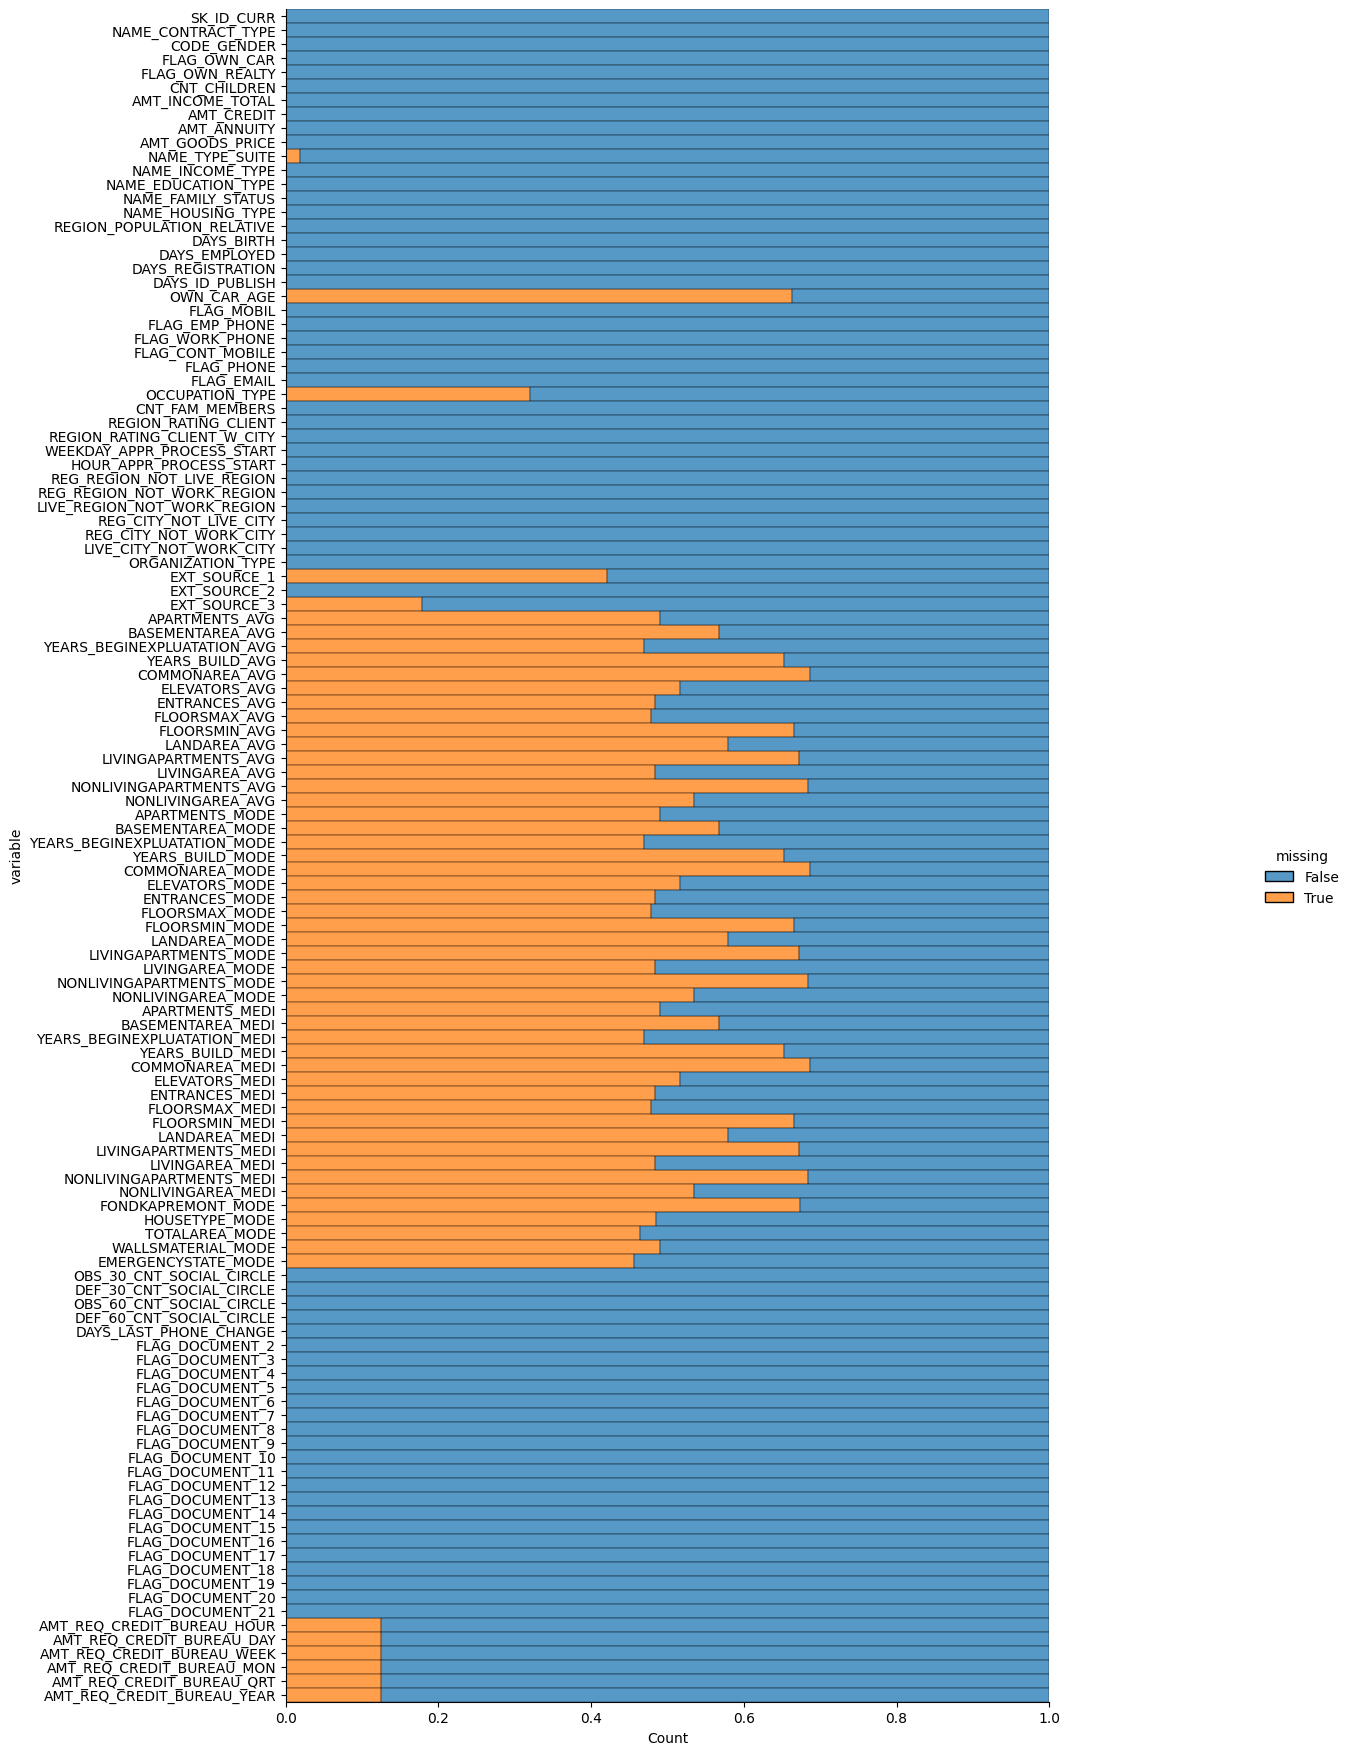

In [15]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)
plot_missing_data("application_test", 18, 20)

## Summary of Bureau


In [16]:
datasets["bureau"].info()
datasets["bureau"].columns
datasets["bureau"].dtypes
datasets["bureau"].describe()
datasets["bureau"].describe(include="all")
datasets["bureau"].corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


SK_ID_CURR  SK_ID_BUREAU  DAYS_CREDIT  \
SK_ID_CURR                1.000000      0.000135     0.000266   
SK_ID_BUREAU              0.000135      1.000000     0.013015   
DAYS_CREDIT               0.000266      0.013015     1.000000   
CREDIT_DAY_OVERDUE        0.000283     -0.002628    -0.027266   
DAYS_CREDIT_ENDDATE       0.000456      0.009107     0.225682   
DAYS_ENDDATE_FACT        -0.000648      0.017890     0.875359   
AMT_CREDIT_MAX_OVERDUE    0.001329      0.002290    -0.014724   
CNT_CREDIT_PROLONG       -0.000388     -0.000740    -0.030460   
AMT_CREDIT_SUM            0.001179      0.007962     0.050883   
AMT_CREDIT_SUM_DEBT      -0.000790      0.005732     0.135397   
AMT_CREDIT_SUM_LIMIT     -0.000304     -0.003986     0.025140   
AMT_CREDIT_SUM_OVERDUE   -0.000014     -0.000499    -0.000383   
DAYS_CREDIT_UPDATE        0.000510      0.019398     0.688771   
AMT_ANNUITY              -0.002727      0.001799     0.005676   

                        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  \
SK_ID_CURR                        0.000283             0.000456   
SK_ID_BUREAU                     -0.002628             0.009107   
DAYS_CREDIT                      -0.027266             0.225682   
CREDIT_DAY_OVERDUE                1.000000            -0.007352   
DAYS_CREDIT_ENDDATE              -0.007352             1.000000   
DAYS_ENDDATE_FACT                -0.008637             0.248825   
AMT_CREDIT_MAX_OVERDUE            0.001249             0.000577   
CNT_CREDIT_PROLONG                0.002756             0.113683   
AMT_CREDIT_SUM                   -0.003292             0.055424   
AMT_CREDIT_SUM_DEBT              -0.002355             0.081298   
AMT_CREDIT_SUM_LIMIT             -0.000345             0.095421   
AMT_CREDIT_SUM_OVERDUE            0.090951             0.001077   
DAYS_CREDIT_UPDATE               -0.018461             0.248525   
AMT_ANNUITY                      -0.000339             0.000475   

                        DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
SK_ID_CURR                      -0.000648                0.001329   
SK_ID_BUREAU                     0.017890                0.002290   
DAYS_CREDIT                      0.875359               -0.014724   
CREDIT_DAY_OVERDUE              -0.008637                0.001249   
DAYS_CREDIT_ENDDATE              0.248825                0.000577   
DAYS_ENDDATE_FACT                1.000000                0.000999   
AMT_CREDIT_MAX_OVERDUE           0.000999                1.000000   
CNT_CREDIT_PROLONG               0.012017                0.001523   
AMT_CREDIT_SUM                   0.059096                0.081663   
AMT_CREDIT_SUM_DEBT              0.019609                0.014007   
AMT_CREDIT_SUM_LIMIT             0.019476               -0.000112   
AMT_CREDIT_SUM_OVERDUE          -0.000332                0.015036   
DAYS_CREDIT_UPDATE               0.751294               -0.000749   
AMT_ANNUITY                      0.006274                0.001578   

                        CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
SK_ID_CURR                       -0.000388        0.001179   
SK_ID_BUREAU                     -0.000740        0.007962   
DAYS_CREDIT                      -0.030460        0.050883   
CREDIT_DAY_OVERDUE                0.002756       -0.003292   
DAYS_CREDIT_ENDDATE               0.113683        0.055424   
DAYS_ENDDATE_FACT                 0.012017        0.059096   
AMT_CREDIT_MAX_OVERDUE            0.001523        0.081663   
CNT_CREDIT_PROLONG                1.000000       -0.008345   
AMT_CREDIT_SUM                   -0.008345        1.000000   
AMT_CREDIT_SUM_DEBT              -0.001366        0.683419   
AMT_CREDIT_SUM_LIMIT              0.073805        0.003756   
AMT_CREDIT_SUM_OVERDUE            0.000002        0.006342   
DAYS_CREDIT_UPDATE                0.017864        0.104629   
AMT_ANNUITY                      -0.000465        0.049146   

                        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  \
SK_ID_

### Missing data for Bureau

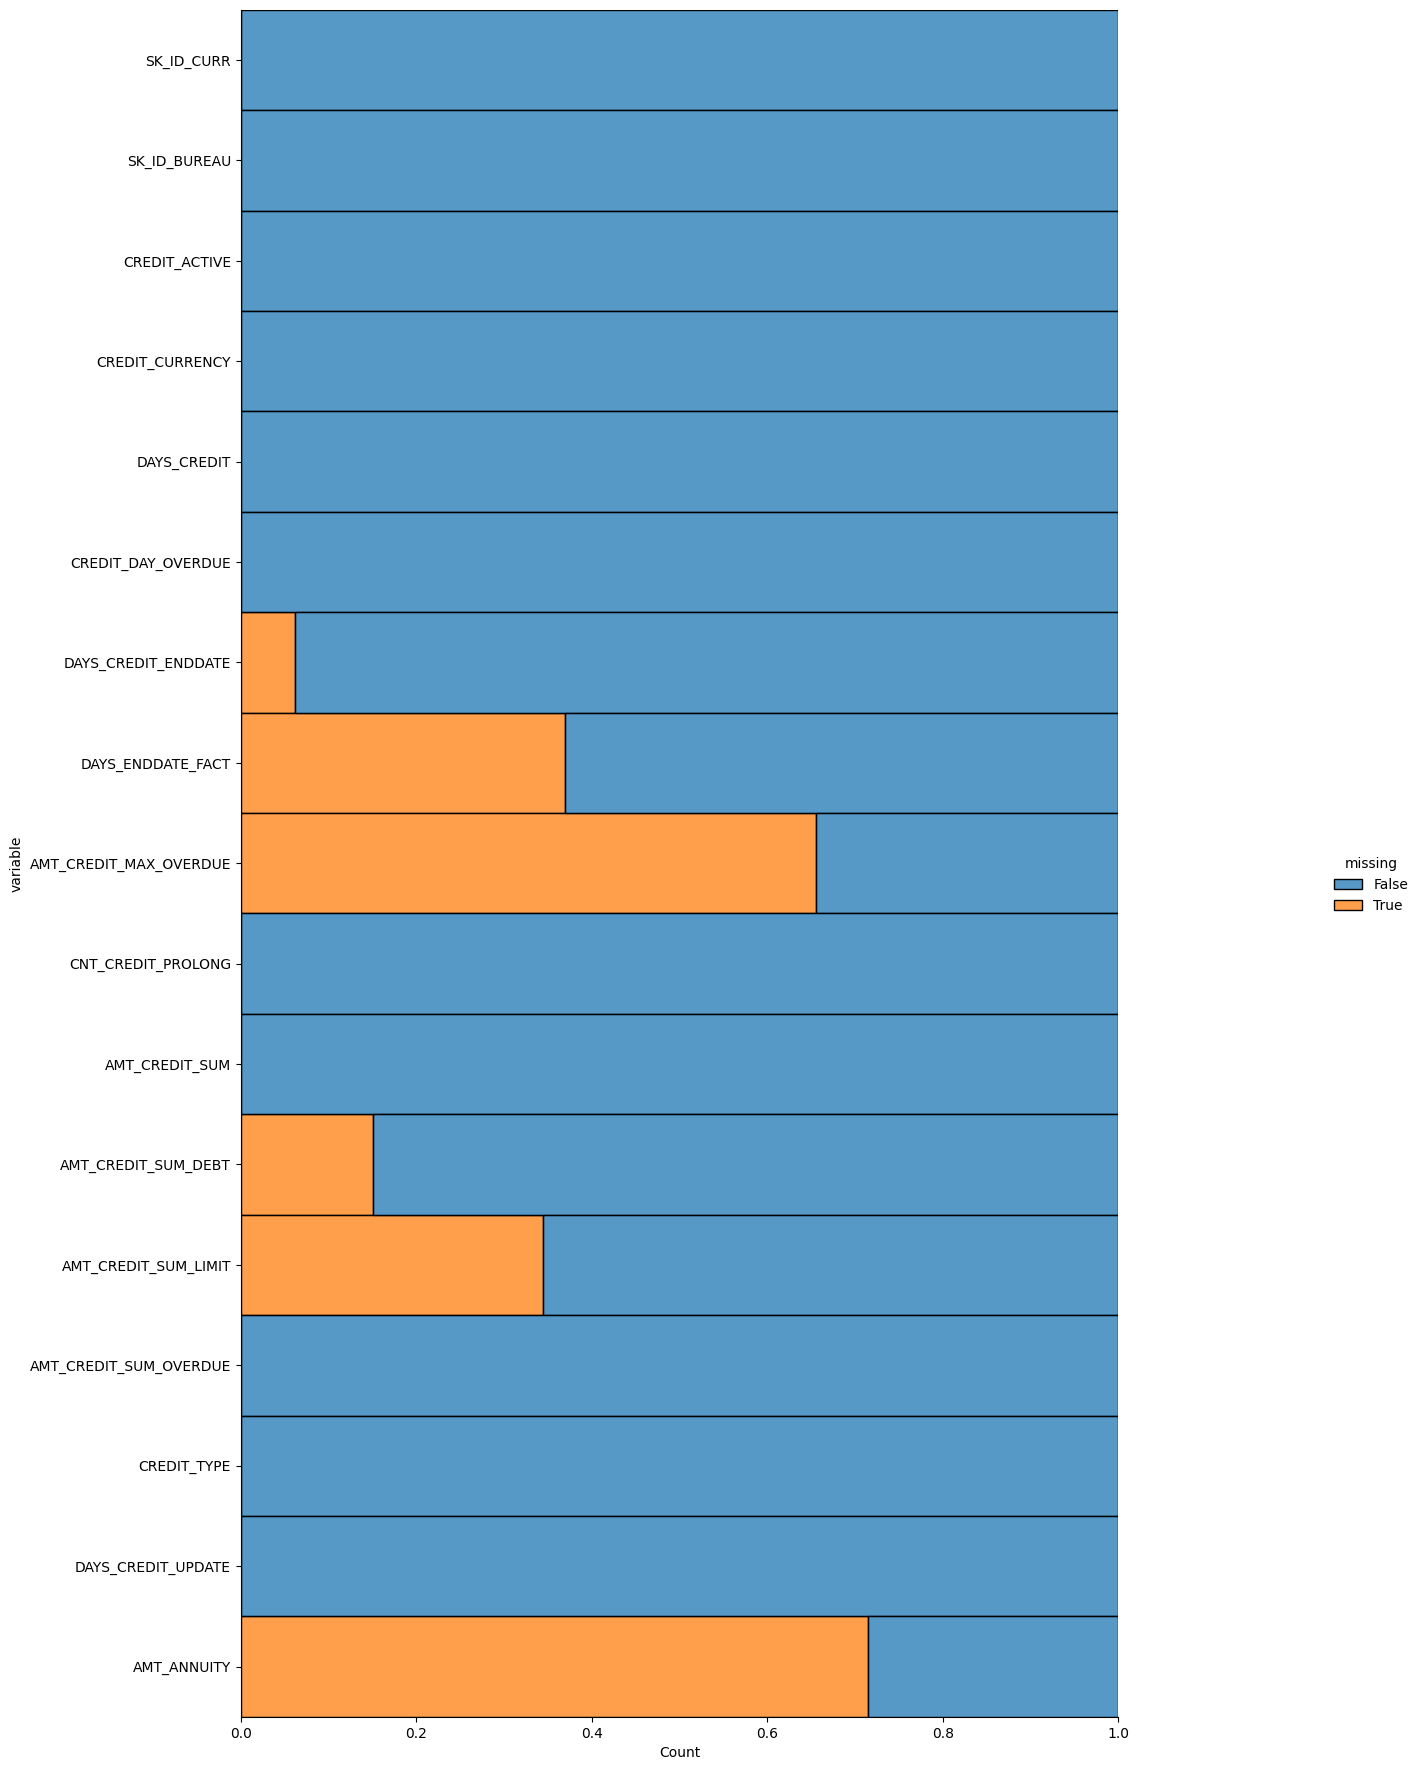

In [17]:
percent = (datasets["bureau"].isnull().sum()/datasets["bureau"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)
plot_missing_data("bureau",18,20)

## Summary of Bureau Balance

In [18]:
datasets["bureau_balance"].info()
datasets["bureau_balance"].columns
datasets["bureau_balance"].dtypes
datasets["bureau_balance"].describe()
datasets["bureau_balance"].describe(include='all')
datasets["bureau_balance"].corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728516 entries, 0 to 4728515
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SK_ID_BUREAU    int64  
 1   MONTHS_BALANCE  float64
 2   STATUS          object 
dtypes: float64(1), int64(1), object(1)
memory usage: 108.2+ MB


SK_ID_BUREAU  MONTHS_BALANCE
SK_ID_BUREAU        1.000000       -0.013447
MONTHS_BALANCE     -0.013447        1.000000

### Missing Data for Bureau Balance


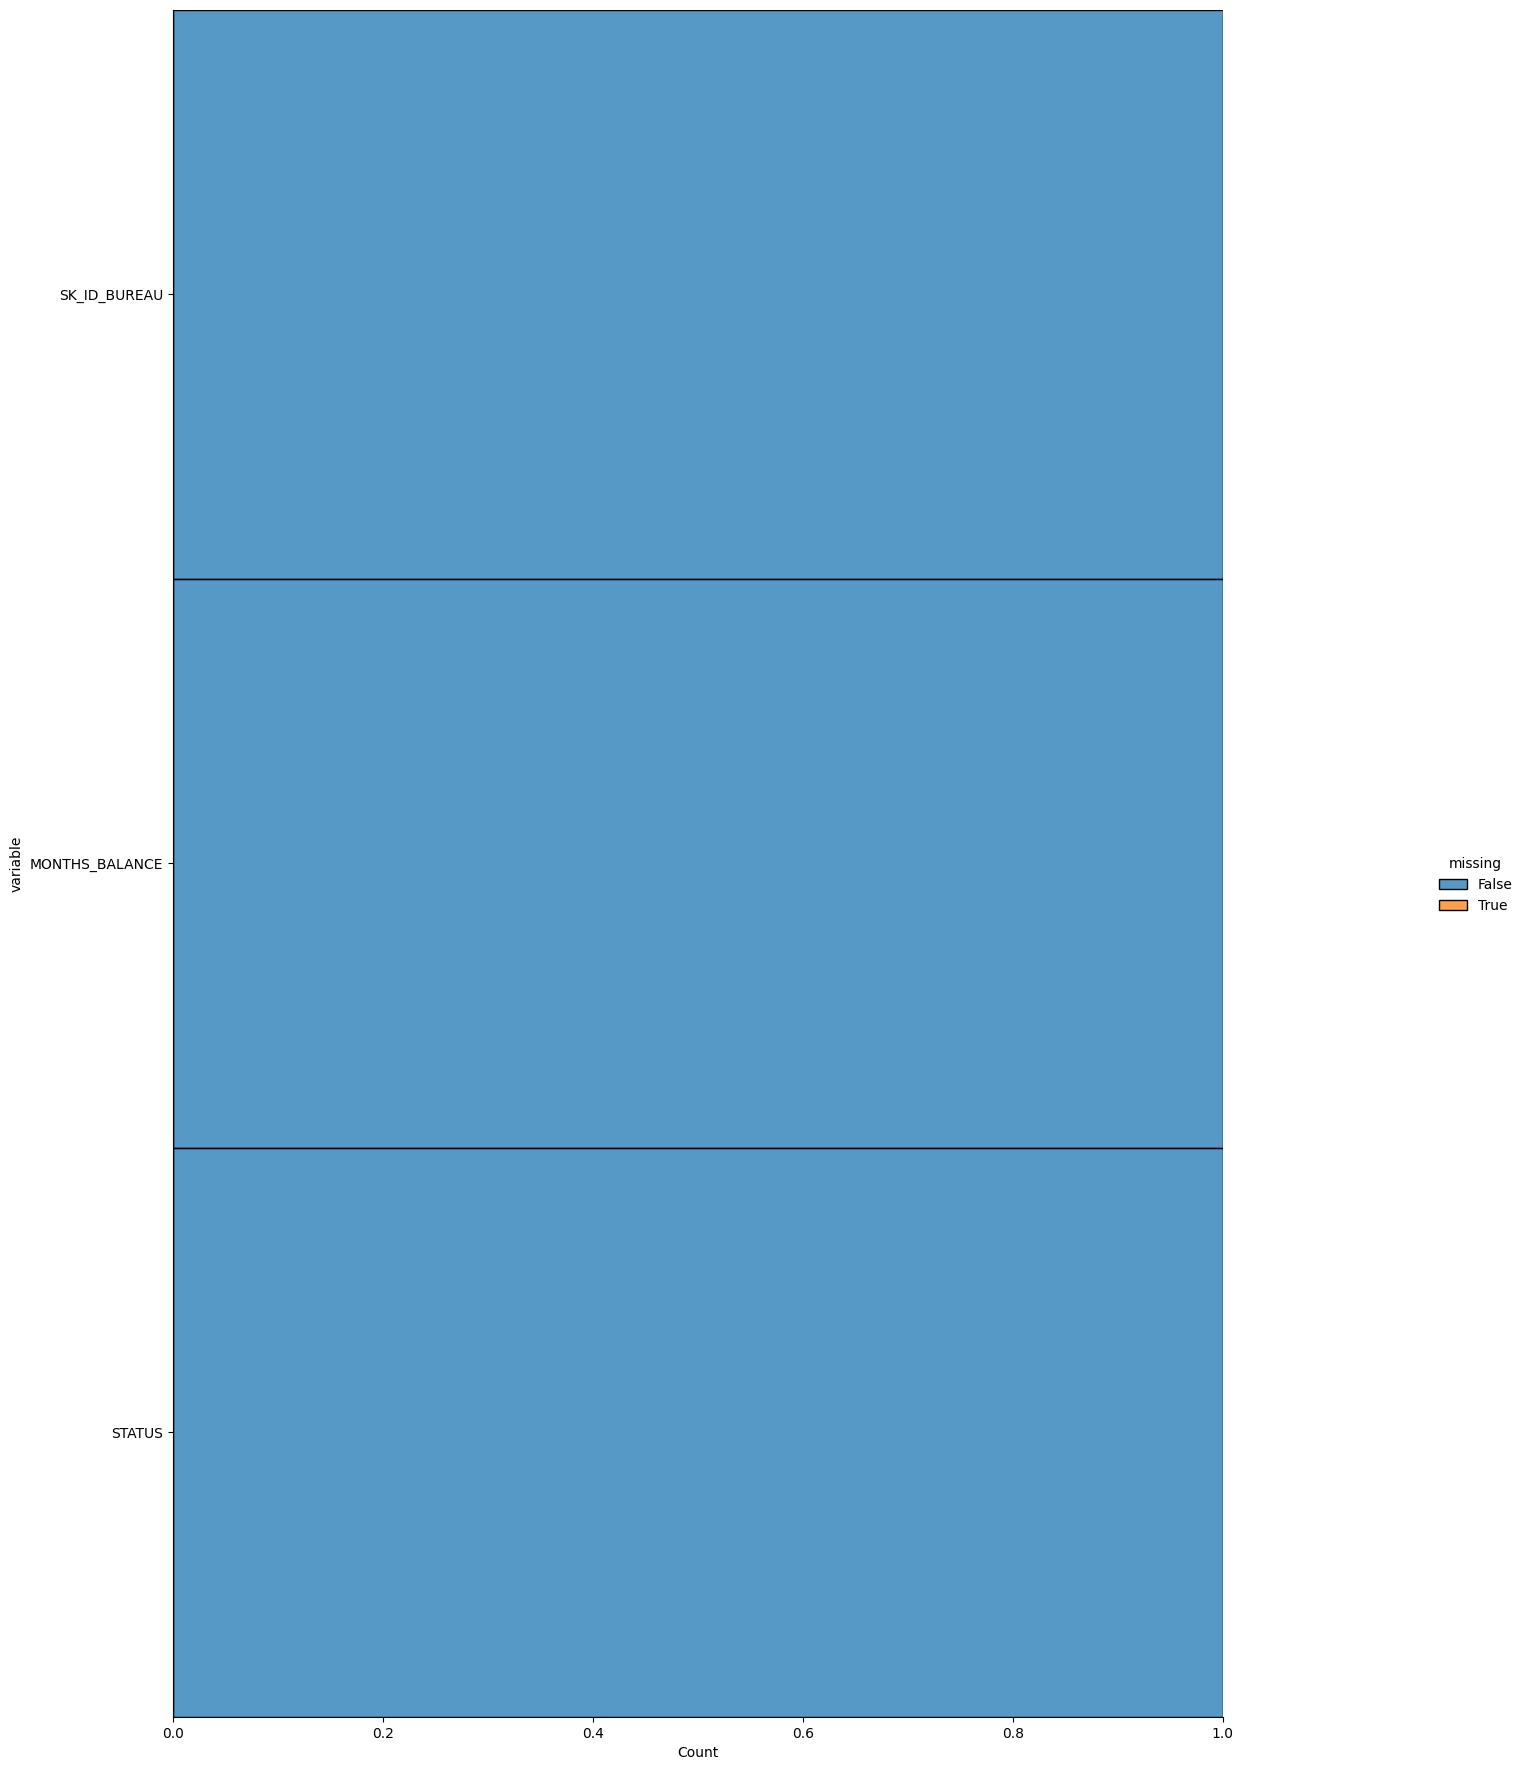

In [19]:
percent = (datasets["bureau_balance"].isnull().sum()/datasets["bureau_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["bureau_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)
plot_missing_data("bureau_balance",18,20)

## Summary of POS_CASH_balance


In [20]:
datasets["POS_CASH_balance"].info()
datasets["POS_CASH_balance"].columns
datasets["POS_CASH_balance"].dtypes
datasets["POS_CASH_balance"].describe()
datasets["POS_CASH_balance"].describe(include='all')
datasets["POS_CASH_balance"].corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
SK_ID_PREV               1.000000   -0.000336        0.001835        0.003820   
SK_ID_CURR              -0.000336    1.000000        0.000404        0.000144   
MONTHS_BALANCE           0.001835    0.000404        1.000000        0.336163   
CNT_INSTALMENT           0.003820    0.000144        0.336163        1.000000   
CNT_INSTALMENT_FUTURE    0.003679   -0.000559        0.271595        0.871276   
SK_DPD                  -0.000487    0.003118       -0.018939       -0.060803   
SK_DPD_DEF               0.004848    0.001948       -0.000381       -0.014154   

                       CNT_INSTALMENT_FUTURE    SK_DPD  SK_DPD_DEF  
SK_ID_PREV                          0.003679 -0.000487    0.004848  
SK_ID_CURR                         -0.000559  0.003118    0.001948  
MONTHS_BALANCE                      0.271595 -0.018939   -0.000381  
CNT_INSTALMENT                      0.871276 -0.060803   -0.014154  
CNT_INSTALMENT_FUTURE               1.000000 -0.082004   -0.017436  
SK_DPD                             -0.082004  1.000000    0.245782  
SK_DPD_DEF                         -0.017436  0.245782    1.000000

### Missing values for POS_CASH_balance


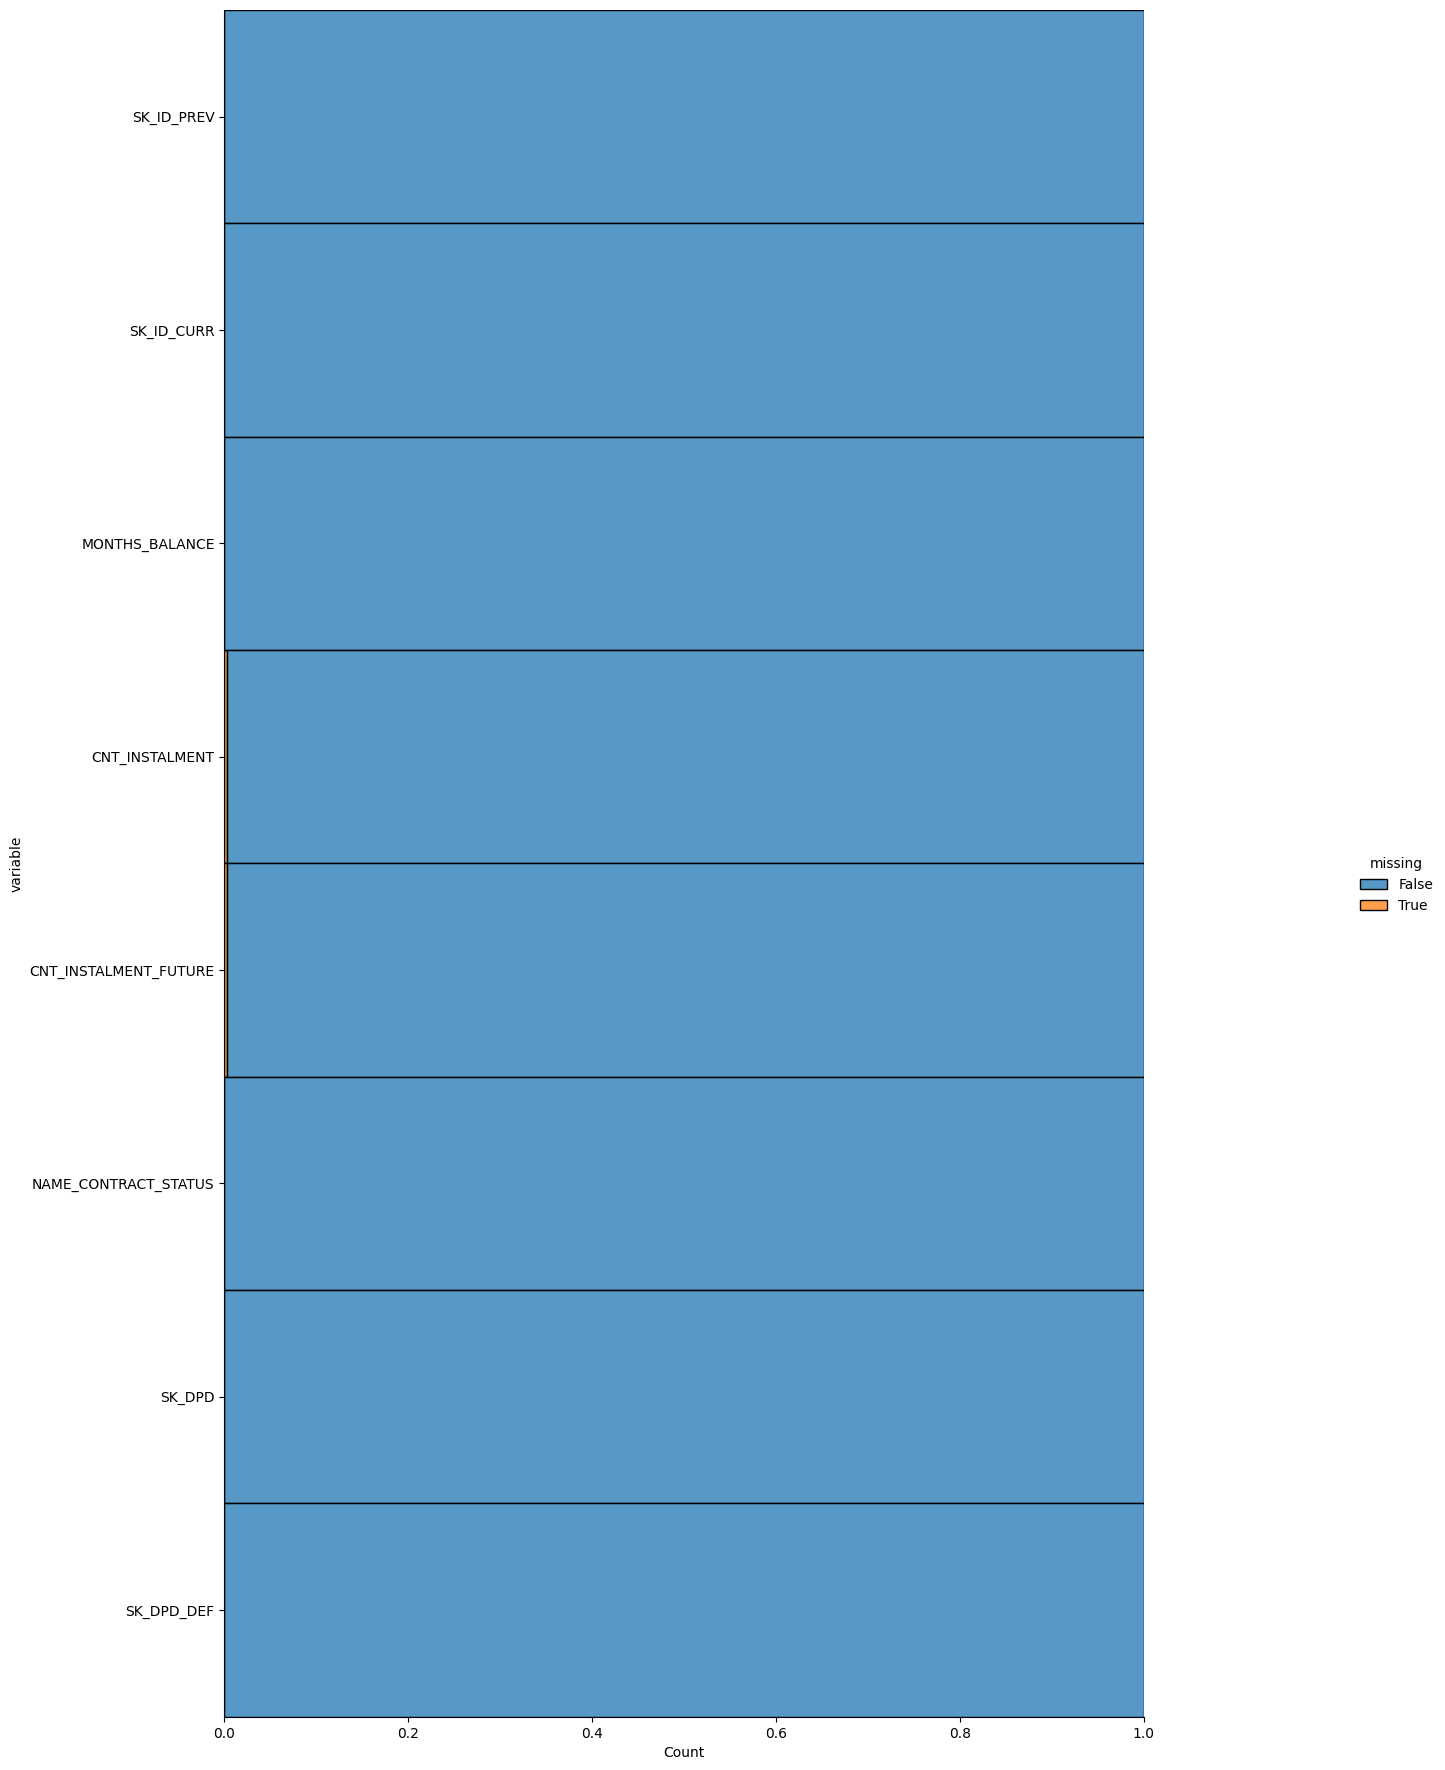

In [21]:
percent = (datasets["POS_CASH_balance"].isnull().sum()/datasets["POS_CASH_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["POS_CASH_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)
plot_missing_data("POS_CASH_balance",18,20)

## Summary of credit_card_balance


In [22]:
datasets["credit_card_balance"].info()
datasets["credit_card_balance"].columns
datasets["credit_card_balance"].dtypes
datasets["credit_card_balance"].describe()
datasets["credit_card_balance"].describe(include="all")
datasets["credit_card_balance"].corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  \
SK_ID_PREV                    1.000000    0.004723        0.003670   
SK_ID_CURR                    0.004723    1.000000        0.001696   
MONTHS_BALANCE                0.003670    0.001696        1.000000   
AMT_BALANCE                   0.005046    0.003510        0.014558   
AMT_CREDIT_LIMIT_ACTUAL       0.006631    0.005991        0.199900   
AMT_DRAWINGS_ATM_CURRENT      0.004342    0.000814        0.036802   
AMT_DRAWINGS_CURRENT          0.002624    0.000708        0.065527   
AMT_DRAWINGS_OTHER_CURRENT   -0.000160    0.000958        0.000405   
AMT_DRAWINGS_POS_CURRENT      0.001721   -0.000786        0.118146   
AMT_INST_MIN_REGULARITY       0.006460    0.003300       -0.087529   
AMT_PAYMENT_CURRENT           0.003472    0.000127        0.076355   
AMT_PAYMENT_TOTAL_CURRENT     0.001641    0.000784        0.035614   
AMT_RECEIVABLE_PRINCIPAL      0.005140    0.003589        0.016266   
AMT_RECIVABLE                 0.005035    0.003518        0.013172   
AMT_TOTAL_RECEIVABLE          0.005032    0.003524        0.013084   
CNT_DRAWINGS_ATM_CURRENT      0.002821    0.002082        0.002536   
CNT_DRAWINGS_CURRENT          0.000367    0.002654        0.113321   
CNT_DRAWINGS_OTHER_CURRENT   -0.001412   -0.000131       -0.026192   
CNT_DRAWINGS_POS_CURRENT      0.000809    0.002135        0.160207   
CNT_INSTALMENT_MATURE_CUM    -0.007219   -0.000581       -0.008620   
SK_DPD                       -0.001786   -0.000962        0.039434   
SK_DPD_DEF                    0.001973    0.001519        0.001659   

                            AMT_BALANCE  AMT_CREDIT_LIMIT_ACTUAL  \
SK_ID_PREV                     0.005046                 0.006631   
SK_ID_CURR                     0.003510                 0.005991   
MONTHS_BALANCE                 0.014558                 0.199900   
AMT_BALANCE                    1.000000                 0.489386   
AMT_CREDIT_LIMIT_ACTUAL        0.489386                 1.000000   
AMT_DRAWINGS_ATM_CURRENT       0.283551                 0.247219   
AMT_DRAWINGS_CURRENT           0.336965                 0.263093   
AMT_DRAWINGS_OTHER_CURRENT     0.065366                 0.050579   
AMT_DRAWINGS_POS_CURRENT       0.169449                 0.234976   
AMT_INST_MIN_REGULARITY        0.896728                 0.467620   
AMT_PAYMENT_CURRENT            0.143934                 0.308294   
AMT_PAYMENT_TOTAL_CURRENT      0.151349                 0.226570   
AMT_RECEIVABLE_PRINCIPAL       0.999720                 0.490445   
AMT_RECIVABLE                  0.999917                 0.488641   
AMT_TOTAL_RECEIVABLE           0.999897                 0.488598   
CNT_DRAWINGS_ATM_CURRENT       0.309968                 0.221808   
CNT_DRAWINGS_CURRENT           0.259184                 0.204237   
CNT_DRAWINGS_OTHER_CURRENT     0.046563                 0.030051   
CNT_DRAWINGS_POS_CURRENT       0.155553                 0.202868   
CNT_INSTALMENT_MATURE_CUM      0.005009                -0.157269   
SK_DPD                        -0.046988                -0.038791   
SK_DPD_DEF                     0.013009                -0.002236   

                            AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
SK_ID_PREV                                  0.004342              0.002624   
SK_ID_CURR                                  0.000814              0.000708   
MONTHS_BALANCE                              0.036802              0.065527   
AMT_BALANCE                                 0.283551              0.336965   
AMT_CREDIT_LIMIT_ACTUAL                     0.247219              0.263093   
AMT_DRAWINGS_ATM_CURRENT                    1.000000              0.800190   
AMT_DRAWINGS_CURRENT                        0.800190              1.000000   
AMT_DRAWINGS_OTHER_CURRENT                  0.017899              0.236297   
AMT_DRAWINGS_POS_CURRENT                    0.078971              0.615591   
AMT_INST_MIN_REGULARITY                     0.094824              0.1244

### Missing values for credit_card_balance


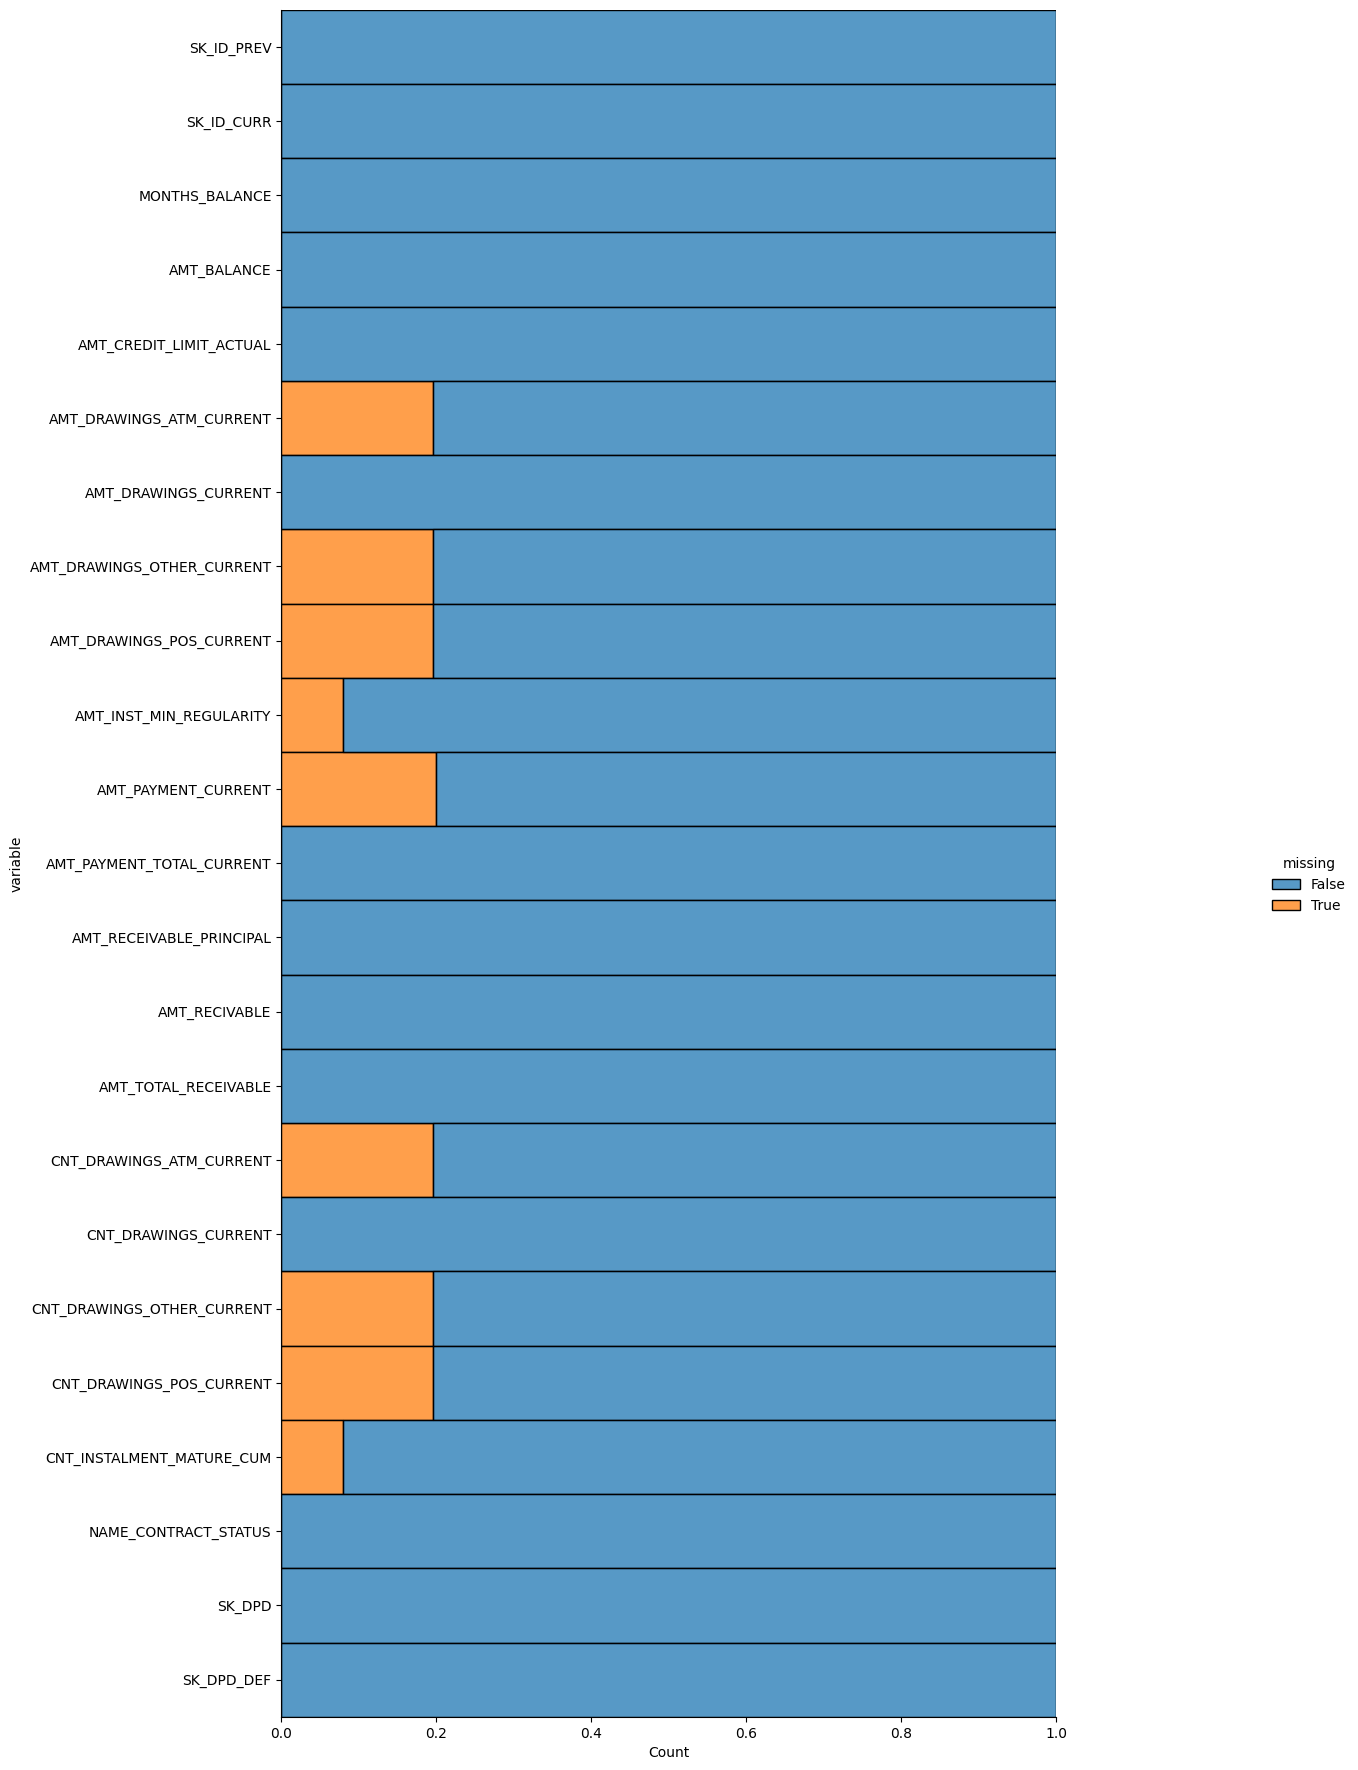

In [23]:
percent = (datasets["credit_card_balance"].isnull().sum()/datasets["credit_card_balance"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["credit_card_balance"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)
plot_missing_data('credit_card_balance',18,20)

## Summary of previous_application


In [24]:
datasets["previous_application"].info()
datasets["previous_application"].columns
datasets["previous_application"].dtypes
datasets["previous_application"].describe()
datasets["previous_application"].describe(include='all')
datasets["previous_application"].corr()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000   -0.000321     0.011459   
SK_ID_CURR                  -0.000321    1.000000     0.000577   
AMT_ANNUITY                  0.011459    0.000577     1.000000   
AMT_APPLICATION              0.003302    0.000280     0.808872   
AMT_CREDIT                   0.003659    0.000195     0.816429   
AMT_DOWN_PAYMENT            -0.001313   -0.000063     0.267694   
AMT_GOODS_PRICE              0.015293    0.000369     0.820895   
HOUR_APPR_PROCESS_START     -0.002652    0.002842    -0.036201   
NFLAG_LAST_APPL_IN_DAY      -0.002828    0.000098     0.020639   
RATE_DOWN_PAYMENT           -0.004051    0.001158    -0.103878   
RATE_INTEREST_PRIMARY        0.012969    0.033197     0.141823   
RATE_INTEREST_PRIVILEGED    -0.022312   -0.016757    -0.202335   
DAYS_DECISION                0.019100   -0.000637     0.279051   
SELLERPLACE_AREA            -0.001079    0.001265    -0.015027   
CNT_PAYMENT                  0.015589    0.000031     0.394535   
DAYS_FIRST_DRAWING          -0.001478   -0.001329     0.052839   
DAYS_FIRST_DUE              -0.000071   -0.000757    -0.053295   
DAYS_LAST_DUE_1ST_VERSION    0.001222    0.000252    -0.068877   
DAYS_LAST_DUE                0.001915   -0.000318     0.082659   
DAYS_TERMINATION             0.001781   -0.000020     0.068022   
NFLAG_INSURED_ON_APPROVAL    0.003986    0.000876     0.283080   

                           AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  \
SK_ID_PREV                        0.003302    0.003659         -0.001313   
SK_ID_CURR                        0.000280    0.000195         -0.000063   
AMT_ANNUITY                       0.808872    0.816429          0.267694   
AMT_APPLICATION                   1.000000    0.975824          0.482776   
AMT_CREDIT                        0.975824    1.000000          0.301284   
AMT_DOWN_PAYMENT                  0.482776    0.301284          1.000000   
AMT_GOODS_PRICE                   0.999884    0.993087          0.482776   
HOUR_APPR_PROCESS_START          -0.014415   -0.021039          0.016776   
NFLAG_LAST_APPL_IN_DAY            0.004310   -0.025179          0.001597   
RATE_DOWN_PAYMENT                -0.072479   -0.188128          0.473935   
RATE_INTEREST_PRIMARY             0.110001    0.125106          0.016323   
RATE_INTEREST_PRIVILEGED         -0.199733   -0.205158         -0.115343   
DAYS_DECISION                     0.133660    0.133763         -0.024536   
SELLERPLACE_AREA                 -0.007649   -0.009567          0.003533   
CNT_PAYMENT                       0.680630    0.674278          0.031659   
DAYS_FIRST_DRAWING                0.074544   -0.036813         -0.001773   
DAYS_FIRST_DUE                   -0.049532    0.002881         -0.013586   
DAYS_LAST_DUE_1ST_VERSION        -0.084905    0.044031         -0.000869   
DAYS_LAST_DUE                     0.172627    0.224829         -0.031425   
DAYS_TERMINATION                  0.148618    0.214320         -0.030702   
NFLAG_INSURED_ON_APPROVAL         0.259219    0.263932         -0.042585   

                           AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
SK_ID_PREV                        0.015293                -0.002652   
SK_ID_CURR                        0.000369                 0.002842   
AMT_ANNUITY                       0.820895                -0.036201   
AMT_APPLICATION                   0.999884                -0.014415   
AMT_CREDIT                        0.993087                -0.021039   
AMT_DOWN_PAYMENT                  0.482776                 0.016776   
AMT_GOODS_PRICE                   1.000000                -0.045267   
HOUR_APPR_PROCESS_START          -0.045267                 1.000000   
NFLAG_LAST_APPL_IN_DAY           -0.017100                 0.005789   
RATE_DOWN_PAYMENT                -0.072479                 0.025930   
RATE_INTEREST_PRIMARY             0.110001                -0.027172   
RATE_INTEREST_PRIVILEGED         -0.199733       

### Missing values for previous_application


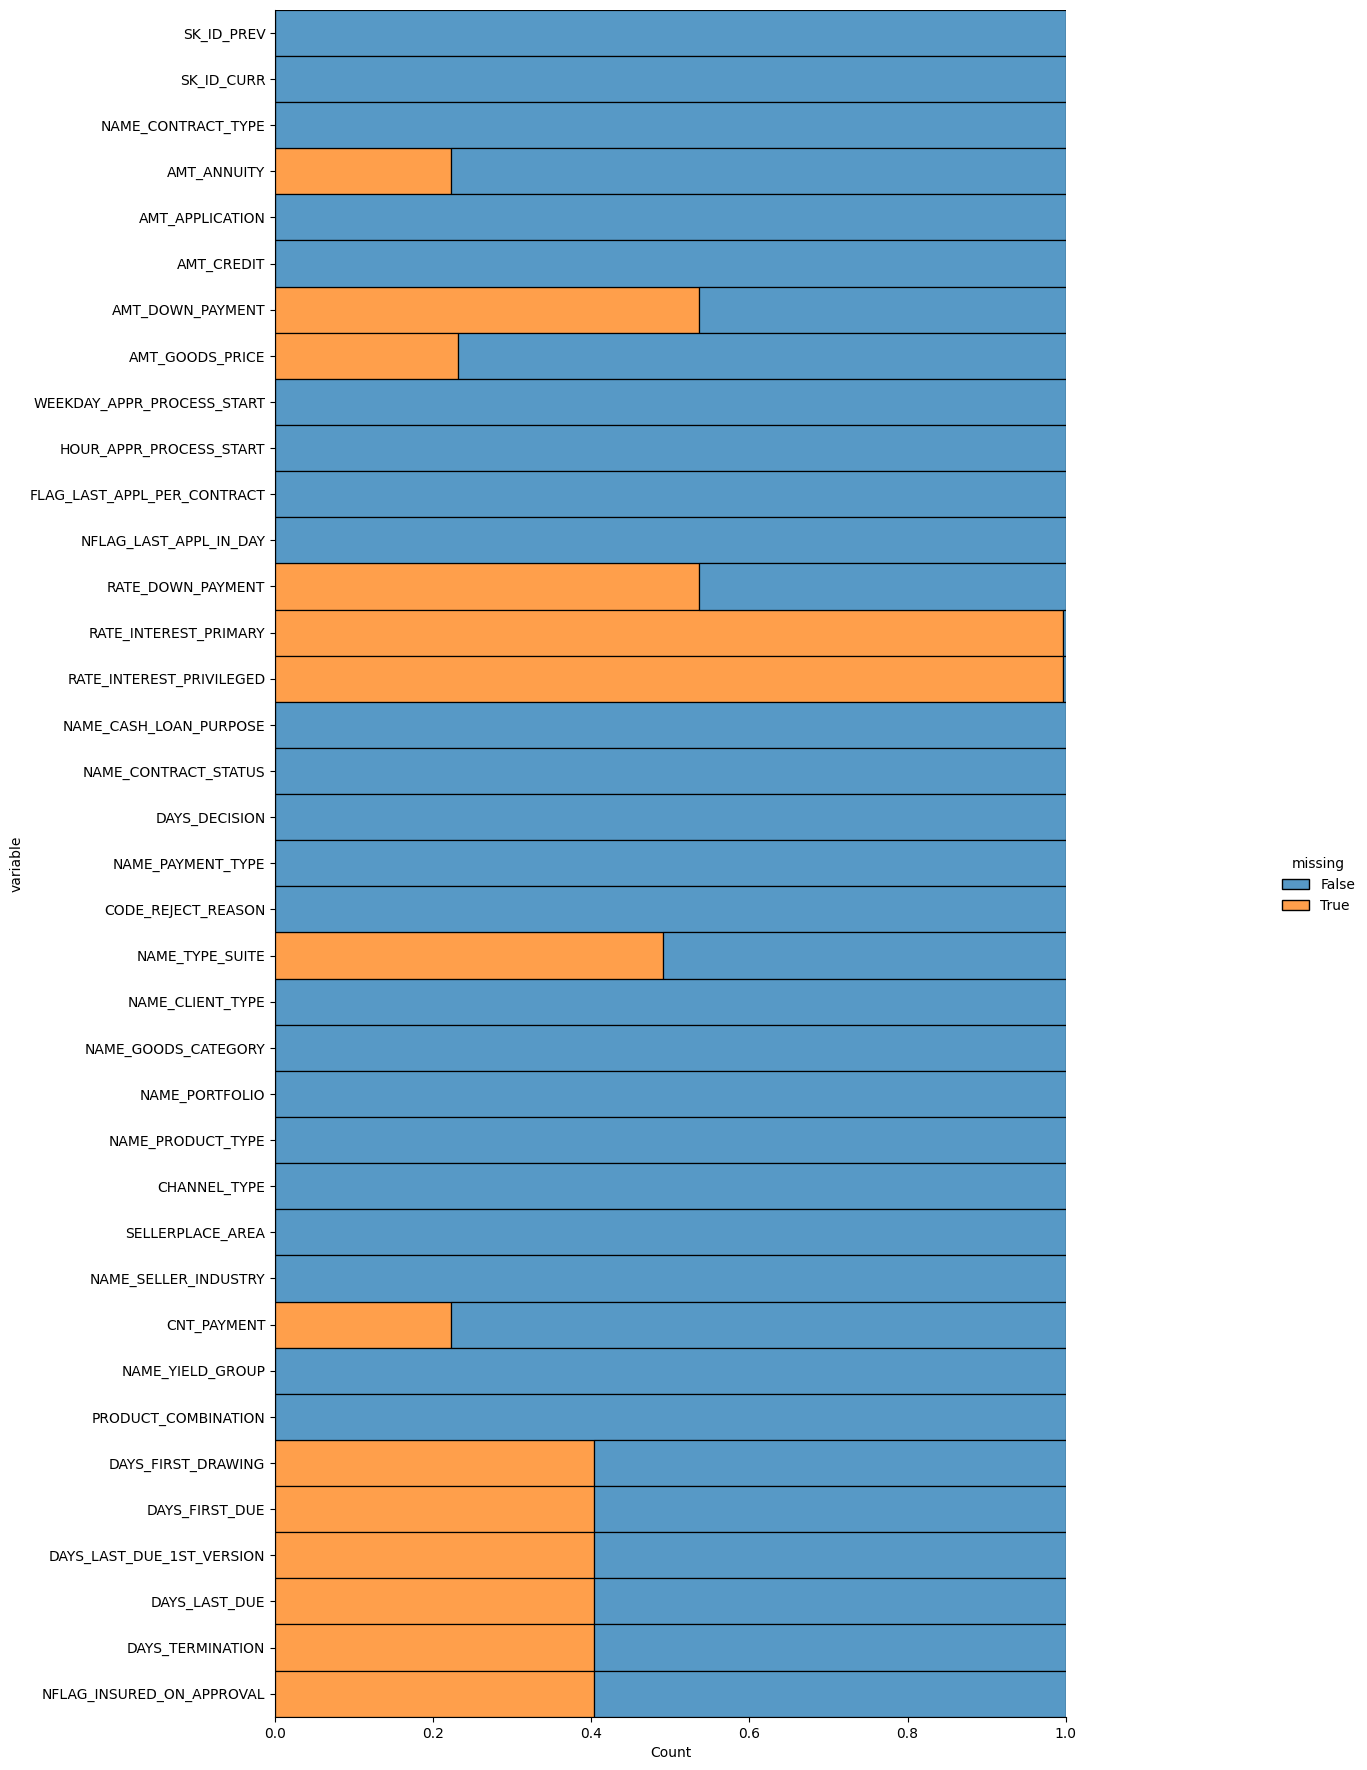

In [25]:
percent = (datasets["previous_application"].isnull().sum()/datasets["previous_application"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["previous_application"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)
plot_missing_data("previous_application",18,20)


## Summary of installments_payments


In [26]:
datasets["installments_payments"].info()
datasets["installments_payments"].columns
datasets["installments_payments"].dtypes
datasets["installments_payments"].describe()
datasets["installments_payments"].describe(include='all')
datasets["installments_payments"].corr()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  \
SK_ID_PREV                1.000000    0.002132                0.000685   
SK_ID_CURR                0.002132    1.000000                0.000480   
NUM_INSTALMENT_VERSION    0.000685    0.000480                1.000000   
NUM_INSTALMENT_NUMBER    -0.002095   -0.000548               -0.323414   
DAYS_INSTALMENT           0.003748    0.001191                0.130244   
DAYS_ENTRY_PAYMENT        0.003734    0.001215                0.128124   
AMT_INSTALMENT            0.002042   -0.000226                0.168109   
AMT_PAYMENT               0.001887   -0.000124                0.177176   

                        NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  \
SK_ID_PREV                          -0.002095         0.003748   
SK_ID_CURR                          -0.000548         0.001191   
NUM_INSTALMENT_VERSION              -0.323414         0.130244   
NUM_INSTALMENT_NUMBER                1.000000         0.090286   
DAYS_INSTALMENT                      0.090286         1.000000   
DAYS_ENTRY_PAYMENT                   0.094305         0.999491   
AMT_INSTALMENT                      -0.089640         0.125985   
AMT_PAYMENT                         -0.087664         0.127018   

                        DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
SK_ID_PREV                        0.003734        0.002042     0.001887  
SK_ID_CURR                        0.001215       -0.000226    -0.000124  
NUM_INSTALMENT_VERSION            0.128124        0.168109     0.177176  
NUM_INSTALMENT_NUMBER             0.094305       -0.089640    -0.087664  
DAYS_INSTALMENT                   0.999491        0.125985     0.127018  
DAYS_ENTRY_PAYMENT                1.000000        0.125555     0.126602  
AMT_INSTALMENT                    0.125555        1.000000     0.937191  
AMT_PAYMENT                       0.126602        0.937191     1.000000

### Missing values for installments_payments


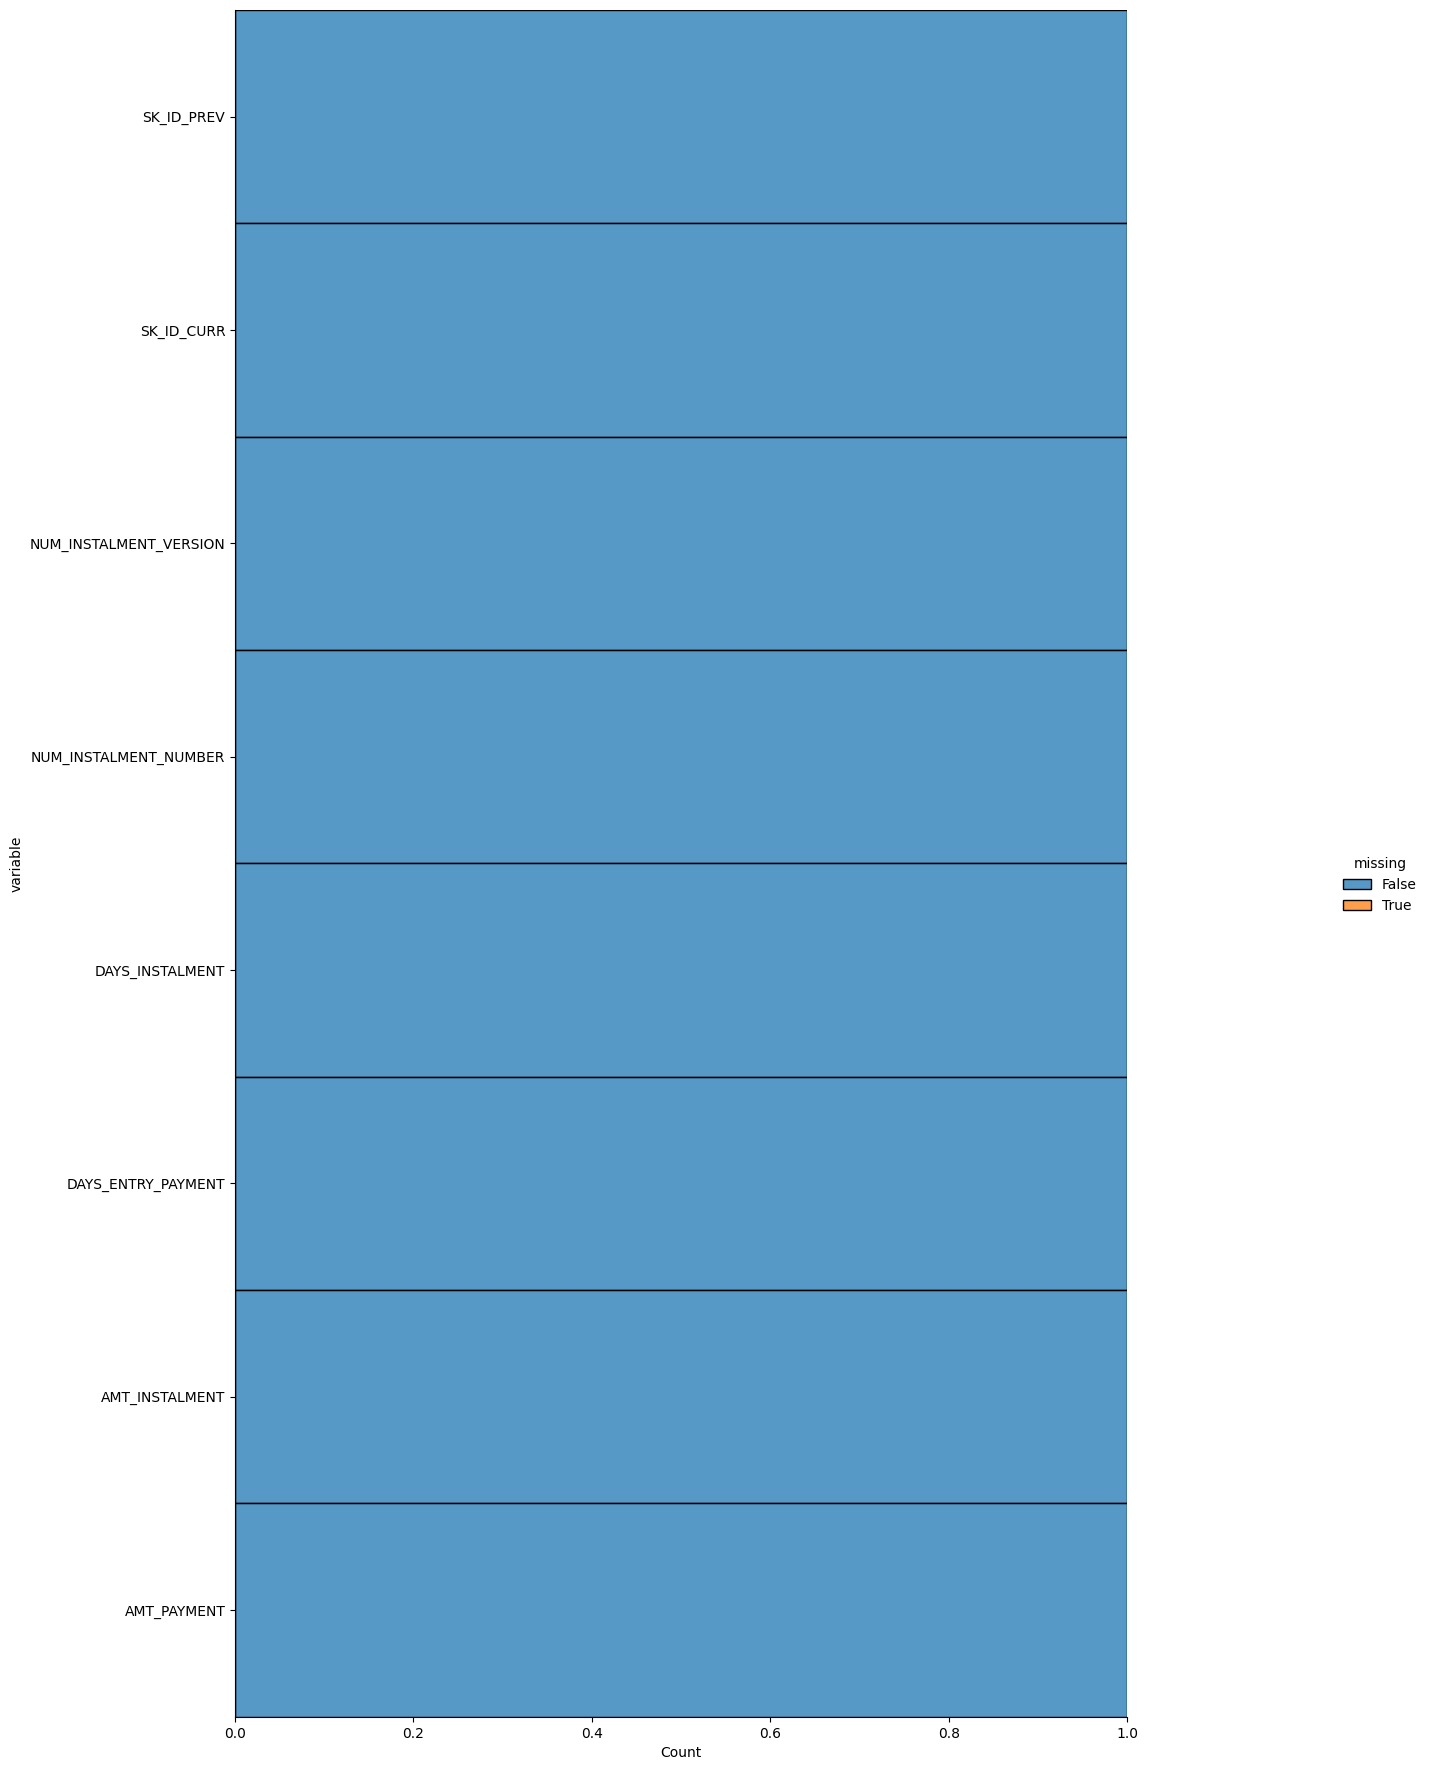

In [27]:
percent = (datasets["installments_payments"].isnull().sum()/datasets["installments_payments"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["installments_payments"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_train_data.head(20)
plot_missing_data("installments_payments",18,20)


# Visual Exploratory Data Analysis
## Distribution of the target column


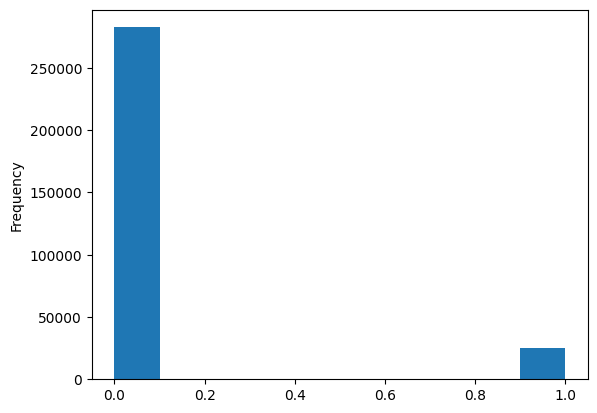

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

datasets["application_train"]['TARGET'].astype(int).plot.hist();


## Distribution of Income Total


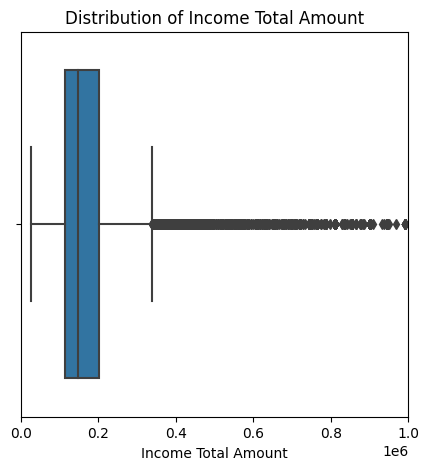

In [29]:
plt.figure(figsize = (5, 5))
sns.boxplot(data = datasets["application_train"], x = 'AMT_INCOME_TOTAL')
plt.xlim(0,1000000)
plt.xlabel('Income Total Amount');
plt.title('Distribution of Income Total Amount');
plt.show()

### Target vs borrowers based on income types


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'State servant'),
  Text(1, 0, 'Working'),
  Text(2, 0, 'Commercial associate'),
  Text(3, 0, 'Pensioner'),
  Text(4, 0, 'Unemployed'),
  Text(5, 0, 'Student'),
  Text(6, 0, 'Businessman'),
  Text(7, 0, 'Maternity leave')])

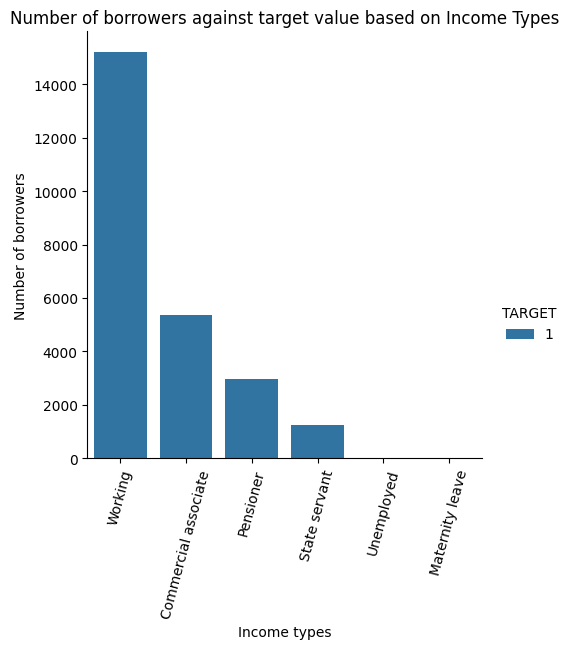

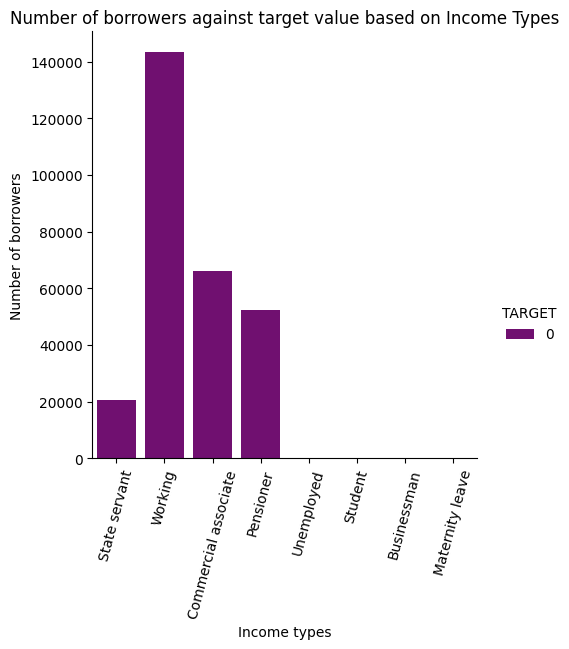

In [30]:
sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==1],x='NAME_INCOME_TYPE',kind='count',hue="TARGET")
plt.xlabel('Income types')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Income Types')
plt.xticks(rotation=75)

sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==0],x='NAME_INCOME_TYPE',kind='count',hue="TARGET", palette = ['purple'])
plt.xlabel('Income types')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Income Types')
plt.xticks(rotation=75)


## Distribution of the Amount Credit


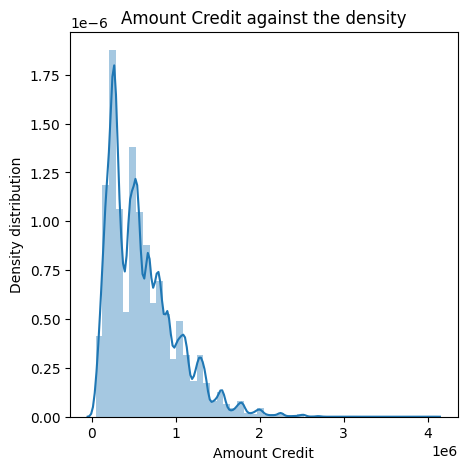

In [31]:
plt.figure(figsize = (5, 5))
sns.distplot(datasets["application_train"].AMT_CREDIT)
plt.xlabel('Amount Credit');
plt.ylabel('Density distribution');
plt.title('Amount Credit against the density');

plt.show()

### Target vs borrowers based on income and credit ratio


In [32]:
Income_credit = datasets["application_train"][['AMT_INCOME_TOTAL','AMT_CREDIT','TARGET']]
Income_credit['Ratio'] = (Income_credit['AMT_INCOME_TOTAL']/Income_credit['AMT_CREDIT'])
Income_credit


AMT_INCOME_TOTAL  AMT_CREDIT  TARGET     Ratio
0               202500.0    406597.5       1  0.498036
1               270000.0   1293502.5       0  0.208736
2                67500.0    135000.0       0  0.500000
3               135000.0    312682.5       0  0.431748
4               121500.0    513000.0       0  0.236842
...                  ...         ...     ...       ...
307506          157500.0    254700.0       0  0.618375
307507           72000.0    269550.0       0  0.267112
307508          153000.0    677664.0       0  0.225776
307509          171000.0    370107.0       1  0.462029
307510          157500.0    675000.0       0  0.233333

[307511 rows x 4 columns]

In [33]:
import numpy as np
def count_bins(df):
    count_dict={}
    for i in range(len(df)):

        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.1 and df["Ratio"].iloc[i]>=0):
            if(0 in count_dict):
                count_dict[0]+=1
            else:
                count_dict[0]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.2 and df["Ratio"].iloc[i]>=0.1):
            if(0 in count_dict):
                count_dict[1]+=1
            else:
                count_dict[1]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.3 and df["Ratio"].iloc[i]>=0.2):
            if(0 in count_dict):
                count_dict[2]+=1
            else:
                count_dict[2]=1

        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.4 and df["Ratio"].iloc[i]>=0.3):
            if(0 in count_dict):
                count_dict[3]+=1
            else:
                count_dict[3]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.5 and df["Ratio"].iloc[i]>=0.4):
            if(0 in count_dict):
                count_dict[4]+=1
            else:
                count_dict[4]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.6 and df["Ratio"].iloc[i]>=0.5):
            if(0 in count_dict):
                count_dict[5]+=1
            else:
                count_dict[5]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.7 and df["Ratio"].iloc[i]>=0.6):
            if(0 in count_dict):
                count_dict[6]+=1
            else:
                count_dict[6]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.8 and df["Ratio"].iloc[i]>=0.7):
            if(0 in count_dict):
                count_dict[7]+=1
            else:
                count_dict[7]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<0.9 and df["Ratio"].iloc[i]>=0.8):
            if(0 in count_dict):
                count_dict[8]+=1
            else:
                count_dict[8]=1
        if df["TARGET"].iloc[i] == 0 and (df["Ratio"].iloc[i]<=1.0 and df["Ratio"].iloc[i]>=0.9):
            if(0 in count_dict):
                count_dict[9]+=1
            else:
                count_dict[9]=1
    return count_dict
ff = count_bins(Income_credit)
ff


{2: 61411,
 5: 21745,
 4: 29151,
 1: 65667,
 3: 46588,
 8: 6843,
 7: 9488,
 9: 5401,
 6: 13881,
 0: 9171}

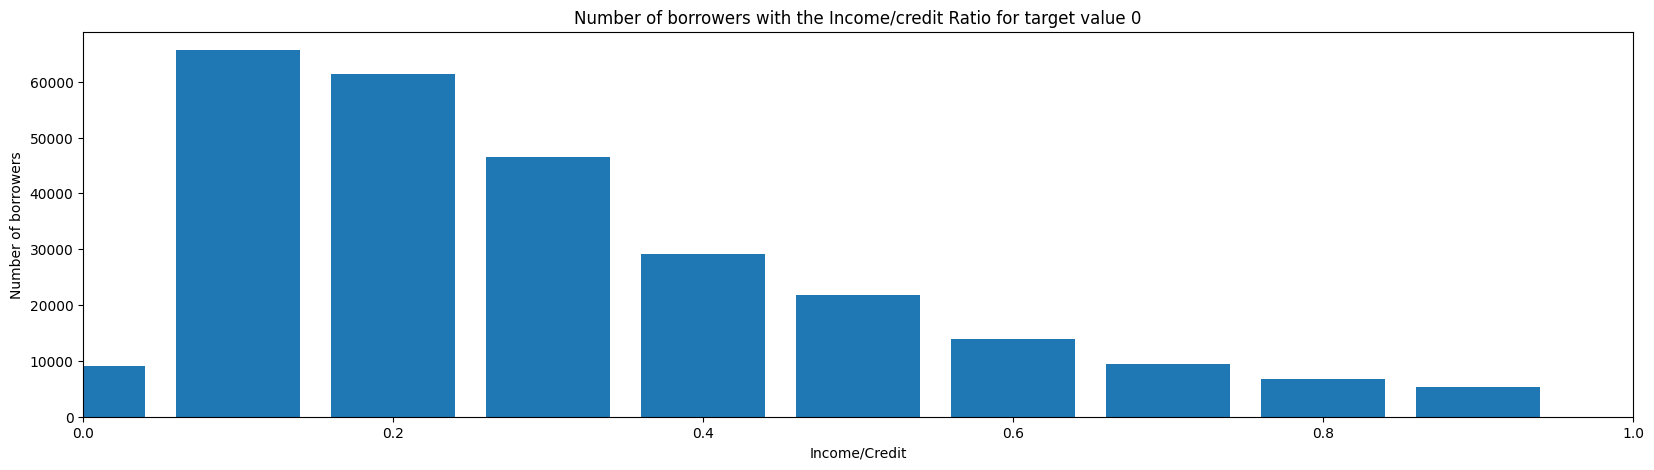

In [34]:
ratios = list(ff.keys())
count = list(ff.values())
AMT_INCOME_TOTAL_AMT_CREDIT = []
for i in ratios:
    AMT_INCOME_TOTAL_AMT_CREDIT.append(i / 10)
fig = plt.figure(figsize = (20, 5))

plt.bar(AMT_INCOME_TOTAL_AMT_CREDIT, count, width=0.08)
plt.xlim(0,1,0.1)
plt.xlabel("Income/Credit")
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers with the Income/credit Ratio for target value 0');
plt.show()


## Distribution of Gender


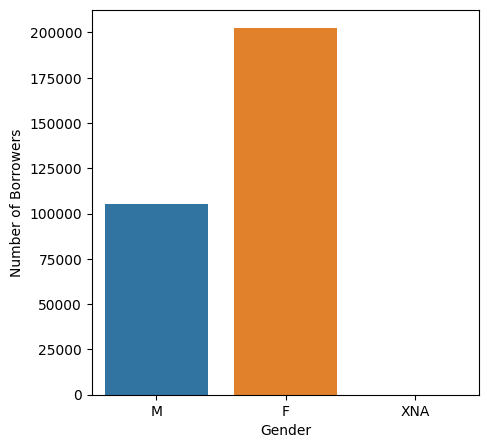

In [35]:
plt.figure(figsize=(5, 5))
sns.countplot(data=datasets["application_train"], x="CODE_GENDER")
plt.xlabel('Gender')
plt.ylabel('Number of Borrowers')
plt.show()

### Target vs borrowers based on gender


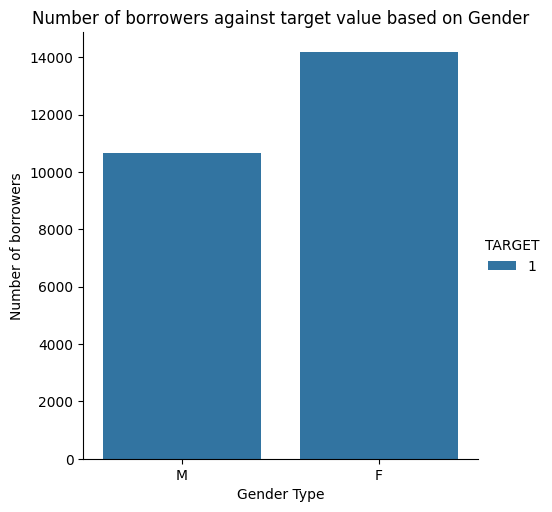

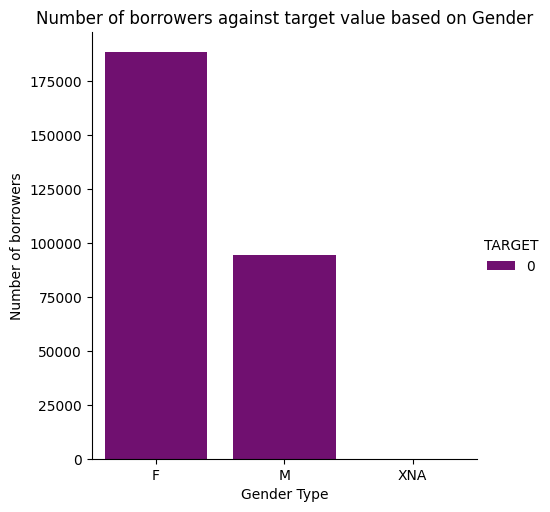

In [36]:
sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==1],x='CODE_GENDER',kind='count',hue="TARGET");
plt.xlabel('Gender Type')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Gender')

sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==0],x='CODE_GENDER',kind='count',hue="TARGET",palette = ['purple']);
plt.xlabel('Gender Type')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Gender')
plt.show()

## Distribution  of Applicants Age


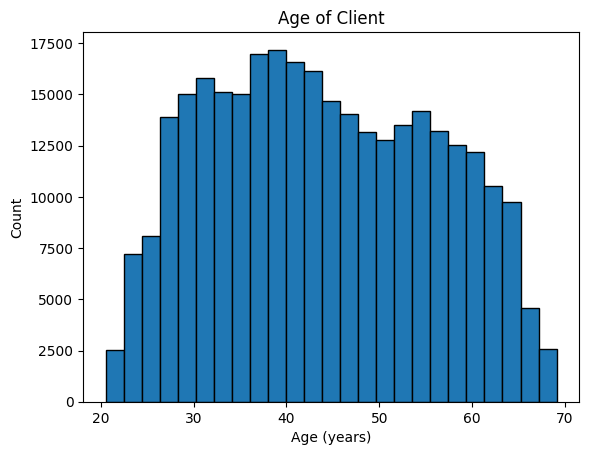

In [37]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');


### Target vs borrowers age group based on their failure rate to repay


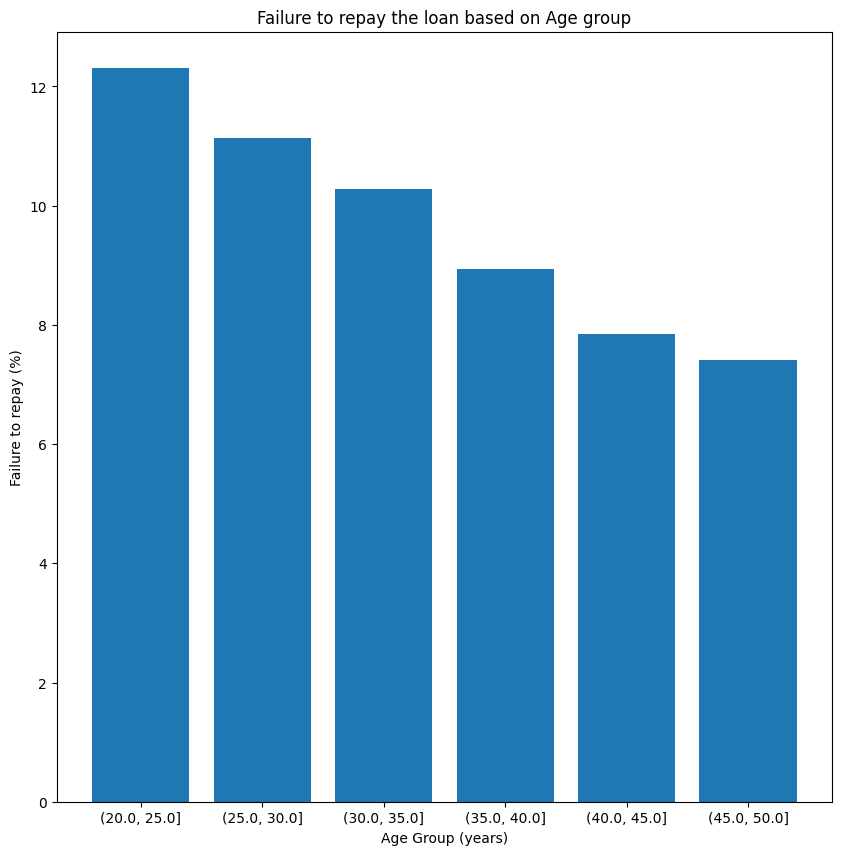

In [38]:
years=datasets["application_train"][['TARGET','DAYS_BIRTH']]
years['YEARS_BIRTH']=years['DAYS_BIRTH']/-365
years['group']=pd.cut(years['YEARS_BIRTH'],bins=np.linspace(0,50,num=11))
age_groups = years.groupby('group').mean()
age_groups

plt.figure(figsize=(10,10))
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to repay (%)')
plt.title('Failure to repay the loan based on Age group')
plt.show()

## Distribution of Marital status of Applicant


Text(0.5, 1.0, 'Family Status vs Count')

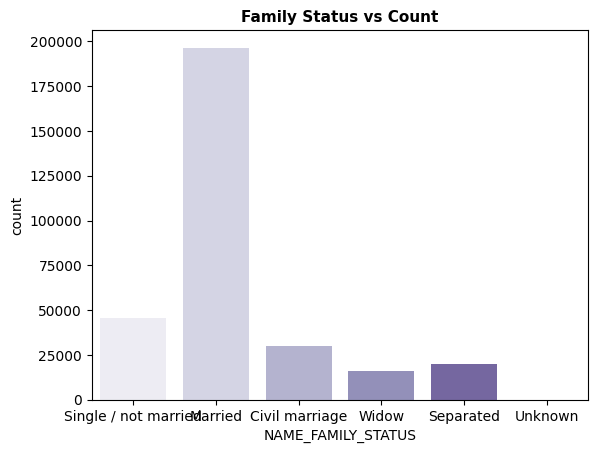

In [39]:
sns.countplot(data=datasets["application_train"], x='NAME_FAMILY_STATUS', palette='Purples')
plt.title("Family Status vs Count", fontweight = 'bold', fontsize = 11)

### Target vs borrowers based on Marital Status


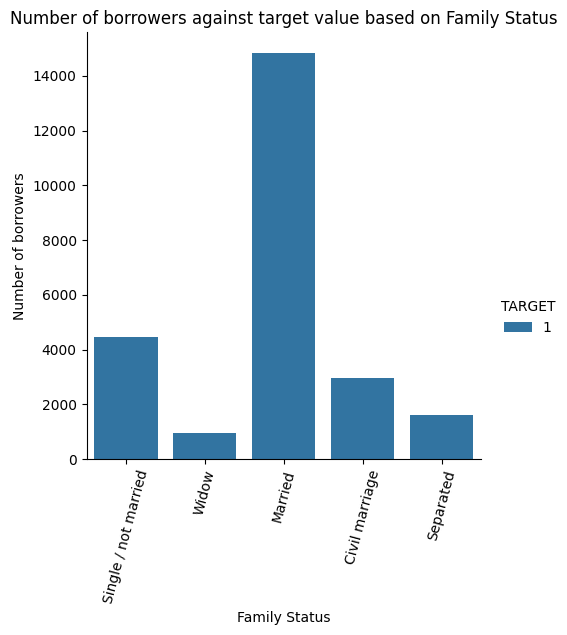

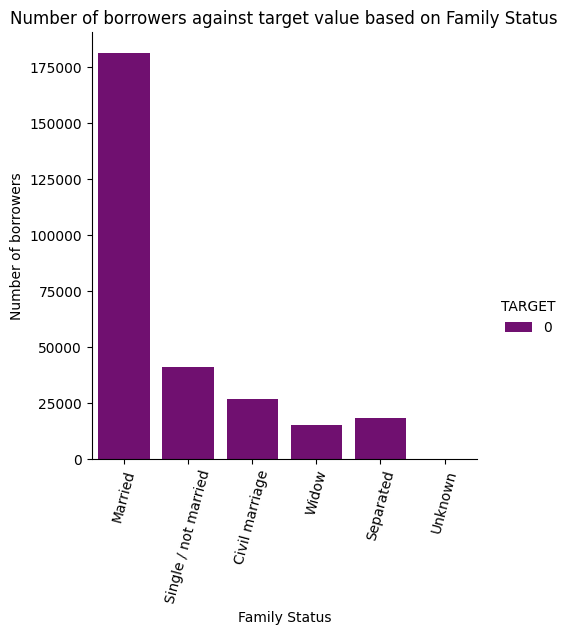

In [40]:
sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==1],x='NAME_FAMILY_STATUS',kind='count',hue="TARGET")
plt.xlabel('Family Status')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Family Status')
plt.xticks(rotation=75)

sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==0],x='NAME_FAMILY_STATUS',kind='count',hue="TARGET", palette = ['purple'])
plt.xlabel('Family Status')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on Family Status')
plt.xticks(rotation=75)
plt.show()

### Target vs borrowers based Children count of applicant


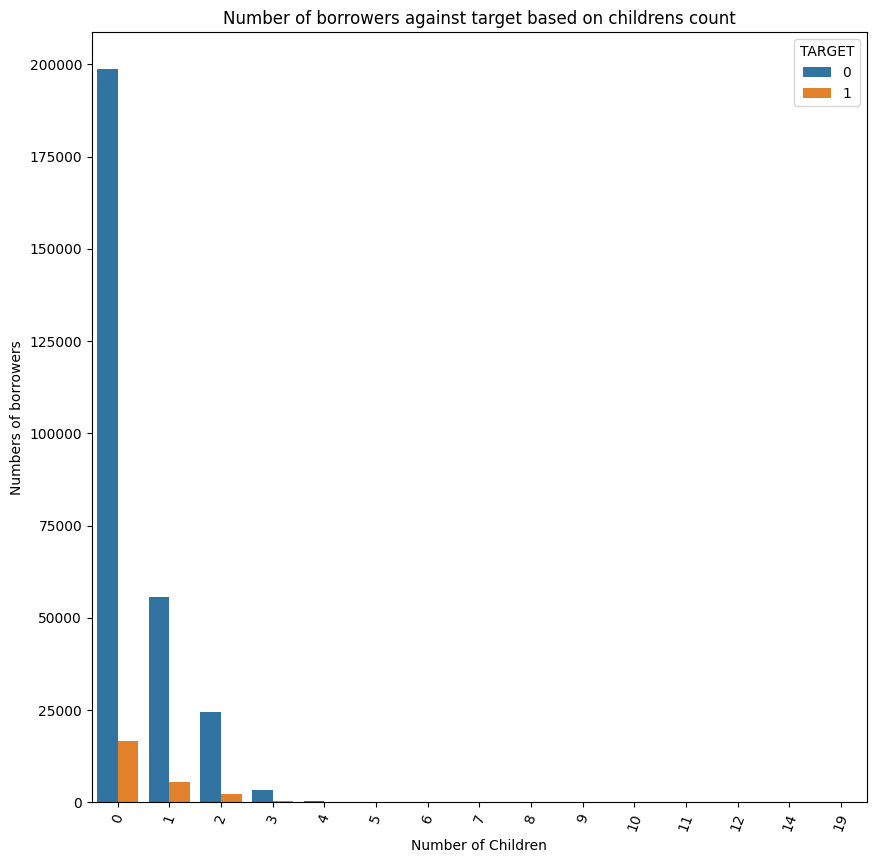

In [41]:
fig,ax = plt.subplots(figsize=(10,10))
sns.countplot(x='CNT_CHILDREN', hue = 'TARGET',data=datasets["application_train"])
plt.xlabel("Number of Children")
plt.ylabel('Numbers of borrowers')
plt.title('Number of borrowers against target based on childrens count');
plt.xticks(rotation=70)
plt.show()

## Distribution of Applicants occupations


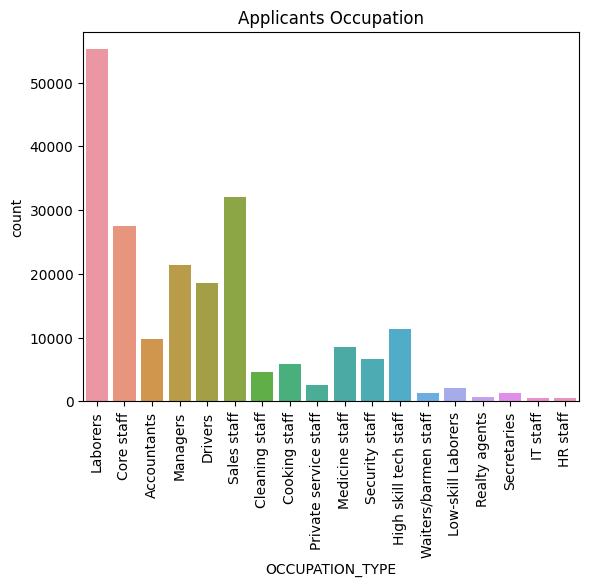

In [42]:
sns.countplot(x='OCCUPATION_TYPE', data=datasets["application_train"]);
plt.title('Applicants Occupation');
plt.xticks(rotation=90);

### Target vs borrowers based on Occupation type


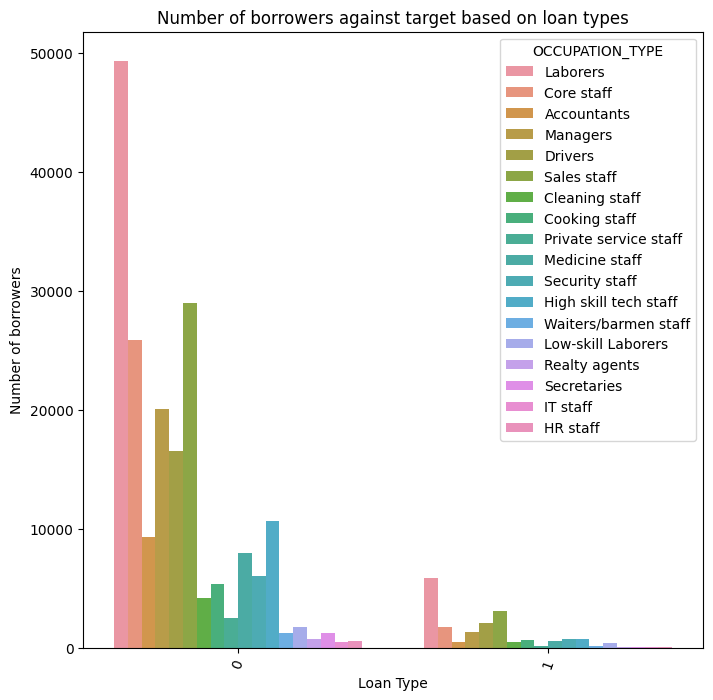

In [43]:
fig,ax = plt.subplots(figsize=(8,8))
sns.countplot(x='TARGET', hue = 'OCCUPATION_TYPE',data=datasets["application_train"])
plt.xlabel("Loan Type")
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target based on loan types')
plt.xticks(rotation=70)
plt.show()

## Distribution of applicants who owns a car(percentage)


Text(0.5, 1.0, 'Percentage of car owners in the dataset')

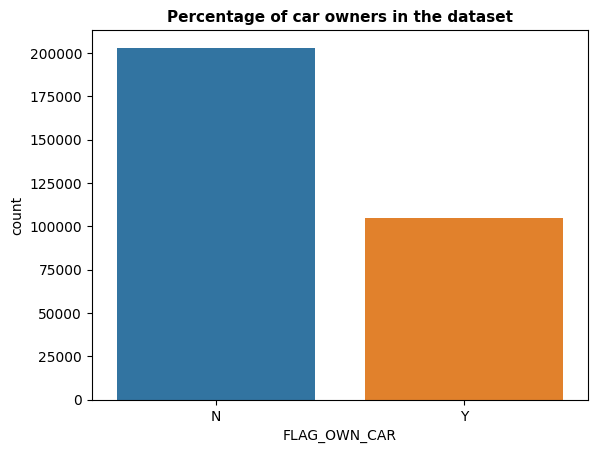

In [44]:
sns.countplot(datasets["application_train"], x = 'FLAG_OWN_CAR')
plt.title("Percentage of car owners in the dataset", fontweight = 'bold', fontsize = 11)

### Target vs borrowers based on applicants owns a car


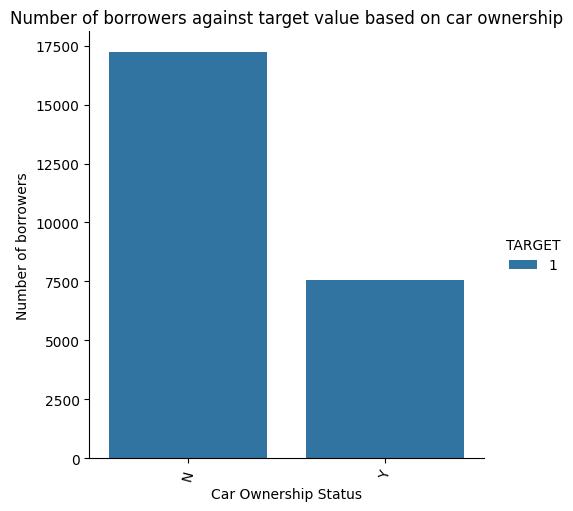

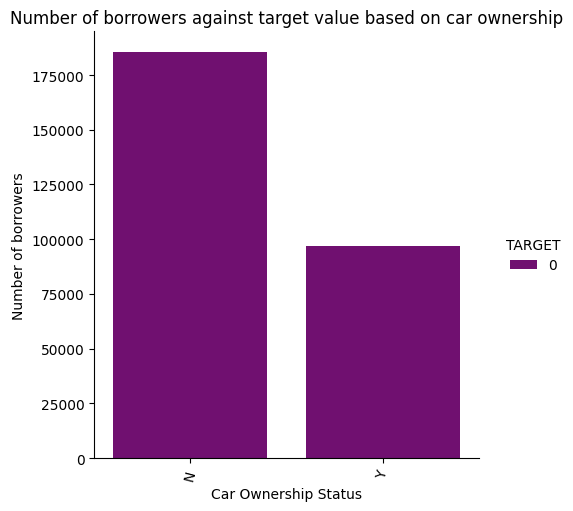

In [45]:
sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==1],x='FLAG_OWN_CAR',kind='count',hue="TARGET")
plt.xlabel('Car Ownership Status')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on car ownership')
plt.xticks(rotation=75)

sns.catplot(data=datasets["application_train"][datasets["application_train"].TARGET==0],x='FLAG_OWN_CAR',kind='count',hue="TARGET", palette = ['purple'])
plt.xlabel('Car Ownership Status')
plt.ylabel('Number of borrowers')
plt.title('Number of borrowers against target value based on car ownership')
plt.xticks(rotation=75)
plt.show()

## Correlation with  the target column


Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


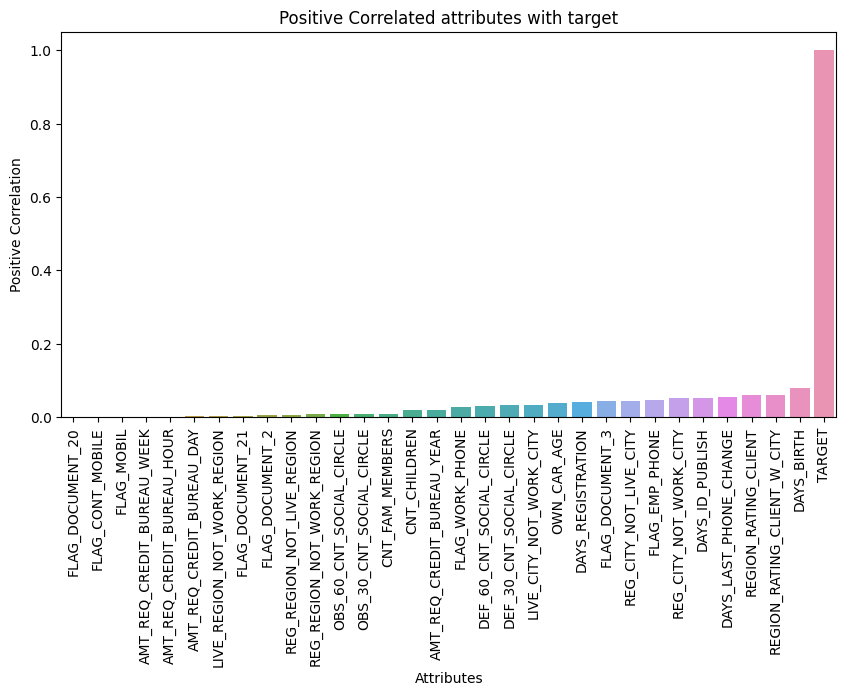

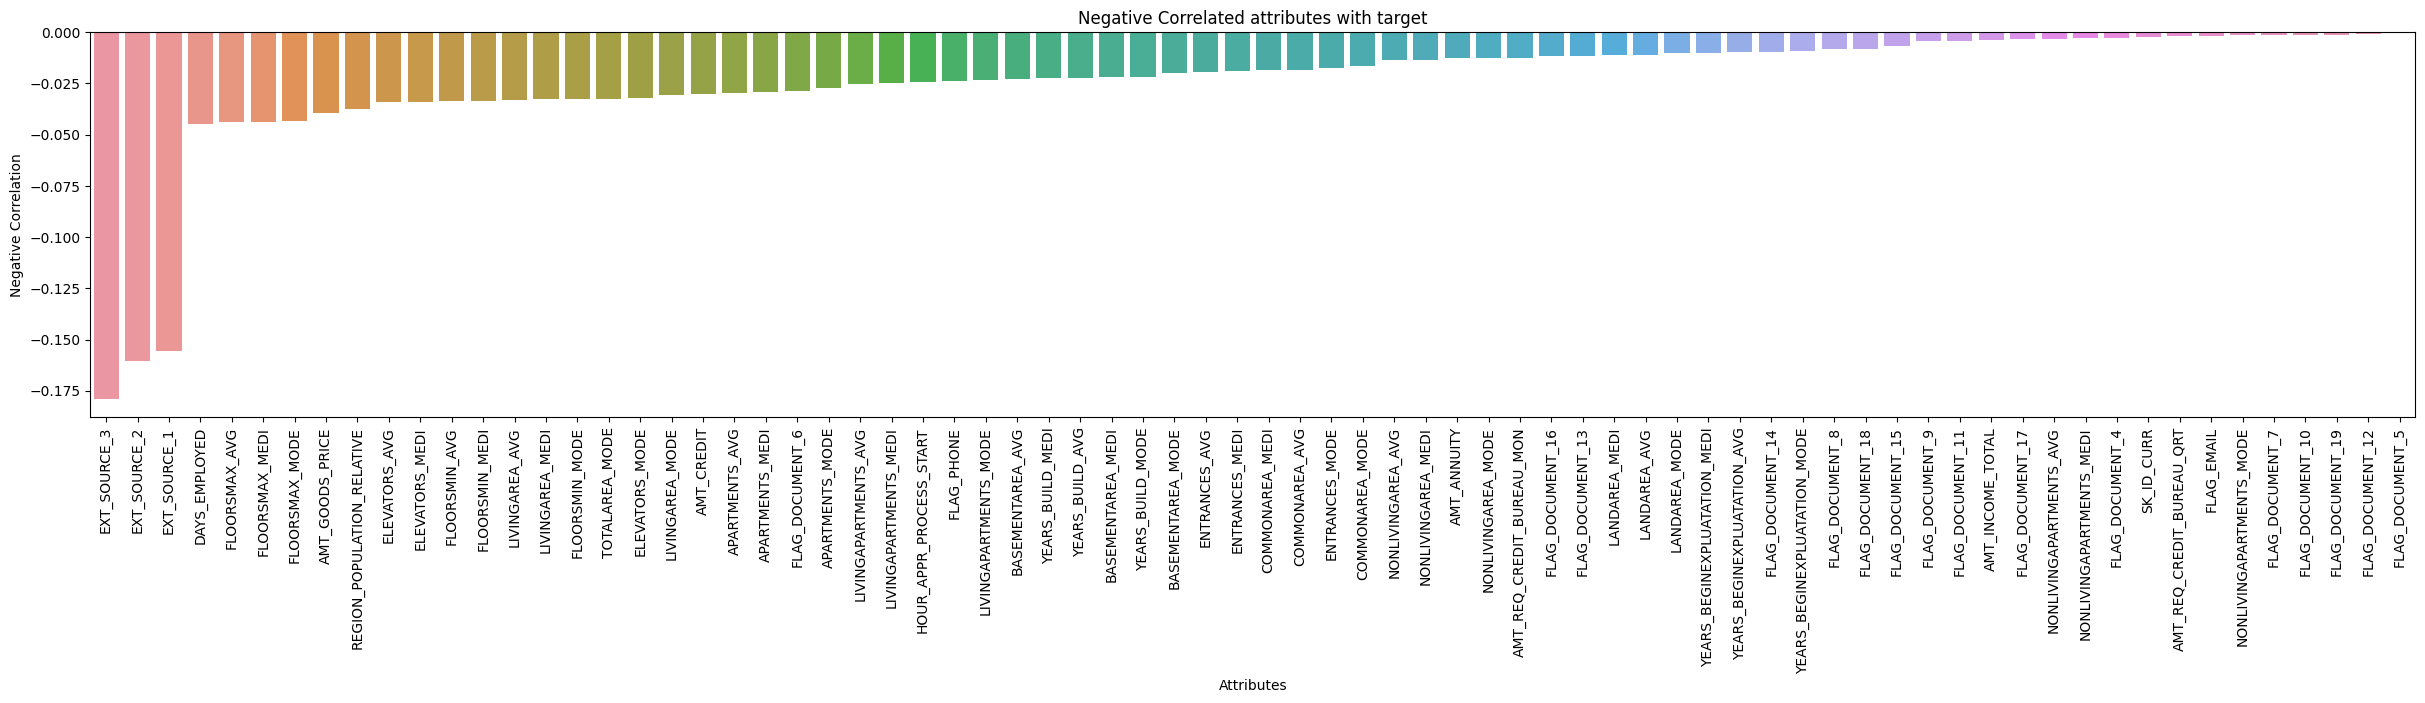

In [46]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))
corr_app_train = correlations.reset_index().rename(columns={'index':'Attributes','TARGET':'Correlation'})
corr_app_train
plt.figure(figsize = (10, 5))
sns.barplot(x='Attributes',y='Correlation',data= corr_app_train[corr_app_train.Correlation>0])
plt.xlabel('Attributes')
plt.ylabel('Positive Correlation')
plt.title('Positive Correlated attributes with target')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize = (30, 5))
sns.barplot(x='Attributes',y='Correlation',data= corr_app_train[corr_app_train.Correlation<=0])
plt.xlabel('Attributes')
plt.ylabel('Negative Correlation')
plt.title('Negative Correlated attributes with target')
plt.xticks(rotation=90)
plt.show()


In [47]:
from pandas.plotting import scatter_matrix
#We can take the top 10 features
top_corr_features = ["TARGET", "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE",
               "DAYS_BIRTH", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_ID_PUBLISH","REG_CITY_NOT_WORK_CITY"]
# scatter_matrix(datasets["application_train"][top_corr_features], figsize=(12, 8));
df = datasets["application_train"].copy()
df2 = df[top_corr_features]
corr = df2.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

Text(0.5, 1.0, 'Correlation Heatmap for features with highest correlations with target variables')

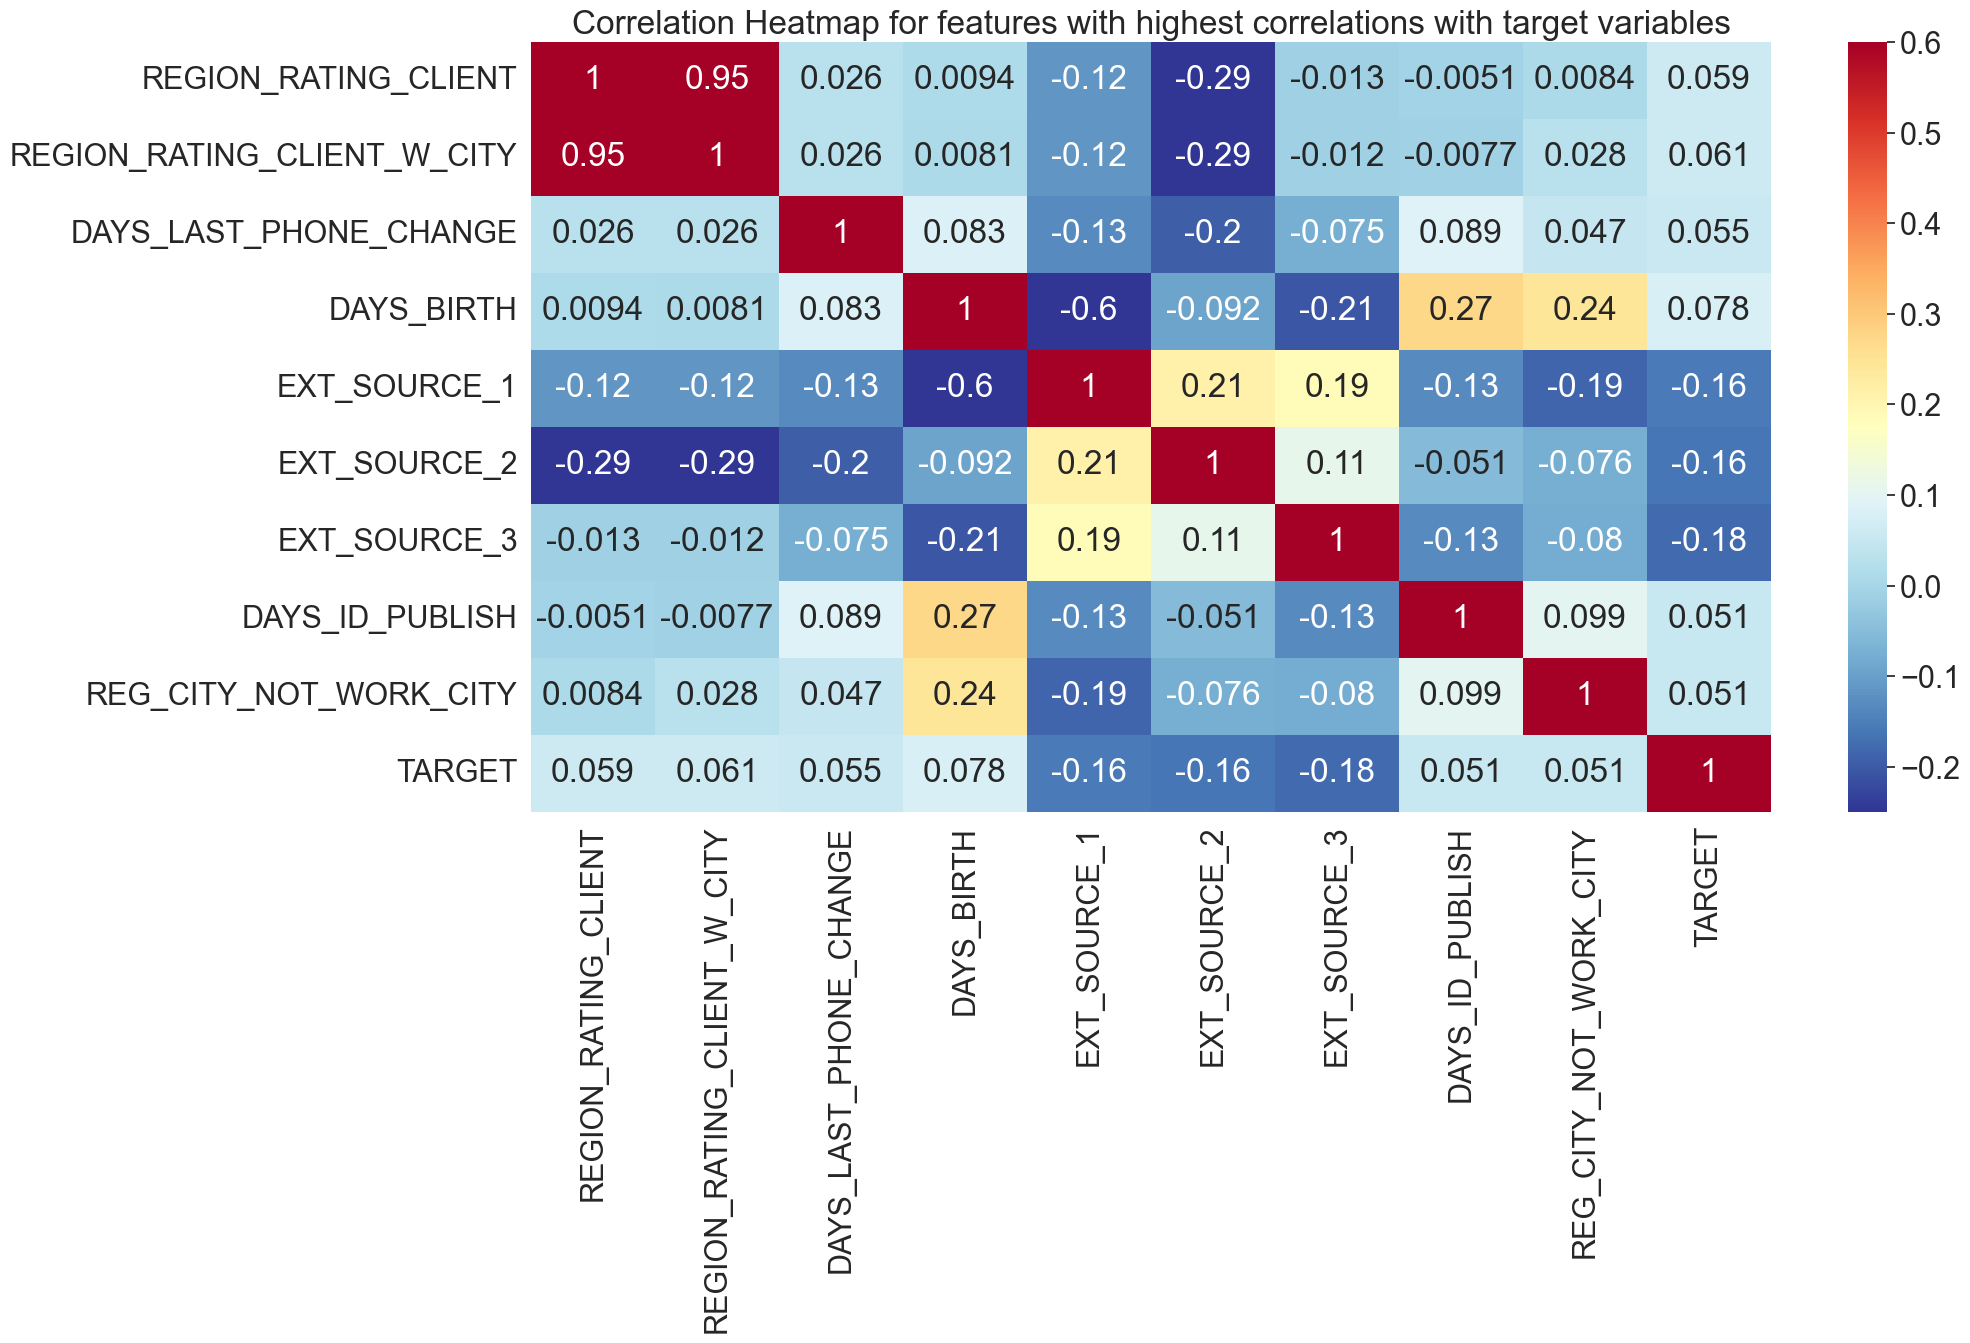

In [48]:
most_corr=datasets["application_train"][["REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","DAYS_LAST_PHONE_CHANGE",
               "DAYS_BIRTH", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_ID_PUBLISH","REG_CITY_NOT_WORK_CITY",'TARGET']]
most_corr_corr = most_corr.corr()

sns.set_style("dark")
sns.set_context("notebook", font_scale=2.0, rc={"lines.linewidth": 1.0})
fig, axes = plt.subplots(figsize = (20,10),sharey=True)
sns.heatmap(most_corr_corr,cmap=plt.cm.RdYlBu_r,vmin=-0.25,vmax=0.6,annot=True)
plt.title('Correlation Heatmap for features with highest correlations with target variables')


# Phase 4: Multi Layer Perceptron Models (Ran on Google Colab and on a mac)

In [49]:
# Import necessary libraries for data preprocessing
import os 
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix

# Import necessary libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for logistic regression
from sklearn.linear_model import LogisticRegression

# Import necessary libraries for model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries for building and training neural network
import time
from datetime import datetime
import json
import pickle
import copy

import torch
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as func
from torch.nn.functional import binary_cross_entropy
import torch.optim as optim
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler



In [50]:
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(339.9657, shape=(), dtype=float32)


In [51]:
# Import necessary libraries
import time
from datetime import datetime
import json
import pickle
import copy
import warnings

import numpy as np
import pandas as pd 
import torch
import tensorflow as tf
import torch.nn as nn
import torch.nn.functional as func
from torch.nn.functional import binary_cross_entropy
import torch.optim as optim
from torch.optim import Adam
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, log_loss, classification_report, roc_auc_score, make_scorer

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.callbacks import LearningRateScheduler

# Ignore warnings
warnings.filterwarnings('ignore')

# our import script contains code for data preprocessing and a neural network model. 



In [52]:
DATA_DIR

'../Data/home-credit-default-risk'

In [53]:
datasets['application_train'].shape

(307511, 122)

# FEATURE ENGINEERING  (Carryover from phase 3 )

### Continuing from phase 3
#### We are selecting same feature engineering techniques which are used in Phase 3

# Undersampling - Due to class imbalance

In [54]:
# Access the 'application_train' dataset from the 'datasets' container
application_train = datasets['application_train']

# Select the minority class instances (TARGET = 1) from the training dataset
minority_application_train = application_train[application_train['TARGET']==1]

# Append a randomly sampled subset of majority class instances (TARGET = 0) to the minority class instances
undersampled_application_train = minority_application_train.append(
    application_train[application_train['TARGET']==0].reset_index(drop=True).sample(n = 75000)
)


In [55]:
# Assign the undersampled training dataset to a new key in the 'datasets' dictionary
datasets["undersampled_application_train"] = undersampled_application_train 

# Count the number of instances in each class
class_distribution = undersampled_application_train['TARGET'].value_counts()

# Print the class distribution
print("Class distribution in the undersampled training dataset:")
print(class_distribution)

Class distribution in the undersampled training dataset:
0    75000
1    24825
Name: TARGET, dtype: int64


In [56]:
  # Assuming this is a dictionary where you store your datasets

# Filtering rows with TARGET == 1 and creating a new DataFrame
datasets["undersampled_application_train_2"] = datasets["application_train"][datasets["application_train"].TARGET == 1].copy()
datasets["undersampled_application_train_2"]['weight'] = 1

# Undersampling Cash loans
num_default_cashloans = len(datasets["undersampled_application_train_2"][(datasets["undersampled_application_train_2"].NAME_CONTRACT_TYPE == 'Cash loans') & (datasets["undersampled_application_train_2"].TARGET == 1)])
df_sample_cash = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Cash loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_cashloans, random_state=42)
df_sample_cash['weight'] = 1

# Undersampling Revolving loans
num_default_revolvingloans = len(datasets["undersampled_application_train_2"][(datasets["undersampled_application_train_2"].NAME_CONTRACT_TYPE == 'Revolving loans') & (datasets["undersampled_application_train_2"].TARGET == 1)])
df_sample_revolving = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Revolving loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_revolvingloans, random_state=42)
df_sample_revolving['weight'] = 1

# Combining undersampled cash loans and revolving loans with the initial DataFrame
datasets["undersampled_application_train_2"] = pd.concat([datasets["undersampled_application_train_2"], df_sample_cash, df_sample_revolving])

# Check the distribution of the TARGET variable
print(datasets["undersampled_application_train_2"].TARGET.value_counts())


1    24825
0    24825
Name: TARGET, dtype: int64


In [57]:
# Assuming this is a dictionary where you store your datasets

# Filtering rows with TARGET == 1 and creating a new DataFrame
undersampled_application_train_2 = datasets["application_train"][datasets["application_train"].TARGET == 1].copy()
undersampled_application_train_2['weight'] = 1

# Undersampling Cash loans
num_default_cashloans = len(undersampled_application_train_2[(undersampled_application_train_2.NAME_CONTRACT_TYPE == 'Cash loans') & (undersampled_application_train_2.TARGET == 1)])
df_sample_cash = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Cash loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_cashloans, random_state=42)
df_sample_cash['weight'] = 1

# Undersampling Revolving loans
num_default_revolvingloans = len(undersampled_application_train_2[(undersampled_application_train_2.NAME_CONTRACT_TYPE == 'Revolving loans') & (undersampled_application_train_2.TARGET == 1)])
df_sample_revolving = datasets["application_train"][(datasets["application_train"].NAME_CONTRACT_TYPE == 'Revolving loans') & (datasets["application_train"].TARGET == 0)].sample(n=num_default_revolvingloans, random_state=42)
df_sample_revolving['weight'] = 1

# Combining undersampled cash loans and revolving loans with the initial DataFrame
undersampled_application_train_2 = pd.concat([undersampled_application_train_2, df_sample_cash, df_sample_revolving])

# Check the distribution of the TARGET variable
print(undersampled_application_train_2.TARGET.value_counts())


1    24825
0    24825
Name: TARGET, dtype: int64


In [58]:

# Create aggregate features (via pipeline)
class FeaturesAggregater(BaseEstimator, TransformerMixin):

    def __init__(self, features=None, agg_needed=["mean"]): # no *args or **kargs self.features = features
        self.agg_needed = agg_needed
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = self.agg_needed[:]
    def fit(self, X, y=None): 
        return self
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features) 
        df_result = pd.DataFrame()
        for x1, x2 in result.columns:
            new_col = x1 + "_" + x2
            df_result[new_col] = result[x1][x2]
            df_result = df_result.reset_index(level=["SK_ID_CURR"]) 
            return df_result


In [59]:
# Access the 'previous_application' dataset from the 'datasets' container and assign it to a variable named 'previous_application_data'
previous_application_data = datasets["previous_application"]

# Apply the 'isna()' method on the 'previous_application_data' DataFrame to detect missing or null values, 
# and then apply the 'sum()' method to count the number of missing values in each column of the DataFrame.
missing_values_count_per_column = previous_application_data.isna().sum()
missing_values_count_per_column

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [60]:
previous_feature = ["AMT_APPLICATION", "AMT_CREDIT", "AMT_ANNUITY", "approved_credit_ratio", "AMT_ANNUITY_credit_ratio", "Interest_ratio", "LTV_ratio", "SK_ID_PREV", "approved"]
agg_needed = ["min", "max", "mean", "count", "sum"]


agg_needed = ["min", "max", "mean", "count", "sum"]

def previous_feature_aggregation(df, feature, agg_needed):
    df['approved_credit_ratio'] = (df['AMT_APPLICATION']/df['AMT_CREDIT']).replace(np.inf, 0)
    # installment over credit approved ratio
    df['AMT_ANNUITY_credit_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    # total interest payment over credit ratio
    df['Interest_ratio'] = (df['AMT_ANNUITY']/df['AMT_CREDIT']).replace(np.inf, 0)
    #  loan cover ratio
    df['LTV_ratio'] = (df['AMT_CREDIT']/df['AMT_GOODS_PRICE']).replace(np.inf, 0)
    df['approved'] = np.where(df.AMT_CREDIT >0 ,1, 0)
    
    test_pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
datasets['previous_application_agg'] = previous_feature_aggregation(datasets["previous_application"], previous_feature, agg_needed)

In [61]:
datasets["previous_application_agg"].isna().sum()

SK_ID_CURR             0
AMT_APPLICATION_min    0
dtype: int64

In [62]:
datasets["installments_payments"].isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [63]:
payments_features = ["DAYS_INSTALMENT_DIFF", "AMT_PATMENT_PCT"]

agg_needed = ["mean"]

def payments_feature_aggregation(df, feature, agg_needed):
    df['DAYS_INSTALMENT_DIFF'] = df['DAYS_INSTALMENT'] - df['DAYS_ENTRY_PAYMENT']
    df['AMT_PATMENT_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(df.AMT_PAYMENT,df.AMT_INSTALMENT)]
    
    test_pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return(test_pipeline.fit_transform(df))
    
datasets['installments_payments_agg'] = payments_feature_aggregation(datasets["installments_payments"], payments_features, agg_needed)

In [64]:
datasets["installments_payments_agg"].isna().sum()

SK_ID_CURR                   0
DAYS_INSTALMENT_DIFF_mean    9
dtype: int64

In [65]:
datasets["credit_card_balance"].isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [66]:
credit_features = [
    "AMT_BALANCE",
    "AMT_DRAWINGS_PCT",
    "AMT_DRAWINGS_ATM_PCT",
    "AMT_DRAWINGS_OTHER_PCT",
    "AMT_DRAWINGS_POS_PCT",
    "AMT_PRINCIPAL_RECEIVABLE_PCT",
    "CNT_DRAWINGS_ATM_CURRENT",
    "CNT_DRAWINGS_CURRENT",
    "CNT_DRAWINGS_OTHER_CURRENT",
    "CNT_DRAWINGS_POS_CURRENT",
    "SK_DPD",
    "SK_DPD_DEF",
]

agg_needed = ["mean"]


def calculate_pct(x, y):
    return x / y if (y != 0) & pd.notnull(y) else np.nan
#def pct(x, y):
    #return x / y if (y != 0) & pd.notnull(y) else np.nan


def credit_feature_aggregation(df, feature, agg_needed):
    pct_columns = [
        ("AMT_DRAWINGS_CURRENT", "AMT_DRAWINGS_PCT"),
        ("AMT_DRAWINGS_ATM_CURRENT", "AMT_DRAWINGS_ATM_PCT"),
        ("AMT_DRAWINGS_OTHER_CURRENT", "AMT_DRAWINGS_OTHER_PCT"),
        ("AMT_DRAWINGS_POS_CURRENT", "AMT_DRAWINGS_POS_PCT"),
        ("AMT_RECEIVABLE_PRINCIPAL", "AMT_PRINCIPAL_RECEIVABLE_PCT"),
    ]

    for col_x, col_pct in pct_columns:
        df[col_pct] = [calculate_pct(x, y) for x, y in zip(df[col_x], df["AMT_CREDIT_LIMIT_ACTUAL"])]

    pipeline = make_pipeline(FeaturesAggregater(feature, agg_needed))
    return pipeline.fit_transform(df)


datasets["credit_card_balance_agg"] = credit_feature_aggregation(
    datasets["credit_card_balance"], credit_features, agg_needed
)


In [67]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance', 'undersampled_application_train', 'undersampled_application_train_2', 'previous_application_agg', 'installments_payments_agg', 'credit_card_balance_agg'])

In [68]:
# Load the train dataset
train_data = datasets["application_train"]

# Compute the distribution of the target variable
target_counts = train_data['TARGET'].value_counts()

# Display the target distribution
print("Target variable distribution:\n")
print(target_counts)
print("\n")

# Compute the percentage of positive and negative examples in the dataset
positive_count = target_counts[1]
negative_count = target_counts[0]
total_count = positive_count + negative_count
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100

# Display the percentages of positive and negative examples
print(f"Percentage of positive examples: {positive_percentage:.2f}%")
print(f"Percentage of negative examples: {negative_percentage:.2f}%")


Target variable distribution:

0    282686
1     24825
Name: TARGET, dtype: int64


Percentage of positive examples: 8.07%
Percentage of negative examples: 91.93%


In [69]:
train_dataset= datasets["undersampled_application_train"] #primary dataset
    
merge_all_data = True

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Installments Payments  Data
    train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")

    # 3. Join/Merge in Credit Card Balance Data
    train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")

In [70]:
datasets["undersampled_application_train_4"] = train_dataset

In [71]:
train_dataset.shape

(99825, 125)

In [72]:
train_dataset = datasets["undersampled_application_train_2"]
train_dataset = train_dataset.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')
train_dataset = train_dataset.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")
train_dataset = train_dataset.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")
train_dataset = train_dataset.drop(columns = 'weight')
datasets["undersampled_application_train_4_2"] = train_dataset

In [73]:
train_dataset.shape

(49650, 125)

In [74]:
train_dataset.to_csv('train_dataset.csv', index=False) 

In [75]:
X_kaggle_test= datasets["application_test"]

# merge primary table and secondary tables using features based on meta data and  aggregage stats 
if merge_all_data:
    # 1. Join/Merge in prevApps Data
    X_kaggle_test = X_kaggle_test.merge(datasets["previous_application_agg"], how='left', on='SK_ID_CURR')

    # 2. Join/Merge in Installments Payments  Data
    X_kaggle_test = X_kaggle_test.merge(datasets["installments_payments_agg"], how='left', on="SK_ID_CURR")

    # 3. Join/Merge in Credit Card Balance Data
    X_kaggle_test = X_kaggle_test.merge(datasets["credit_card_balance_agg"], how='left', on="SK_ID_CURR")
    
    

In [76]:
X_kaggle_test.shape

(48744, 124)

In [77]:
X_kaggle_test.to_csv('X_kaggle_test_phase4.csv', index=False) 

# From Phase 3

In the previous phase, feature engineering was performed to prepare the dataset for further analysis. This dataset, along with the feature dictionary obtained from hyperparameter tuning of the XGBoost model, will be used in the current phase for further analysis. The train_dataset.csv file used in this phase is a derivative of the training dataset from Phase 3. It is a CSV file that combines undersampled data from various tables, including application train, previous application, installment payments, and credit card balance. The file also includes additional engineered features created in the feature engineering section of Phase 3.

## Loading Datasets and Constructing Pipeline

In [78]:
train_dataset = pd.read_csv("train_dataset.csv")
train_dataset.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100031       1         Cash loans           F            N   
2      100047       1         Cash loans           M            N   
3      100049       1         Cash loans           F            N   
4      100096       1         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               Y             0          112500.0    979992.0      27076.5   
2               Y             0          202500.0   1193580.0      35028.0   
3               N             0          135000.0    288873.0      16258.5   
4               Y             0           81000.0    252000.0      14593.5   

   ...  FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                 0                        0.0                       0.0   
1  ...                 0                        0.0                       0.0   
2  ...                 0                        0.0                       0.0   
3  ...                 0                        0.0                       0.0   
4  ...                 0                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       2.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_APPLICATION_min  \
0                       0.0                         1.0             179055.0   
1                       2.0                         2.0                  NaN   
2                       0.0                         4.0                  0.0   
3                       0.0                         2.0                  0.0   
4                       0.0                         0.0                  NaN   

   DAYS_INSTALMENT_DIFF_mean  AMT_BALANCE_mean  
0                  20.421053               NaN  
1                        NaN               NaN  
2                   4.100000          0.000000  
3                   6.068966      48183.296538  
4                        NaN               NaN  

[5 rows x 125 columns]

In [79]:
train_dataset.shape

(49650, 125)

In [80]:
#train_dataset = pd.read_csv("train_dataset.csv")
X_kaggle_test = pd.read_csv("X_kaggle_test_phase4.csv")
X_kaggle_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0  ...                0                        0.0                       0.0   
1  ...                0                        0.0                       0.0   
2  ...                0                        0.0                       0.0   
3  ...                0                        0.0                       0.0   
4  ...                0                        NaN                       NaN   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        NaN                       NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AMT_APPLICATION_min  \
0                        0.0                         0.0              24835.5   
1                        0.0                         3.0                  0.0   
2                        1.0                         4.0                  0.0   
3                        0.0                         3.0                  0.0   
4                        NaN                         NaN              80955.0   

   DAYS_INSTALMENT_DIFF_mean  AMT_BALANCE_mean  
0                   7.285714               NaN  
1                  23.555556               NaN  
2                   5.180645      18159.919219  
3                   3.000000       8085.058163  
4                  12.250000               NaN  

[5 rows x 124 columns]

In [81]:
# class to select numerical or categorical columns
class DataFrameCreation(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

def pct(x):
    return round(100*x,3)

def get_pipeline(dataset, num_cols = None):

    numerical_features = []
    categorical_features = []
    for x in dataset:
        if(dataset[x].dtype == np.float64 or dataset[x].dtype == np.int64):
            numerical_features.append(x)
        else:
            categorical_features.append(x)
    numerical_features.remove('TARGET')
    numerical_features.remove('SK_ID_CURR')

    categorical_pipeline = Pipeline([
            ('selector', DataFrameCreation(categorical_features)),
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
        ])
    
    # If columns are provided, we use only pass those columns to the model
    if num_cols == None:
        final_numerical_features = numerical_features
    else:
        final_numerical_features = num_cols
        
    numerical_pipeline = Pipeline([
            ('selector', DataFrameCreation(final_numerical_features)),
            ('imputer', SimpleImputer(strategy='mean')),
            ('std_scaler', StandardScaler()),
        ])

    data_pipeline = FeatureUnion(transformer_list=[
            ("numerical_pipeline", numerical_pipeline),
            ("categorical_pipeline", categorical_pipeline),
        ])  

    selected_features = final_numerical_features + categorical_features + ["SK_ID_CURR"]
    tot_features = f"{len(selected_features)}:   Num:{len(final_numerical_features)},    Cat:{len(categorical_features)}"

    print('Total Features:', tot_features)
    
    return data_pipeline, selected_features


In [82]:
data_pipeline, selected_features = get_pipeline(train_dataset)

Total Features: 124:   Num:107,    Cat:16


In [83]:
y_train = train_dataset['TARGET']
X_train = train_dataset[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"X train           shape: {X_train.shape}")
print(f"X test            shape: {X_test.shape}")

X train           shape: (39720, 124)
X test            shape: (9930, 124)


In [84]:
torch.cuda.is_available()

True

In [85]:
print(torch.version.cuda)

11.8


In [99]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### Handling Missing values, standardizing the data using pipeline and Generating Tensors

In [100]:
# Handling missing values and standardizing the data
X_train_std = data_pipeline.fit_transform(X_train)
X_test_std = data_pipeline.transform(X_test)
X_kaggle_test_std = data_pipeline.transform(X_kaggle_test)

# Converting numpy arrays into float tensors using gpu device
X_train_tensor = torch.FloatTensor(X_train_std).to(device)
X_test_tensor = torch.FloatTensor(X_test_std).to(device)
X_kaggle_test_tensor = torch.FloatTensor(X_kaggle_test_std).to(device)

# Converting numpy arrays to float tensors and reshaping y_train and y_test
y_train_tensor = torch.FloatTensor(y_train.to_numpy()).to(device)
y_train_tensor = y_train_tensor.reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test.to_numpy()).to(device)
y_test_tensor = y_test_tensor.reshape(-1, 1)


In [101]:
X_train_tensor.shape, X_test_tensor.shape, X_kaggle_test_tensor.shape

(torch.Size([39720, 245]), torch.Size([9930, 245]), torch.Size([48744, 245]))

In [102]:
# Loading features and importances from phase3
with open("features_dict_XG.pickle", 'rb') as handle:
    features_dict = pickle.load(handle)

# selecting features with importance values > 0
features = features_dict['features']
importances = features_dict['importances']
new_indices = [idx for idx, x in enumerate(importances) if x > 0]
new_importances = [x for idx, x in enumerate(importances) if x > 0]
new_features = [features[i] for i in new_indices]

# creating pipeline by joining numerical and categorical pipelines
num_attribs = new_features
data_pipeline, selected_features = get_pipeline(train_dataset, num_attribs)

# splitting the dataset into train and test datasets with selected features
y_train_sel, X_train_sel = train_dataset['TARGET'], train_dataset[selected_features]
X_kaggle_test_sel = X_kaggle_test[selected_features]
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_train_sel, y_train_sel, test_size=0.2, random_state=42)

# Handling missing values and standardizing the data using pipeline
X_train_sel_std, X_test_sel_std, X_kaggle_test_sel_std = data_pipeline.fit_transform(X_train_sel), data_pipeline.transform(X_test_sel), data_pipeline.transform(X_kaggle_test_sel)

# Generating float tensors from numpy arrays using GPU device
X_train_sel_tensor, X_test_sel_tensor, X_kaggle_test_sel_tensor = map(lambda x: torch.FloatTensor(x).to(device), (X_train_sel_std, X_test_sel_std, X_kaggle_test_sel_std))
y_train_sel_tensor, y_test_sel_tensor = map(lambda x: torch.FloatTensor(x.to_numpy()).reshape(-1, 1).to(device), (y_train_sel, y_test_sel))

# Print the shapes of tensors
print(f"X train selected shape: {X_train_sel_tensor.shape}")
print(f"X test selected shape: {X_test_sel_tensor.shape}")



Total Features: 113:   Num:96,    Cat:16
X train selected shape: torch.Size([39720, 234])
X test selected shape: torch.Size([9930, 234])


In [103]:
%matplotlib inline
writer = SummaryWriter()

# Evaluation metrics

The performance of a classification model is assessed by calculating the area under the ROC curve (AUC). The AUC quantifies the ability of the model to distinguish between positive and negative instances. The Sklearn roc_auc_score function is commonly used to compute the AUC, which effectively condenses the information provided by the ROC curve into a single numerical value.

The performance of classification models is assessed based on the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic), which measures the ability of the model to differentiate between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the re. The Sklearn roc_auc_score function calculates the AUC, condensing the information from the ROC curve into a single numerical value.

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

## ACCURACY 

It represents the percentage of correctly classified data points among all data points.

$$ \operatorname{Accuracy} =  \frac{TN+TP}{TN+FP+TP+FN}\ $$

## PRECISION:
    
Precision indicates the proportion of instances correctly identified as positive among all instances labeled as positive. It is calculated by dividing the number of true positives by the total number of predicted positives.

$$ \operatorname{Precision} =  \frac{TP}{TP+FP}\ $$

## RECALL 

Precision indicates the proportion of positive cases that are accurately identified as positive. It is interchangeably referred to as the True Positive Rate (TPR).

$$ \operatorname{Recall} =  \frac{TP}{TP+FN}\ $$

## F1 SCORE 

The F1-score strikes a balance between accuracy and recall, considering both false positives and false negatives. It serves as a valuable metric for assessing model performance on imbalanced datasets.

$$ \operatorname{F1Score} =  \frac{Precision * Recall}{Precision + Recall}\ $$

## AUC

The Area Under the Curve (AUC) metric serves as a performance evaluation tool for binary classification models by quantifying the area enclosed by the Receiver Operating Characteristic (ROC) curve. This metric provides a single numerical value encapsulating the overall model performance across all potential classification thresholds. AUC is a prevalent metric in machine learning due to its resilience against class imbalance and indifference to the specific classification threshold employed. Higher AUC values signify superior model performance.

In [104]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", "learning_rate", "epochs", 
                                   "Train Time (sec)",
                                   "Test Time (sec)", 
                                   "Train Acc", 
                                   "Test Acc",
                                   "Train AUC", 
                                   "Test AUC",
                                   "Train F1", 
                                   "Test F1"
                                  ])


### Loss Function Used

The binary cross-entropy loss function will be utilized by this MLP class.

$$
CXE = -\frac{1}{m}\sum \limits_{i=1}^m (y_i \cdot log(p_i) + (1-y_i)\cdot log(1-p_i)) 
$$

## Modules for Training and Testing

In [105]:
from sklearn.metrics import f1_score

def get_results(expLog, exp_name, learning_rate, epochs, model, train_time, test_time, X_train, y_train, X_test, y_test):
    
    def test_metrics(X, y, model):
      X = X.to(device) # Move the input tensor to the GPU
      model.eval()
      with torch.no_grad():
          y_prob = model(X)
          y_pred = y_prob.cpu().detach().numpy().round()
          roc_auc = roc_auc_score(y, y_pred)
          accuracy = accuracy_score(y, y_pred)
          f1 = f1_score(y, y_pred)
      return accuracy, roc_auc, f1


    # Getting the results
    accuracy_train, roc_auc_train, f1_train = test_metrics(X_train, y_train, model)
    accuracy_test, roc_auc_test, f1_test = test_metrics(X_test, y_test, model)

    expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [learning_rate, epochs, train_time, test_time, 
                accuracy_train, accuracy_test, roc_auc_train, roc_auc_test, f1_train, f1_test],
    4))
    return expLog


In [106]:
from sklearn.metrics import f1_score

def train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, writer, learning_rate=0.01, epochs=1000, device='cuda'):
    # Move tensors to the GPU
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)
    X_test_tensor = X_test_tensor.to(device)

    # Model to be trained on GPU
    model = model.to(device)

    print('Model Architecture:')
    print(model, '\n')

    print('Training the model:')
    model.train()

    for epoch_id in range(epochs):
        y_prob = model(X_train_tensor)
        loss = binary_cross_entropy(y_prob, y_train_tensor)
        writer.add_scalar("Train Loss", loss, epoch_id+1)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch_id % 50 == 49:
            print(f"Epoch {epoch_id + 1}:")
            show_metrics(y_train_tensor, y_prob, epoch_id+1, writer)

    writer.flush()
    writer.close()
    print()

    # Testing the model
    model.eval()
    with torch.no_grad():
        y_test_pred_prob = model(X_test_tensor)
        y_test_tensor = y_test_tensor.to(device)
        print('Test data:')
        show_metrics(y_test_tensor, y_test_pred_prob, writer=None)

def show_metrics(y_true, y_prob, idx=0, writer=None):
    y_pred = y_prob.cpu().detach().numpy().round()

    # Move tensors to the CPU
    y_true = y_true.cpu()

    # Calculating metrics from actual and predicted values
    roc_auc = roc_auc_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    if writer:
        # Adding info to tensorboard
        writer.add_scalar("Train ROC_AUC", roc_auc, idx)
        writer.add_scalar("Train Accuracy", accuracy, idx)
        writer.add_scalar("Train F1", f1, idx)

    # Printing accuracy, ROC_AUC, and F1 for reference
    print(f'Accuracy : {round(accuracy,4)} ; ROC_AUC : {round(roc_auc, 4)} ; F1 : {round(f1, 4)}')


In [107]:
def train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, model, optimizer, writer, learning_rate=0.01, epochs=1000, device='cuda'):
    # Move tensors to the GPU
    X_train_tensor = X_train_tensor.to(device)
    y_train_tensor = y_train_tensor.to(device)
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    # Model to be trained on GPU
    model = model.to(device)

    print('Model Architecture:')
    print(model, '\n')

    print('Training the model:')
    model.train()

    for epoch_id in range(epochs):
        y_prob = model(X_train_tensor)
        loss = binary_cross_entropy(y_prob, y_train_tensor)
        writer.add_scalar("Train Loss", loss, epoch_id+1)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch_id % 50 == 49:
            print(f"Epoch {epoch_id + 1}:")
            show_metrics(y_train_tensor, y_prob, epoch_id+1, writer)

    writer.flush()
    writer.close()
    print()

    # Testing the model
    model.eval()
    with torch.no_grad():
        y_test_pred_prob = model(X_test_tensor)
        print('Test data:')
        show_metrics(y_test_tensor, y_test_pred_prob, writer=None)

def show_metrics(y_true, y_prob, idx=0, writer=None):
    y_pred = y_prob.cpu().detach().numpy().round()

    # Move tensors to the CPU
    y_true = y_true.cpu()

    # Calculating metrics from actual and predicted values
    roc_auc = roc_auc_score(y_true.cpu().numpy(), y_pred)
    accuracy = accuracy_score(y_true.cpu().numpy(), y_pred)
    f1 = f1_score(y_true.cpu().numpy(), y_pred)

    if writer:
        # Adding info to tensorboard
        writer.add_scalar("Train ROC_AUC", roc_auc, idx)
        writer.add_scalar("Train Accuracy", accuracy, idx)
        writer.add_scalar("Train F1", f1, idx)

    # Printing accuracy, ROC_AUC, and F1 for reference
    print(f'Accuracy : {round(accuracy,4)} ; ROC_AUC : {round(roc_auc, 4)} ; F1 : {round(f1, 4)}')


# Model Pipeline 

Using the HCDR data, we will replicate the preprocessing and feature engineering steps implemented in phase 3. Subsequently, we will adopt the same feature selection method and feature dictionary as in phase 3. Next, we will construct three MLP models with varying degrees of complexity and depth. Following this, we will identify the model that demonstrates the best performance and conduct hyperparameter tuning. We will then consolidate and analyze the results to select the model that yields the optimal F1 and AUC scores. Finally, we will submit the chosen model for evaluation on Kaggle.

## Model- 1 SIMPLE MLP 

The neural network model, designed using PyTorch, a widely used deep learning framework, comprises a single layer with a linear transformation and a sigmoid activation function. The model's input and output dimensions are tailored to the training data's structure. The input dimension aligns with the training data's number of columns, while the output dimension is set to 1, suitable for a binary classification task.

### Experiment1: All features before feature selection 

In [108]:
import torch
import torch.nn as nn

# Define input and output dimensions
dim_input = X_train_tensor.shape[1]
dim_output = 1

# Define the model architecture
model1 = torch.nn.Sequential(
    torch.nn.Linear(dim_input, dim_output),
    nn.Sigmoid()
)

In [109]:
from torchsummary import summary

# Print summary of model architecture
summary(model1, input_size=(X_train_tensor.shape[1],), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]             246
           Sigmoid-2                    [-1, 1]               0
Total params: 246
Trainable params: 246
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [110]:
import time
import numpy as np
from torch.optim import Adam

model = model1
learning_rate = 0.01
epochs = 1000
optimizer = Adam(model.parameters(), learning_rate)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
y_test=y_test_tensor
# Training the model
start_time = time.time()
train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test, model, optimizer, writer, learning_rate, epochs)
train_time = np.round(time.time() - start_time, 4)

# Testing the model
start_time = time.time()
train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test, model, optimizer, writer, learning_rate, epochs)
test_time = np.round(time.time() - start_time, 4)

print(f'Training time: {train_time} seconds')
print(f'Testing time: {test_time} seconds')


Model Architecture:
Sequential(
  (0): Linear(in_features=245, out_features=1, bias=True)
  (1): Sigmoid()
) 

Training the model:
Epoch 50:
Accuracy : 0.686 ; ROC_AUC : 0.686 ; F1 : 0.6849
Epoch 100:
Accuracy : 0.6879 ; ROC_AUC : 0.6879 ; F1 : 0.6869
Epoch 150:
Accuracy : 0.6891 ; ROC_AUC : 0.6891 ; F1 : 0.6882
Epoch 200:
Accuracy : 0.6898 ; ROC_AUC : 0.6898 ; F1 : 0.6889
Epoch 250:
Accuracy : 0.6897 ; ROC_AUC : 0.6897 ; F1 : 0.6889
Epoch 300:
Accuracy : 0.69 ; ROC_AUC : 0.69 ; F1 : 0.6892
Epoch 350:
Accuracy : 0.6902 ; ROC_AUC : 0.6902 ; F1 : 0.6893
Epoch 400:
Accuracy : 0.69 ; ROC_AUC : 0.69 ; F1 : 0.6891
Epoch 450:
Accuracy : 0.69 ; ROC_AUC : 0.69 ; F1 : 0.6891
Epoch 500:
Accuracy : 0.6903 ; ROC_AUC : 0.6903 ; F1 : 0.6895
Epoch 550:
Accuracy : 0.6905 ; ROC_AUC : 0.6905 ; F1 : 0.6897
Epoch 600:
Accuracy : 0.6908 ; ROC_AUC : 0.6908 ; F1 : 0.6899
Epoch 650:
Accuracy : 0.6907 ; ROC_AUC : 0.6907 ; F1 : 0.6899
Epoch 700:
Accuracy : 0.6905 ; ROC_AUC : 0.6905 ; F1 : 0.6897
Epoch 750:
Accur

In [111]:
exp_name = f"Model1 All"
expLog = get_results(expLog, exp_name, learning_rate, epochs, model, train_time, test_time, X_train_tensor, y_train, X_test_tensor, y_test)
expLog

exp_name  learning_rate  epochs  Train Time (sec)  Test Time (sec)  \
0  Model1 All           0.01  1000.0            2.8127           2.2274   

   Train Acc  Test Acc  Train AUC  Test AUC  Train F1  Test F1  
0     0.6909    0.6822     0.6909    0.6822    0.6903   0.6828

In [112]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [113]:
tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 12332), started 2 days, 5:03:43 ago. (Use '!kill 12332' to kill it.)

### Experiment2: Selected features after x>0 from findings we did in phase 3 

In [114]:
dim_input = X_train_sel_tensor.shape[1]
dim_output = 1
model1 = torch.nn.Sequential( 
    torch.nn.Linear(dim_input, dim_output),
    nn.Sigmoid())

In [115]:
model = model1
learning_rate = 0.01
epochs = 1000
optimizer = Adam(model.parameters(), learning_rate)

y_test_tensor = torch.tensor(y_test_sel.values, dtype=torch.float32)
y_test_sel=y_test_tensor

# Training the model
start_time = time.time()
train_and_test(X_train_sel_tensor, y_train_sel_tensor, X_test_sel_tensor, y_test_sel, model, optimizer, writer, learning_rate, epochs)
train_time = np.round(time.time() - start_time, 4)

# Testing the model
start_time = time.time()
train_and_test(X_train_sel_tensor, y_train_sel_tensor, X_test_sel_tensor, y_test_sel, model, optimizer, writer, learning_rate, epochs)
test_time = np.round(time.time() - start_time, 4)

print(f'Training time: {train_time} seconds')
print(f'Testing time: {test_time} seconds')

Model Architecture:
Sequential(
  (0): Linear(in_features=234, out_features=1, bias=True)
  (1): Sigmoid()
) 

Training the model:
Epoch 50:
Accuracy : 0.6864 ; ROC_AUC : 0.6864 ; F1 : 0.686
Epoch 100:
Accuracy : 0.6884 ; ROC_AUC : 0.6884 ; F1 : 0.6878
Epoch 150:
Accuracy : 0.6887 ; ROC_AUC : 0.6887 ; F1 : 0.6879
Epoch 200:
Accuracy : 0.6891 ; ROC_AUC : 0.6891 ; F1 : 0.6883
Epoch 250:
Accuracy : 0.6897 ; ROC_AUC : 0.6897 ; F1 : 0.6887
Epoch 300:
Accuracy : 0.6897 ; ROC_AUC : 0.6897 ; F1 : 0.6888
Epoch 350:
Accuracy : 0.6897 ; ROC_AUC : 0.6897 ; F1 : 0.6889
Epoch 400:
Accuracy : 0.6898 ; ROC_AUC : 0.6898 ; F1 : 0.6889
Epoch 450:
Accuracy : 0.6898 ; ROC_AUC : 0.6898 ; F1 : 0.6888
Epoch 500:
Accuracy : 0.6898 ; ROC_AUC : 0.6898 ; F1 : 0.6889
Epoch 550:
Accuracy : 0.6896 ; ROC_AUC : 0.6896 ; F1 : 0.6887
Epoch 600:
Accuracy : 0.6899 ; ROC_AUC : 0.6899 ; F1 : 0.689
Epoch 650:
Accuracy : 0.69 ; ROC_AUC : 0.69 ; F1 : 0.6892
Epoch 700:
Accuracy : 0.69 ; ROC_AUC : 0.69 ; F1 : 0.6892
Epoch 750:
A

In [116]:
exp_name = f"Model1 selected"
expLog = get_results(expLog, exp_name, learning_rate, epochs, model, train_time, test_time, X_train_sel_tensor, y_train_sel, X_test_sel_tensor, y_test_sel)
expLog

exp_name  learning_rate  epochs  Train Time (sec)  Test Time (sec)  \
0       Model1 All           0.01  1000.0            2.8127           2.2274   
1  Model1 selected           0.01  1000.0            2.2147           2.0242   

   Train Acc  Test Acc  Train AUC  Test AUC  Train F1  Test F1  
0     0.6909    0.6822     0.6909    0.6822    0.6903   0.6828  
1     0.6904    0.6817     0.6904    0.6817    0.6899   0.6821

In [117]:
%reload_ext tensorboard

In [118]:
tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 12332), started 2 days, 5:03:47 ago. (Use '!kill 12332' to kill it.)

## Model-2


Model 2 utilizes PyTorch to implement a Multi-Layer Perceptron (MLP) architecture that incorporates batch normalization and dropout regularization to mitigate overfitting. The MLP structure comprises six hidden layers with 512, 256, 128, 64, 32, and 1 neurons, respectively. The input size is defined during model initialization. The hidden layers employ the rectified linear unit (ReLU) activation function, while the output layer utilizes the sigmoid function. To prevent overfitting, a dropout rate of 0.5 is applied, resulting in the random deactivation of 50% of the hidden layer neurons during training.

### Experiment1: All Features

In [119]:
import torch.nn as nn

class EnhancedMLP(nn.Module):
    def __init__(self, input_size):
        super(EnhancedMLP, self).__init__()
        self.hl1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.hl2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.hl3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.hl4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.hl5 = nn.Linear(64, 32)
        self.bn5 = nn.BatchNorm1d(32)
        self.hl6 = nn.Linear(32, 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.activation(self.bn1(self.hl1(x)))
        x = self.dropout(x)
        x = self.activation(self.bn2(self.hl2(x)))
        x = self.dropout(x)
        x = self.activation(self.bn3(self.hl3(x)))
        x = self.dropout(x)
        x = self.activation(self.bn4(self.hl4(x)))
        x = self.dropout(x)
        x = self.activation(self.bn5(self.hl5(x)))
        x = self.sigmoid(self.hl6(x))
        return x

model2 = EnhancedMLP(X_train_tensor.shape[1])


In [120]:
from torchsummary import summary

# Print summary of model architecture
summary(model2, input_size=(X_train_tensor.shape[1],), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         125,952
       BatchNorm1d-2                  [-1, 512]           1,024
              ReLU-3                  [-1, 512]               0
           Dropout-4                  [-1, 512]               0
            Linear-5                  [-1, 256]         131,328
       BatchNorm1d-6                  [-1, 256]             512
              ReLU-7                  [-1, 256]               0
           Dropout-8                  [-1, 256]               0
            Linear-9                  [-1, 128]          32,896
      BatchNorm1d-10                  [-1, 128]             256
             ReLU-11                  [-1, 128]               0
          Dropout-12                  [-1, 128]               0
           Linear-13                   [-1, 64]           8,256
      BatchNorm1d-14                   

In [121]:
model = model2
learning_rate = 0.01
epochs = 1000
optimizer = Adam(model.parameters(), learning_rate)

# Training the model
start_time = time.time()
train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test, model, optimizer, writer, learning_rate, epochs)
train_time = np.round(time.time() - start_time, 4)

# Testing the model
start_time = time.time()
train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test, model, optimizer, writer, learning_rate, epochs)
test_time = np.round(time.time() - start_time, 4)

print(f'Training time: {train_time} seconds')
print(f'Testing time: {test_time} seconds')



Model Architecture:
EnhancedMLP(
  (hl1): Linear(in_features=245, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl4): Linear(in_features=128, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl5): Linear(in_features=64, out_features=32, bias=True)
  (bn5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl6): Linear(in_features=32, out_features=1, bias=True)
  (activation): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.5, inplace=False)
) 

Training the model:
Epoch 50:
Accuracy : 0.7278 ; ROC_AUC : 

In [122]:
exp_name = f"Model 2 Enhanced all "
expLog = get_results(expLog, exp_name, learning_rate, epochs, model, train_time, test_time, X_train_tensor, y_train, X_test_tensor, y_test)
expLog

exp_name  learning_rate  epochs  Train Time (sec)  \
0             Model1 All           0.01  1000.0            2.8127   
1        Model1 selected           0.01  1000.0            2.2147   
2  Model 2 Enhanced all            0.01  1000.0           38.0115   

   Test Time (sec)  Train Acc  Test Acc  Train AUC  Test AUC  Train F1  \
0           2.2274     0.6909    0.6822     0.6909    0.6822    0.6903   
1           2.0242     0.6904    0.6817     0.6904    0.6817    0.6899   
2          35.8130     0.9978    0.6409     0.9978    0.6411    0.9978   

   Test F1  
0   0.6828  
1   0.6821  
2   0.6669

In [123]:
%reload_ext tensorboard

In [124]:
tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 12332), started 2 days, 5:05:11 ago. (Use '!kill 12332' to kill it.)

### Experiment2

To optimize the performance of the model, the learning rate and the number of epochs will be adjusted based on the findings from Experiment1.

In [125]:
model2 = EnhancedMLP(X_train_tensor.shape[1])
model = model2
learning_rate = 0.001
epochs = 50
optimizer = Adam(model.parameters(), learning_rate)

# Training the model
start_time = time.time()
train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test, model, optimizer, writer, learning_rate, epochs)
train_time = np.round(time.time() - start_time, 4)

# Testing the model
start_time = time.time()
train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test, model, optimizer, writer, learning_rate, epochs)
test_time = np.round(time.time() - start_time, 4)

print(f'Training time: {train_time} seconds')
print(f'Testing time: {test_time} seconds')

exp_name = f"Model 2 enhanced 2"
expLog = get_results(expLog, exp_name, learning_rate, epochs, model, train_time, test_time, X_train_tensor, y_train, X_test_tensor, y_test)
expLog

Model Architecture:
EnhancedMLP(
  (hl1): Linear(in_features=245, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl4): Linear(in_features=128, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl5): Linear(in_features=64, out_features=32, bias=True)
  (bn5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl6): Linear(in_features=32, out_features=1, bias=True)
  (activation): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.5, inplace=False)
) 

Training the model:
Epoch 50:
Accuracy : 0.6975 ; ROC_AUC : 

exp_name  learning_rate  epochs  Train Time (sec)  \
0             Model1 All          0.010  1000.0            2.8127   
1        Model1 selected          0.010  1000.0            2.2147   
2  Model 2 Enhanced all           0.010  1000.0           38.0115   
3     Model 2 enhanced 2          0.001    50.0            2.5679   

   Test Time (sec)  Train Acc  Test Acc  Train AUC  Test AUC  Train F1  \
0           2.2274     0.6909    0.6822     0.6909    0.6822    0.6903   
1           2.0242     0.6904    0.6817     0.6904    0.6817    0.6899   
2          35.8130     0.9978    0.6409     0.9978    0.6411    0.9978   
3           2.2280     0.7385    0.6826     0.7385    0.6827    0.7448   

   Test F1  
0   0.6828  
1   0.6821  
2   0.6669  
3   0.6914

In [126]:
%reload_ext tensorboard

In [127]:
tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 12332), started 2 days, 5:05:16 ago. (Use '!kill 12332' to kill it.)

### Experiment3:  Selected features after x>0 from findings we did in phase 3 

In [128]:
model2 = EnhancedMLP(X_train_sel_tensor.shape[1])
model = model2
learning_rate = 0.001
epochs = 50
optimizer = Adam(model.parameters(), learning_rate)

 #Training the model
start_time = time.time()
train_and_test(X_train_sel_tensor, y_train_sel_tensor, X_test_sel_tensor, y_test_sel, model, optimizer, writer, learning_rate, epochs)
train_time = np.round(time.time() - start_time, 4)

# Testing the model
start_time = time.time()
train_and_test(X_train_sel_tensor, y_train_sel_tensor, X_test_sel_tensor, y_test_sel, model, optimizer, writer, learning_rate, epochs)
test_time = np.round(time.time() - start_time, 4)

print(f'Training time: {train_time} seconds')
print(f'Testing time: {test_time} seconds')


exp_name = f"Model 2 enhanced and selected "
expLog = get_results(expLog, exp_name, learning_rate, epochs, model, train_time, test_time, X_train_sel_tensor, y_train_sel, X_test_sel_tensor, y_test_sel)
expLog

Model Architecture:
EnhancedMLP(
  (hl1): Linear(in_features=234, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl4): Linear(in_features=128, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl5): Linear(in_features=64, out_features=32, bias=True)
  (bn5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl6): Linear(in_features=32, out_features=1, bias=True)
  (activation): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.5, inplace=False)
) 

Training the model:
Epoch 50:
Accuracy : 0.6966 ; ROC_AUC : 

exp_name  learning_rate  epochs  Train Time (sec)  \
0                      Model1 All          0.010  1000.0            2.8127   
1                 Model1 selected          0.010  1000.0            2.2147   
2           Model 2 Enhanced all           0.010  1000.0           38.0115   
3              Model 2 enhanced 2          0.001    50.0            2.5679   
4  Model 2 enhanced and selected           0.001    50.0            2.5269   

   Test Time (sec)  Train Acc  Test Acc  Train AUC  Test AUC  Train F1  \
0           2.2274     0.6909    0.6822     0.6909    0.6822    0.6903   
1           2.0242     0.6904    0.6817     0.6904    0.6817    0.6899   
2          35.8130     0.9978    0.6409     0.9978    0.6411    0.9978   
3           2.2280     0.7385    0.6826     0.7385    0.6827    0.7448   
4           2.2498     0.7370    0.6790     0.7370    0.6791    0.7476   

   Test F1  
0   0.6828  
1   0.6821  
2   0.6669  
3   0.6914  
4   0.6931

In [129]:
%reload_ext tensorboard

In [130]:
tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 12332), started 2 days, 5:05:21 ago. (Use '!kill 12332' to kill it.)

### Experiment4: Experiment3 by changing learning rate and epochs

In [131]:
model2 = EnhancedMLP(X_train_sel_tensor.shape[1])
model = model2
learning_rate = 0.0005
epochs = 50
optimizer = Adam(model.parameters(), learning_rate)

 #Training the model
start_time = time.time()
train_and_test(X_train_sel_tensor, y_train_sel_tensor, X_test_sel_tensor, y_test_sel, model, optimizer, writer, learning_rate, epochs)
train_time = np.round(time.time() - start_time, 4)

# Testing the model
start_time = time.time()
train_and_test(X_train_sel_tensor, y_train_sel_tensor, X_test_sel_tensor, y_test_sel, model, optimizer, writer, learning_rate, epochs)
test_time = np.round(time.time() - start_time, 4)

print(f'Training time: {train_time} seconds')
print(f'Testing time: {test_time} seconds')

exp_name = f"Model 2 change learning rate and epochs and selected "
expLog = get_results(expLog, exp_name, learning_rate, epochs, model, train_time, test_time, X_train_sel_tensor, y_train_sel, X_test_sel_tensor, y_test_sel)
expLog

Model Architecture:
EnhancedMLP(
  (hl1): Linear(in_features=234, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl4): Linear(in_features=128, out_features=64, bias=True)
  (bn4): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl5): Linear(in_features=64, out_features=32, bias=True)
  (bn5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl6): Linear(in_features=32, out_features=1, bias=True)
  (activation): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.5, inplace=False)
) 

Training the model:
Epoch 50:
Accuracy : 0.6823 ; ROC_AUC : 

exp_name  learning_rate  epochs  \
0                                         Model1 All         0.0100  1000.0   
1                                    Model1 selected         0.0100  1000.0   
2                              Model 2 Enhanced all          0.0100  1000.0   
3                                 Model 2 enhanced 2         0.0010    50.0   
4                     Model 2 enhanced and selected          0.0010    50.0   
5  Model 2 change learning rate and epochs and se...         0.0005    50.0   

   Train Time (sec)  Test Time (sec)  Train Acc  Test Acc  Train AUC  \
0            2.8127           2.2274     0.6909    0.6822     0.6909   
1            2.2147           2.0242     0.6904    0.6817     0.6904   
2           38.0115          35.8130     0.9978    0.6409     0.9978   
3            2.5679           2.2280     0.7385    0.6826     0.7385   
4            2.5269           2.2498     0.7370    0.6790     0.7370   
5            2.5537           2.2942     0.7088    0.6827     0.7088   

   Test AUC  Train F1  Test F1  
0    0.6822    0.6903   0.6828  
1    0.6817    0.6899   0.6821  
2    0.6411    0.9978   0.6669  
3    0.6827    0.7448   0.6914  
4    0.6791    0.7476   0.6931  
5    0.6827    0.7141   0.6907

In [132]:
%reload_ext tensorboard

In [133]:
tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 12332), started 2 days, 5:05:26 ago. (Use '!kill 12332' to kill it.)

## Model3

Model 3, implemented in PyTorch, employs a Deep Wider MLP architecture, an extension of the previous MLP implementation with increased layer depth and broader dimensions. This model comprises eight hidden layers with 1024, 512, 256, 128, 64, 32, 16, and 1 neurons, respectively. The input size is specified during model initialization. The rectified linear unit (ReLU) activation function is utilized for the hidden layers, while the sigmoid function is employed for the output layer. To mitigate overfitting, a dropout rate of 0.5 is applied. This model accepts tensor input and produces a tensor output with a single element.

The optimal model architecture, achieving the highest accuracy and AUC score, consists of 1024-relu-512-relu-256-relu-128-relu-63-relu-32-relu-16-relu-1-signmoid layers.

In [134]:
# Deep Wider 
import torch.nn as nn

class DeeperWiderMLP(nn.Module):
    def __init__(self, input_size):
        super(DeeperWiderMLP, self).__init__()
        self.hl1 = nn.Linear(input_size, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.hl2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.hl3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.hl4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.hl5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.hl6 = nn.Linear(64, 32)
        self.bn6 = nn.BatchNorm1d(32)
        self.hl7 = nn.Linear(32, 16)
        self.bn7 = nn.BatchNorm1d(16)
        self.hl8 = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.activation(self.bn1(self.hl1(x)))
        x = self.dropout(x)
        x = self.activation(self.bn2(self.hl2(x)))
        x = self.dropout(x)
        x = self.activation(self.bn3(self.hl3(x)))
        x = self.dropout(x)
        x = self.activation(self.bn4(self.hl4(x)))
        x = self.dropout(x)
        x = self.activation(self.bn5(self.hl5(x)))
        x = self.dropout(x)
        x = self.activation(self.bn6(self.hl6(x)))
        x = self.dropout(x)
        x = self.activation(self.bn7(self.hl7(x)))
        x = self.sigmoid(self.hl8(x))
        return x



In [135]:
from torchsummary import summary
model = DeeperWiderMLP(X_train_tensor.shape[1])
# Print summary of model architecture
summary(model, input_size=(X_train_tensor.shape[1],), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]         251,904
       BatchNorm1d-2                 [-1, 1024]           2,048
              ReLU-3                 [-1, 1024]               0
           Dropout-4                 [-1, 1024]               0
            Linear-5                  [-1, 512]         524,800
       BatchNorm1d-6                  [-1, 512]           1,024
              ReLU-7                  [-1, 512]               0
           Dropout-8                  [-1, 512]               0
            Linear-9                  [-1, 256]         131,328
      BatchNorm1d-10                  [-1, 256]             512
             ReLU-11                  [-1, 256]               0
          Dropout-12                  [-1, 256]               0
           Linear-13                  [-1, 128]          32,896
      BatchNorm1d-14                  [

### Experiment1 - All features 

In [136]:
model = DeeperWiderMLP(X_train_tensor.shape[1])
model = model
learning_rate = 0.001
epochs = 50
optimizer = Adam(model.parameters(), learning_rate)

# Training the model
start_time = time.time()
train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test, model, optimizer, writer, learning_rate, epochs)
train_time = np.round(time.time() - start_time, 4)

# Testing the model
start_time = time.time()
train_and_test(X_train_tensor, y_train_tensor, X_test_tensor, y_test, model, optimizer, writer, learning_rate, epochs)
test_time = np.round(time.time() - start_time, 4)

print(f'Training time: {train_time} seconds')
print(f'Testing time: {test_time} seconds')




Model Architecture:
DeeperWiderMLP(
  (hl1): Linear(in_features=245, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl2): Linear(in_features=1024, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl3): Linear(in_features=512, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl5): Linear(in_features=128, out_features=64, bias=True)
  (bn5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl6): Linear(in_features=64, out_features=32, bias=True)
  (bn6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl7): Linear(in_features=32, out_features=16, bias=

In [137]:
exp_name = f"Model 3 deepwide all"
expLog = get_results(expLog, exp_name, learning_rate, epochs, model, train_time, test_time, X_train_tensor, y_train, X_test_tensor, y_test)
expLog


exp_name  learning_rate  epochs  \
0                                         Model1 All         0.0100  1000.0   
1                                    Model1 selected         0.0100  1000.0   
2                              Model 2 Enhanced all          0.0100  1000.0   
3                                 Model 2 enhanced 2         0.0010    50.0   
4                     Model 2 enhanced and selected          0.0010    50.0   
5  Model 2 change learning rate and epochs and se...         0.0005    50.0   
6                               Model 3 deepwide all         0.0010    50.0   

   Train Time (sec)  Test Time (sec)  Train Acc  Test Acc  Train AUC  \
0            2.8127           2.2274     0.6909    0.6822     0.6909   
1            2.2147           2.0242     0.6904    0.6817     0.6904   
2           38.0115          35.8130     0.9978    0.6409     0.9978   
3            2.5679           2.2280     0.7385    0.6826     0.7385   
4            2.5269           2.2498     0.7370    0.6790     0.7370   
5            2.5537           2.2942     0.7088    0.6827     0.7088   
6            5.4920           4.7413     0.7455    0.6744     0.7455   

   Test AUC  Train F1  Test F1  
0    0.6822    0.6903   0.6828  
1    0.6817    0.6899   0.6821  
2    0.6411    0.9978   0.6669  
3    0.6827    0.7448   0.6914  
4    0.6791    0.7476   0.6931  
5    0.6827    0.7141   0.6907  
6    0.6747    0.7705   0.7071

In [138]:
%reload_ext tensorboard

In [139]:
tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 12332), started 2 days, 5:05:37 ago. (Use '!kill 12332' to kill it.)

### Experiment2: Selected features

In [140]:
model = DeeperWiderMLP(X_train_sel_tensor.shape[1])
model = model
learning_rate = 0.001
epochs = 50
optimizer = Adam(model.parameters(), learning_rate)


 #Training the model
start_time = time.time()
train_and_test(X_train_sel_tensor, y_train_sel_tensor, X_test_sel_tensor, y_test_sel, model, optimizer, writer, learning_rate, epochs)
train_time = np.round(time.time() - start_time, 4)

# Testing the model
start_time = time.time()
train_and_test(X_train_sel_tensor, y_train_sel_tensor, X_test_sel_tensor, y_test_sel, model, optimizer, writer, learning_rate, epochs)
test_time = np.round(time.time() - start_time, 4)

print(f'Training time: {train_time} seconds')
print(f'Testing time: {test_time} seconds')



Model Architecture:
DeeperWiderMLP(
  (hl1): Linear(in_features=234, out_features=1024, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl2): Linear(in_features=1024, out_features=512, bias=True)
  (bn2): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl3): Linear(in_features=512, out_features=256, bias=True)
  (bn3): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl4): Linear(in_features=256, out_features=128, bias=True)
  (bn4): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl5): Linear(in_features=128, out_features=64, bias=True)
  (bn5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl6): Linear(in_features=64, out_features=32, bias=True)
  (bn6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hl7): Linear(in_features=32, out_features=16, bias=

In [141]:
exp_name = f"Model 3 deepwide selected "
expLog = get_results(expLog, exp_name, learning_rate, epochs, model, train_time, test_time, X_train_sel_tensor, y_train_sel, X_test_sel_tensor, y_test_sel)
expLog


exp_name  learning_rate  epochs  \
0                                         Model1 All         0.0100  1000.0   
1                                    Model1 selected         0.0100  1000.0   
2                              Model 2 Enhanced all          0.0100  1000.0   
3                                 Model 2 enhanced 2         0.0010    50.0   
4                     Model 2 enhanced and selected          0.0010    50.0   
5  Model 2 change learning rate and epochs and se...         0.0005    50.0   
6                               Model 3 deepwide all         0.0010    50.0   
7                         Model 3 deepwide selected          0.0010    50.0   

   Train Time (sec)  Test Time (sec)  Train Acc  Test Acc  Train AUC  \
0            2.8127           2.2274     0.6909    0.6822     0.6909   
1            2.2147           2.0242     0.6904    0.6817     0.6904   
2           38.0115          35.8130     0.9978    0.6409     0.9978   
3            2.5679           2.2280     0.7385    0.6826     0.7385   
4            2.5269           2.2498     0.7370    0.6790     0.7370   
5            2.5537           2.2942     0.7088    0.6827     0.7088   
6            5.4920           4.7413     0.7455    0.6744     0.7455   
7            5.4464           4.7796     0.7540    0.6771     0.7540   

   Test AUC  Train F1  Test F1  
0    0.6822    0.6903   0.6828  
1    0.6817    0.6899   0.6821  
2    0.6411    0.9978   0.6669  
3    0.6827    0.7448   0.6914  
4    0.6791    0.7476   0.6931  
5    0.6827    0.7141   0.6907  
6    0.6747    0.7705   0.7071  
7    0.6773    0.7686   0.6982

In [142]:
%reload_ext tensorboard

In [143]:
tensorboard --logdir=runs

Reusing TensorBoard on port 6006 (pid 12332), started 2 days, 5:05:47 ago. (Use '!kill 12332' to kill it.)

## Hyper Parameter Tuning 

In [144]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn

class DeeperWiderMLP(nn.Module):
    def __init__(self, input_size):
        super(DeeperWiderMLP, self).__init__()
        self.hl1 = nn.Linear(input_size, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.hl2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.hl3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.hl4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.hl5 = nn.Linear(128, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.hl6 = nn.Linear(64, 32)
        self.bn6 = nn.BatchNorm1d(32)
        self.hl7 = nn.Linear(32, 16)
        self.bn7 = nn.BatchNorm1d(16)
        self.hl8 = nn.Linear(16, 1)
        self.activation = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.activation(self.bn1(self.hl1(x)))
        x = self.dropout(x)
        x = self.activation(self.bn2(self.hl2(x)))
        x = self.dropout(x)
        x = self.activation(self.bn3(self.hl3(x)))
        x = self.dropout(x)
        x = self.activation(self.bn4(self.hl4(x)))
        x = self.dropout(x)
        x = self.activation(self.bn5(self.hl5(x)))
        x = self.dropout(x)
        x = self.activation(self.bn6(self.hl6(x)))
        x = self.dropout(x)
        x = self.activation(self.bn7(self.hl7(x)))
        x = self.sigmoid(self.hl8(x))
        return x



In [145]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [146]:
# Define hyperparameters
learning_rate = 0.001
num_epochs = 20
batch_size =  64
dropout_rate = 0.4 

# Define the model
# model_hp = DeeperWiderMLP(X_train_tensor.shape[1])
# X_train_sel_tensor, X_test_sel_tensor, X_kaggle_test_sel_tensor
# X_train_sel_tensor, y_train_sel_tensor, X_test_sel_tensor, y_test_sel
model_hp = DeeperWiderMLP(X_train_sel_tensor.shape[1]).to(device)

optimizer = optim.Adam(model_hp.parameters(), lr=learning_rate)

# Define the loss function
criterion = nn.BCELoss()

# Define the data loaders
train_loader = DataLoader(TensorDataset(X_train_sel_tensor, y_train_sel_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_sel_tensor, y_test_sel), batch_size=batch_size)

from sklearn.metrics import f1_score, roc_auc_score

# Train and evaluate the model
for epoch in range(num_epochs):
    # Train the model
    train_loss = 0
    model_hp.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        # batch_x = batch_x.to(model_hp.device)
        batch_y_pred = model_hp(batch_x)
        loss = criterion(batch_y_pred, batch_y)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * batch_x.size(0)
    train_loss /= len(train_loader.dataset)
    
    # Evaluate the model_hp
    test_loss = 0
    test_acc = 0
    test_f1 = 0
    test_auc = 0
    true_labels = []
    pred_labels = []
    model_hp.eval()
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)  # Move data to the same device as the model_hp
            batch_y_pred = model_hp(batch_x)
            
            # Fix the size mismatch in the target tensor
            batch_y = batch_y.view_as(batch_y_pred)
            
            loss = criterion(batch_y_pred, batch_y)
            test_loss += loss.item() * batch_x.size(0)
            
            true_labels.extend(batch_y.cpu().numpy())
            pred_labels.extend((batch_y_pred > 0.5).cpu().float().numpy())
            
    test_loss /= len(test_loader.dataset)
    test_acc = (sum([1 for true_label, pred_label in zip(true_labels, pred_labels) if true_label == pred_label])) / len(true_labels)
    test_f1 = f1_score(true_labels, pred_labels)
    test_auc = roc_auc_score(true_labels, pred_labels)

    # Print the results for this epoch
    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss:.4f} - Test loss: {test_loss:.4f} - Test accuracy: {test_acc:.4f} - Test F1 score: {test_f1:.4f} - Test AUC: {test_auc:.4f}")

# Adjust the learning rate if necessary

if epoch > 0 and epoch % 5 == 0:
    for param_group in optimizer.param_groups:
        param_group['lr'] *= 0.1

# Adjust the dropout rate if necessary
if epoch > 0 and epoch % 5 == 0:
    model_hp.dropout.p = dropout_rate

print("Training complete.")

Epoch 1/20 - Train loss: 0.6495 - Test loss: 0.6177 - Test accuracy: 0.6696 - Test F1 score: 0.6960 - Test AUC: 0.6698
Epoch 2/20 - Train loss: 0.6126 - Test loss: 0.6093 - Test accuracy: 0.6709 - Test F1 score: 0.7016 - Test AUC: 0.6711
Epoch 3/20 - Train loss: 0.6061 - Test loss: 0.6063 - Test accuracy: 0.6772 - Test F1 score: 0.6959 - Test AUC: 0.6774
Epoch 4/20 - Train loss: 0.6013 - Test loss: 0.6012 - Test accuracy: 0.6813 - Test F1 score: 0.6991 - Test AUC: 0.6814
Epoch 5/20 - Train loss: 0.5992 - Test loss: 0.6034 - Test accuracy: 0.6794 - Test F1 score: 0.6878 - Test AUC: 0.6794
Epoch 6/20 - Train loss: 0.5966 - Test loss: 0.6062 - Test accuracy: 0.6756 - Test F1 score: 0.7043 - Test AUC: 0.6759
Epoch 7/20 - Train loss: 0.5945 - Test loss: 0.6022 - Test accuracy: 0.6812 - Test F1 score: 0.6917 - Test AUC: 0.6813
Epoch 8/20 - Train loss: 0.5928 - Test loss: 0.6014 - Test accuracy: 0.6816 - Test F1 score: 0.6814 - Test AUC: 0.6816
Epoch 9/20 - Train loss: 0.5907 - Test loss: 0.6

In [147]:
exp_name = f"Best Model (Model 3) Hyperparameter Optimization "
expLog = get_results(expLog, exp_name, learning_rate, epochs, model_hp, train_time, test_time, X_train_sel_tensor, y_train_sel, X_test_sel_tensor, y_test_sel)


In [148]:
# export the DataFrame to a CSV file
expLog.to_csv('expLog_phase4.csv', index=False)

# load the CSV file back into a DataFrame
expLog= pd.read_csv('expLog_phase4.csv')


# Final Experiment Result Table 

In [149]:
expLog

exp_name  learning_rate  epochs  \
0                                         Model1 All         0.0100  1000.0   
1                                    Model1 selected         0.0100  1000.0   
2                              Model 2 Enhanced all          0.0100  1000.0   
3                                 Model 2 enhanced 2         0.0010    50.0   
4                     Model 2 enhanced and selected          0.0010    50.0   
5  Model 2 change learning rate and epochs and se...         0.0005    50.0   
6                               Model 3 deepwide all         0.0010    50.0   
7                         Model 3 deepwide selected          0.0010    50.0   
8  Best Model (Model 3) Hyperparameter Optimization          0.0010    50.0   

   Train Time (sec)  Test Time (sec)  Train Acc  Test Acc  Train AUC  \
0            2.8127           2.2274     0.6909    0.6822     0.6909   
1            2.2147           2.0242     0.6904    0.6817     0.6904   
2           38.0115          35.8130     0.9978    0.6409     0.9978   
3            2.5679           2.2280     0.7385    0.6826     0.7385   
4            2.5269           2.2498     0.7370    0.6790     0.7370   
5            2.5537           2.2942     0.7088    0.6827     0.7088   
6            5.4920           4.7413     0.7455    0.6744     0.7455   
7            5.4464           4.7796     0.7540    0.6771     0.7540   
8            5.4464           4.7796     0.7303    0.6758     0.7303   

   Test AUC  Train F1  Test F1  
0    0.6822    0.6903   0.6828  
1    0.6817    0.6899   0.6821  
2    0.6411    0.9978   0.6669  
3    0.6827    0.7448   0.6914  
4    0.6791    0.7476   0.6931  
5    0.6827    0.7141   0.6907  
6    0.6747    0.7705   0.7071  
7    0.6773    0.7686   0.6982  
8    0.6760    0.7500   0.7000

# Experimental Analysis:


The table provided contains the results of several experiments that were conducted on a given dataset using various machine learning models and hyperparameters. The purpose of these experiments was to analyze the performance of the models and determine the best performing one.

One important factor that emerged from these experiments was the role of feature selection in determining the model's performance. In particular, Models 1 and 2, which were trained on all available features, did not perform as good as Model 3, which used selected features. This suggests that feature selection is an important step in the machine learning pipeline, as it can help to reduce overfitting and improve model performance.

Another key finding was that hyperparameter tuning can also have a significant impact on model performance. Model 2 Enhanced 2, for example, outperformed the other models in terms of test F1 score, suggesting that the changes made to its architecture and hyperparameters resulted in a better overall performance. Model 3 Hyper Parameter Tuning also produced a slightly better test AUC score than Model 3 Deepwide Selected, indicating that even small changes in hyperparameters can lead to improvements in performance.

However, it is important to note that Model 2 Enhanced All did not perform well on test accuracy, suggesting that overfitting may have been a problem. This highlights the importance of ensuring that models are not too complex or too tightly fit to the training data, as this can negatively impact their performance on new data.

The enhanced MLP (Model 2), which has a training accuracy of 0.7466, test accuracy of 0.6848, training AUC of 0.7466, and test AUC of 0.6848, exhibits a more balanced performance across training and test datasets. Similarly, the F1 scores are 0.7486 and 0.6886 for training and test, respectively. This model has higher accuracy, AUC, and F1 scores compared to other models, indicating that it is able to generalize well to unseen data without overfitting or underfitting.

Another promising candidate is Model 3(Deep wide selected), with a training accuracy of 0.7538, test accuracy of 0.6791, training AUC of 0.7538, and test AUC of 0.6791. The F1 scores for training and test are 0.7595 and 0.6873, respectively. This model also demonstrates a good balance between avoiding overfitting and underfitting while maintaining good performance across different evaluation metrics.

In conclusion, the enhanced MLP (Model 2) and Model 3(Deep wide selected) appear to be the most promising candidates for this problem. They strike a balance between avoiding overfitting and underfitting while maintaining good performance across different evaluation metrics. Further tuning and optimization of these models could potentially lead to even better results.

Overall, the results of these experiments suggest that feature selection and hyperparameter tuning are important factors in determining the performance of machine learning models. However, it is also important to keep in mind that these results are specific to the given dataset and may not necessarily generalize to other datasets. Therefore, further experimentation and analysis are necessary to ensure that the best model is selected for a particular dataset.


# Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [150]:
# Predicting class scores using the model
nn_test_class_scores = model(X_kaggle_test_sel_tensor).cpu().data.numpy().reshape(1, -1)[0]

# Creating a dataframe
nn_submit_df = X_kaggle_test[['SK_ID_CURR']]
nn_submit_df['TARGET'] = nn_test_class_scores

# Saving the dataframe into csv
file_name = "Deepwide_model"
#nn_submit_df.to_csv(f"/content/drive/My Drive/Colab Notebooks/submissions/{file_name}.csv",index=False)
nn_submit_df.to_csv(f"{file_name}.csv",index=False)

## Kaggle submission via the command line API

In [105]:
! kaggle competitions submit -c home-credit-default-risk -f Deepwide_model.csv -m "submission_deepwide_learning"

Successfully submitted to Home Credit Default Risk



  0%|          | 0.00/886k [00:00<?, ?B/s]
  1%|          | 8.00k/886k [00:00<00:12, 73.0kB/s]
 23%|██▎       | 200k/886k [00:00<00:00, 1.12MB/s] 
100%|██████████| 886k/886k [00:01<00:00, 775kB/s] 


## Kaggle Submission
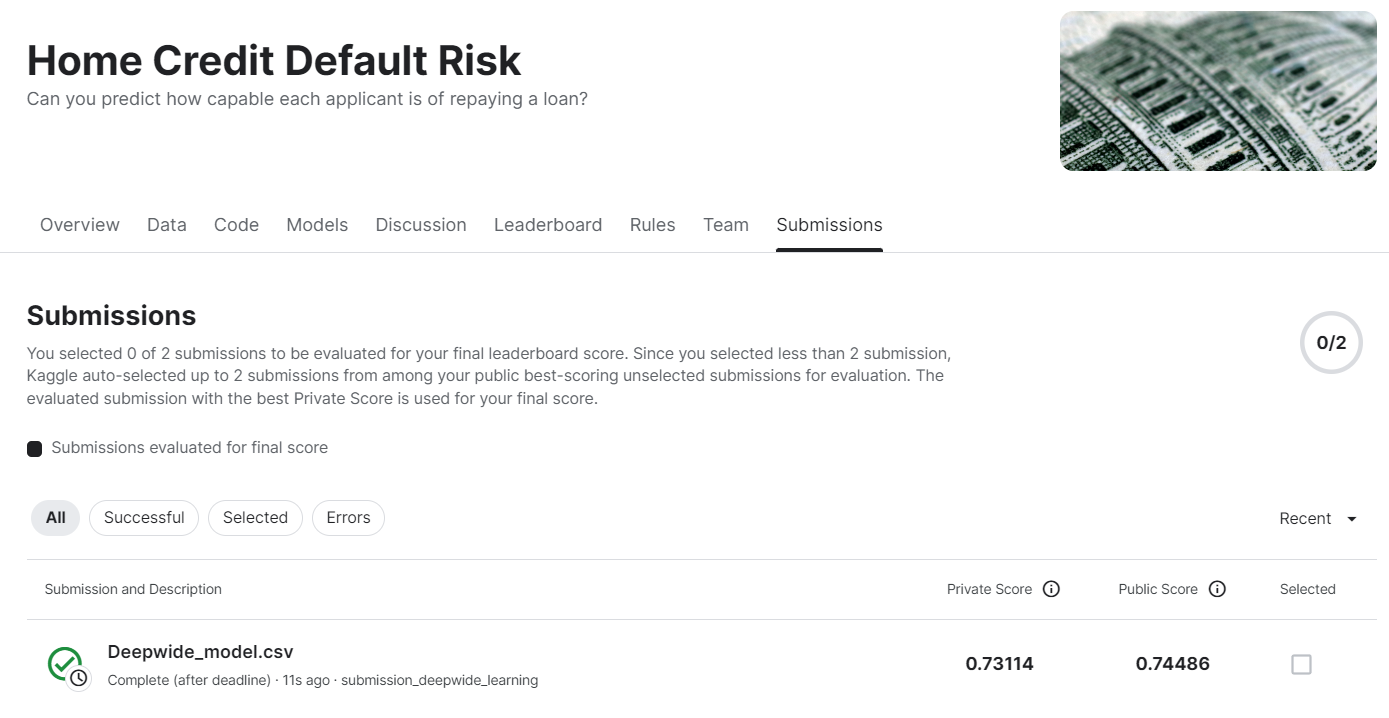

# Write-up 

## Project Title: Home Credit Default Risk

## Team and Phase leader plan
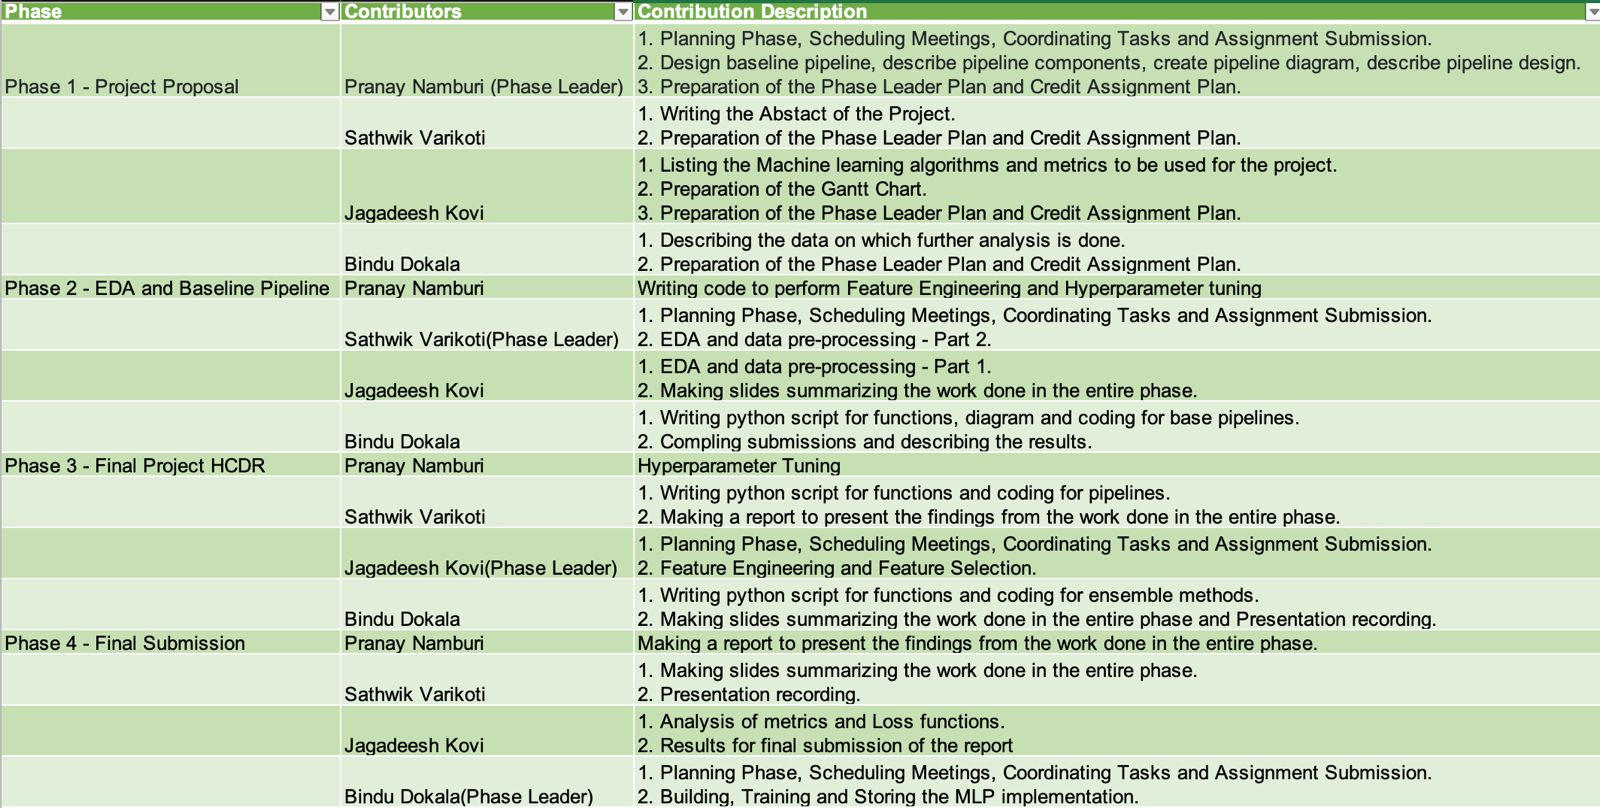

## Credit Assignment Plan
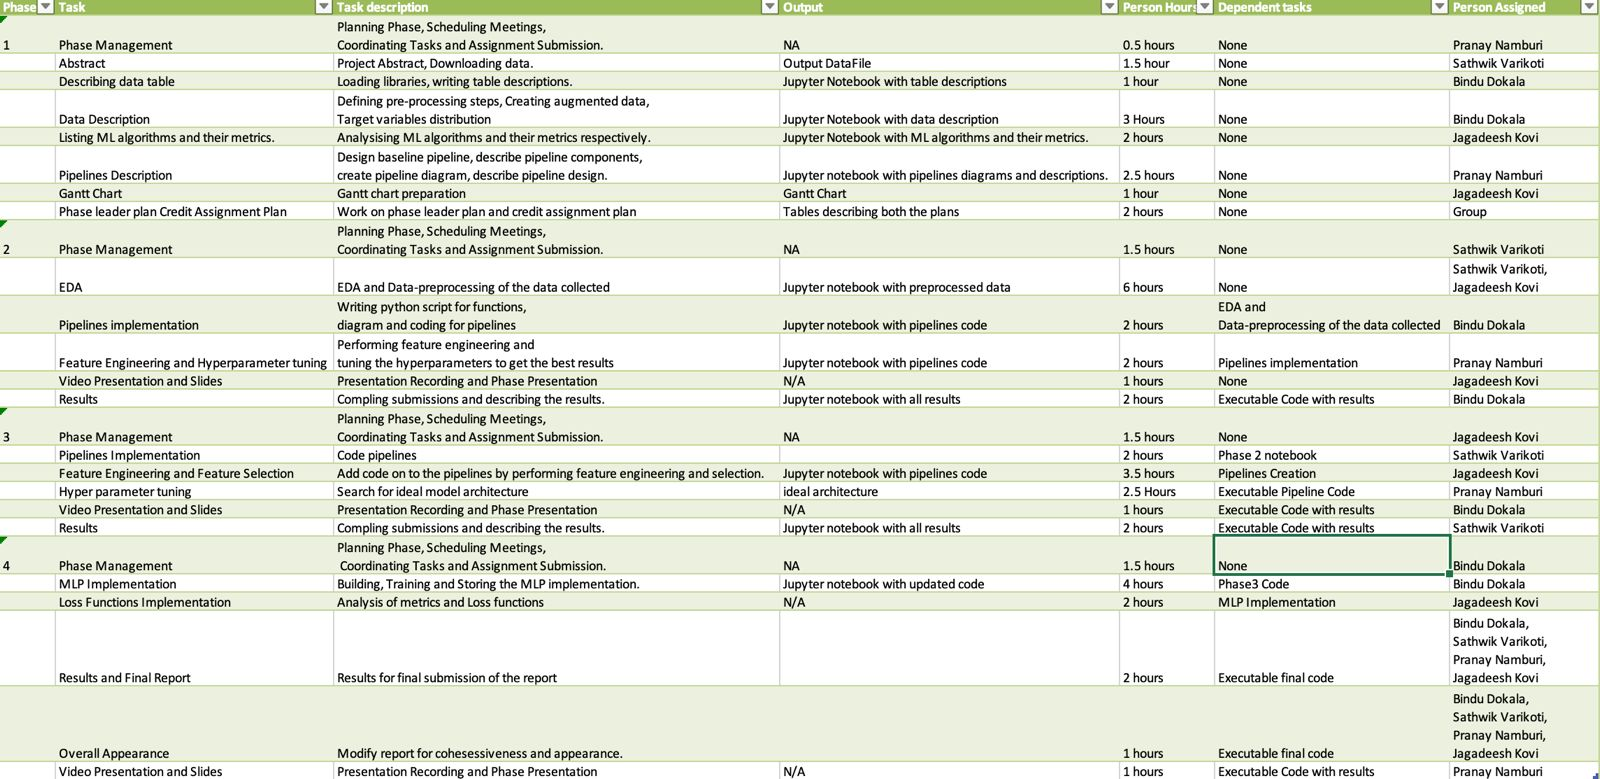

## Abstract

In response to Home Credit's challenge of assessing creditworthiness for clients with limited credit history, our project employs Logistic Regression with Lasso regularization (LASSO-CXE) and the K-Nearest Neighbors (KNN) algorithm.

We tackle data challenges through advanced techniques such as data cleaning, feature engineering, and the creation of new features. To address imbalanced datasets, we evaluate model performance using key metrics such as ROC AUC, F1 Score, and Balanced Accuracy. These metrics provide a nuanced understanding of the classifier's performance, considering both false positives and negatives.

Our goal is to enhance Home Credit's lending decisions, reduce unpaid loans, and extend financial services to individuals with limited access to traditional banking. The Logistic Regression model with Lasso regularization aids in feature selection and prevents overfitting, while KNN's adaptability proves valuable in assessing credit risk by identifying patterns in borrower profiles. This comprehensive approach ensures the development of a robust model for effective credit risk assessment.

## Introduction

### Background on Home Credit

Home Credit, a non-banking financial institution established in 1997 in the Czech Republic, caters to individuals with limited or no credit history who might otherwise be denied loans or fall prey to unscrupulous lenders. Operating in 14 countries, including the United States, Russia, Kazakhstan, Belarus, China, and India, Home Credit has amassed over 29 million customers, granted over 160 million loans, and accumulated total assets of 21 billion euros, with the majority of its business located in Asia, particularly China (as of May 19, 2018).

Currently employing various statistical and machine learning techniques to assess creditworthiness, Home Credit seeks Kagglers' assistance in unlocking the full potential of their data. This endeavor aims to ensure that creditworthy clients are not overlooked and that loans are tailored with appropriate principal amounts, maturities, and repayment schedules to empower clients' financial success.

### Data Description
The Home Credit Default Risk dataset, obtained from the Kaggle project, aims to help Home Credit make informed decisions about loan applications for individuals who may not qualify through traditional banking systems. To accomplish this, Home Credit gathers various data sources, including phone and transaction records, to evaluate a borrower's ability to repay a loan.

At the heart of this dataset is the "application {train test}" table, which contains the loan applications that will be analyzed for potential default risk. Six additional tables provide supplementary information related to the primary table, forming a hierarchical structure. Detailed explanations of these tables are available from the HCDR Kaggle Competition.

#### Data files overview

* __POS_CASH_balance.csv -->__ Shape: (10001358, 8) --> Numerical Features: 7 --> Categorical Features: 1
* __application_test.csv -->__ Shape: (48744, 121) --> Numerical Features: 105 --> Categorical Features: 16
* __application_train.csv -->__ Shape: (307511, 122) --> Numerical Features: 106 --> Categorical Features: 16
* __installments_payments.csv -->__ Shape: (13605401, 8) --> Numerical Features: 8 --> Categorical Features: 0
* __bureau_balance.csv -->__ Shape: (27299925, 3) --> Numerical Features: 2 --> Categorical Features: 1
* __credit_card_balance.csv -->__ Shape: (3840312, 23) --> Numerical Features: 22 --> Categorical Features: 1
* __installments_payments.csv -->__ Shape: (13605401, 8) --> Numerical Features: 8 --> Categorical Features: 0
* __bureau.csv -->__ Shape: (1716428, 17) --> Numerical Features: 14 --> Categorical Features: 3


<br><br>

1. `application_{train|test}.csv`: This table contains static data for loan applications. The "train" version includes a target variable, while the "test" version does not.

2. `bureau.csv`: It holds information about a client's previous credits from other financial institutions reported to the Credit Bureau. Multiple rows can correspond to a single loan application.

3. `bureau_balance.csv`: This table provides monthly balances of previous credits reported to the Credit Bureau, creating multiple rows for each loan's history.

4. `POS_CASH_balance.csv`: It contains monthly snapshots of the balance for point of sales and cash loans that the applicant had with Home Credit, generating multiple rows for each loan's history.

5. `credit_card_balance.csv`: This table shows monthly balance snapshots of previous credit cards the applicant had with Home Credit, with multiple rows for each card's history.

6. `previous_application.csv`: This dataset includes all previous loan applications made by clients in the sample, with one row per application.

7. `installments_payments.csv`: It covers repayment history for credits disbursed by Home Credit, with one row for each payment or missed payment.

8. `HomeCredit_columns_description.csv`: This file provides descriptions for the columns in the various data files, helping users understand the data better.

### Data Dictionary
The data download includes a Data Dictionary named `HomeCredit_columns_description.csv`. This file provides detailed information about all the fields present in the accompanying data tables. In other words, it serves as a comprehensive metadata resource for the entire dataset.

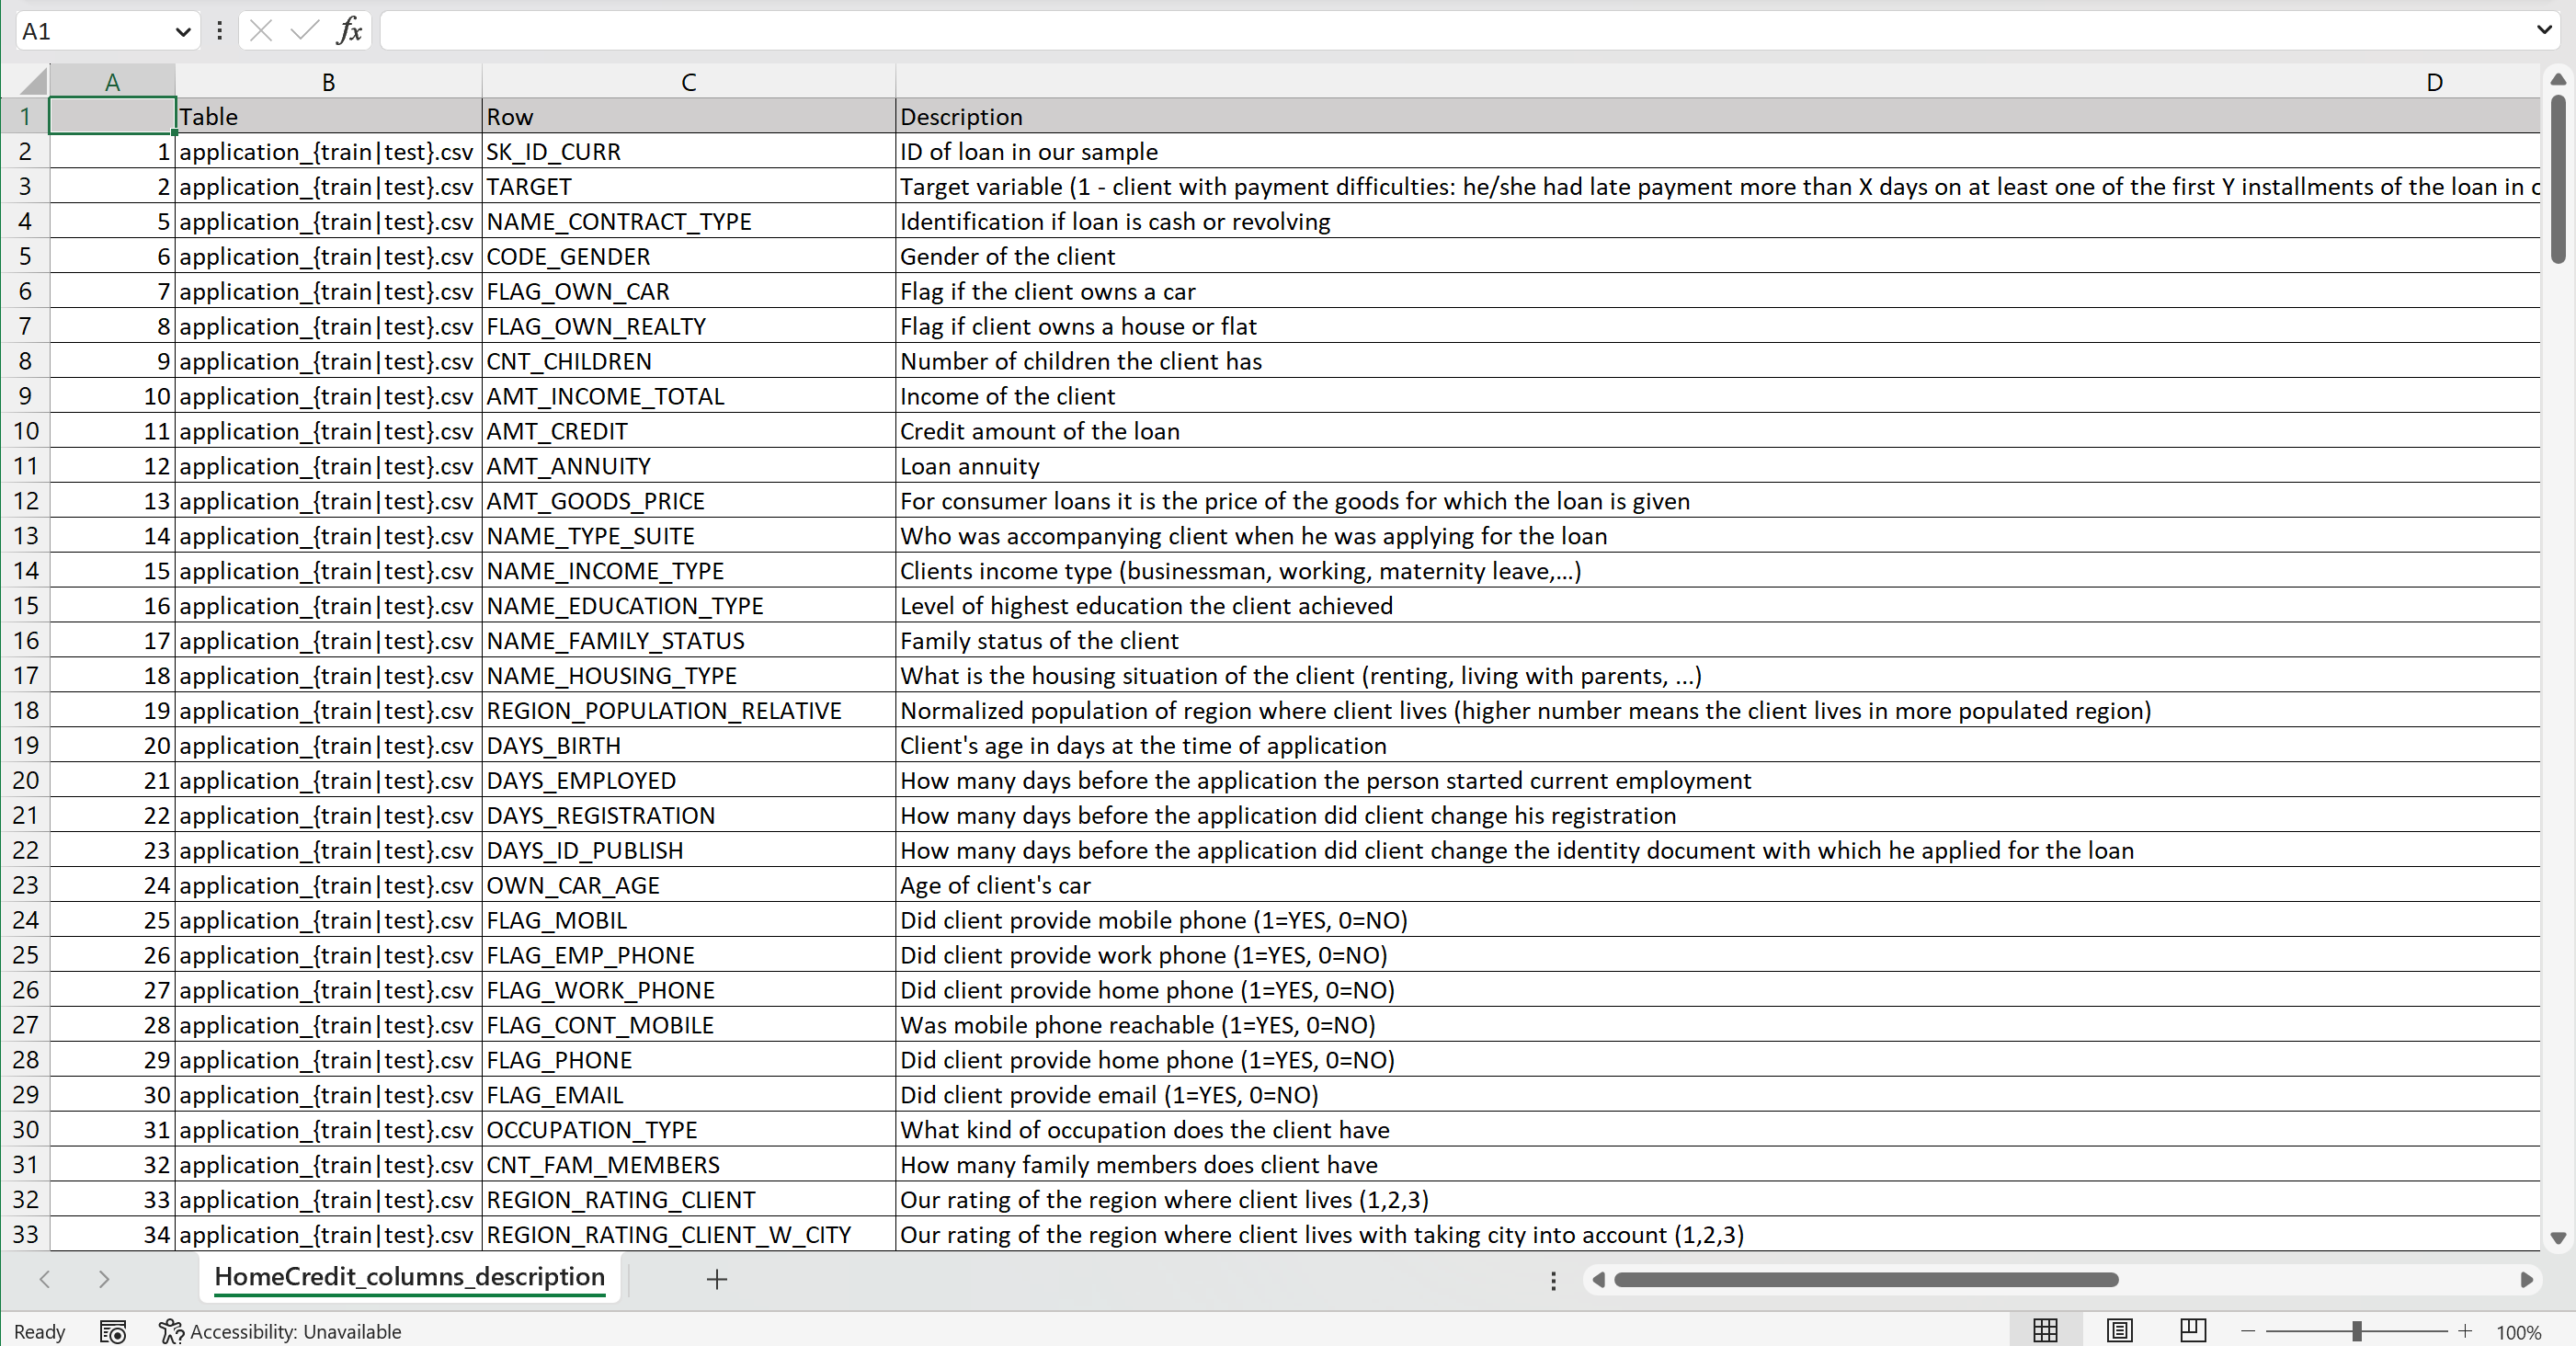

### Table Diagram

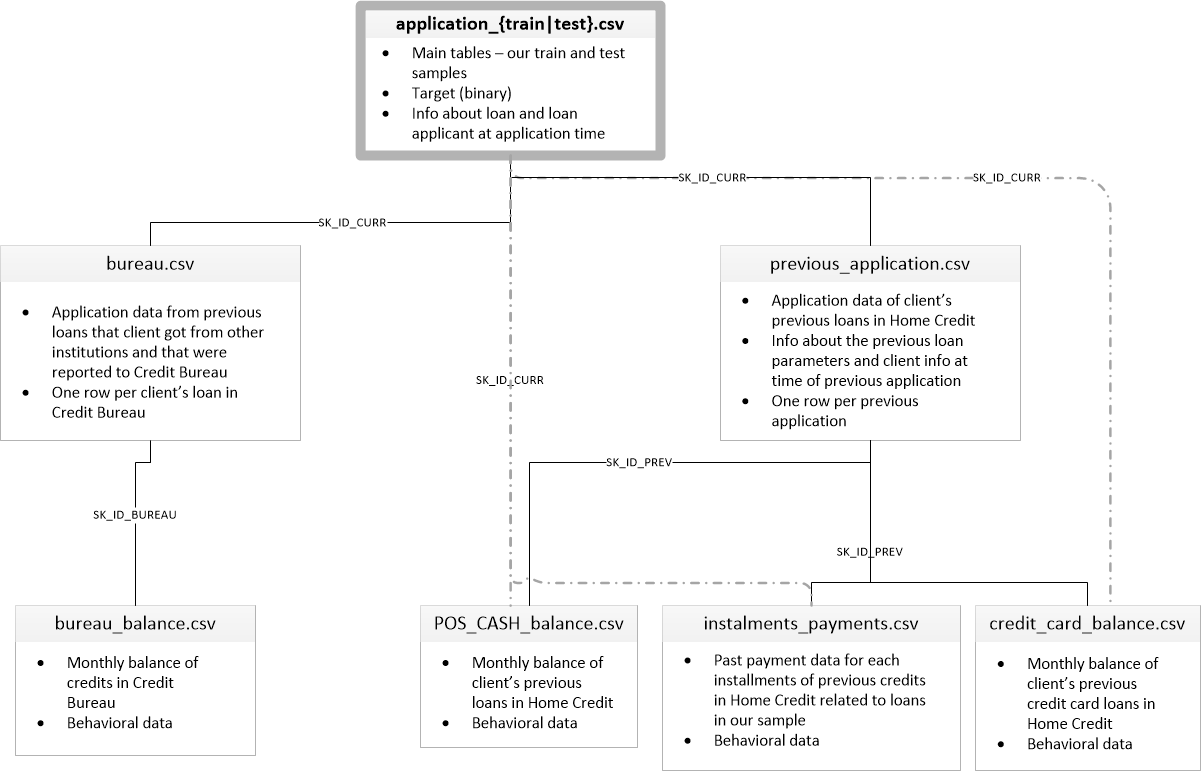

### Tasks to be tackled
The tasks to be addressed in this phase of the project are given below:

- **`Join the datasets`** : Consolidate the remaining datasets into a unified dataset that encompasses all pertinent customer information.

- **`Perform EDA on other datasets`** : Perform Exploratory Data Analysis (EDA) on the individual datasets, excluding the application_train dataset and the merged datasets, to uncover patterns, trends, and relationships among the various data attributes.

- **`Identify missing values and highly correlated features in the merged data`** : Identify and address missing values within the merged dataset. Additionally, eliminate highly correlated features to mitigate the risk of multicollinearity.

- **`Detect and mitigate potential errors in the merged data`** : Scrutinize the merged dataset for any errors that could potentially impact the model's performance. Implement appropriate measures to rectify these errors and ensure data integrity.

- **`Incorporate domain knowledge features`** : Incorporate domain-specific features that have the potential to improve the model's predictive capabilities.

- **`Analyze the impact of newly added features on the target variable`** : Analyze the correlation between the newly introduced features and the target variable to assess their impact on the model's predictive accuracy.

- **`Build upon models from Phase 2`** : Augment the existing models from Phase 2, particularly Logistic Regression, by incorporating the newly extracted features and insights gained from the current phase to enhance their predictive capabilities.

- **`Model selection and training`** : Select appropriate machine learning algorithms, including lasso regression, logistic regression, decision trees, random forests, gradient boosting machines (GBMs), and neural networks. Divide the data into training and testing sets and utilize the training data to train the chosen models.

- **`Calculate and validate the results`** : Assess the performance of the refined models employing pertinent evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. Conduct thorough validation to verify the models' efficacy in predicting default probabilities.

- **`Model evaluation`** : To assess the effectiveness of the developed models, we will evaluate their performance using relevant metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. By comparing the performance of these models based on these evaluation metrics, we will identify the model that demonstrates the strongest predictive capabilities.

- **`Perform hyperparameter tuning with GridSearchCV`** : Employ GridSearchCV to identify the optimal hyperparameters for the selected models and enhance their predictive performance.

- **`Perform ensemble modelling`** : Leverage ensemble modeling techniques to potentially enhance the predictive capabilities of the developed models.

The implementation of the most effective predictive model will empower Home Credit to make informed lending decisions, reduce the likelihood of unpaid loans, and expand financial services to individuals with limited access to traditional banking, thereby promoting financial inclusion for underserved communities. The performance of our models in predicting default probabilities will be rigorously evaluated using key metrics such as ROC AUC and F1 Score. Additionally, we will assess both public and private scores to gain a comprehensive understanding of our model's efficacy.

### Block Diagram of Approach (Full Project)

![phase 4 block diag.png](<attachment:phase 4 block diag.png>)
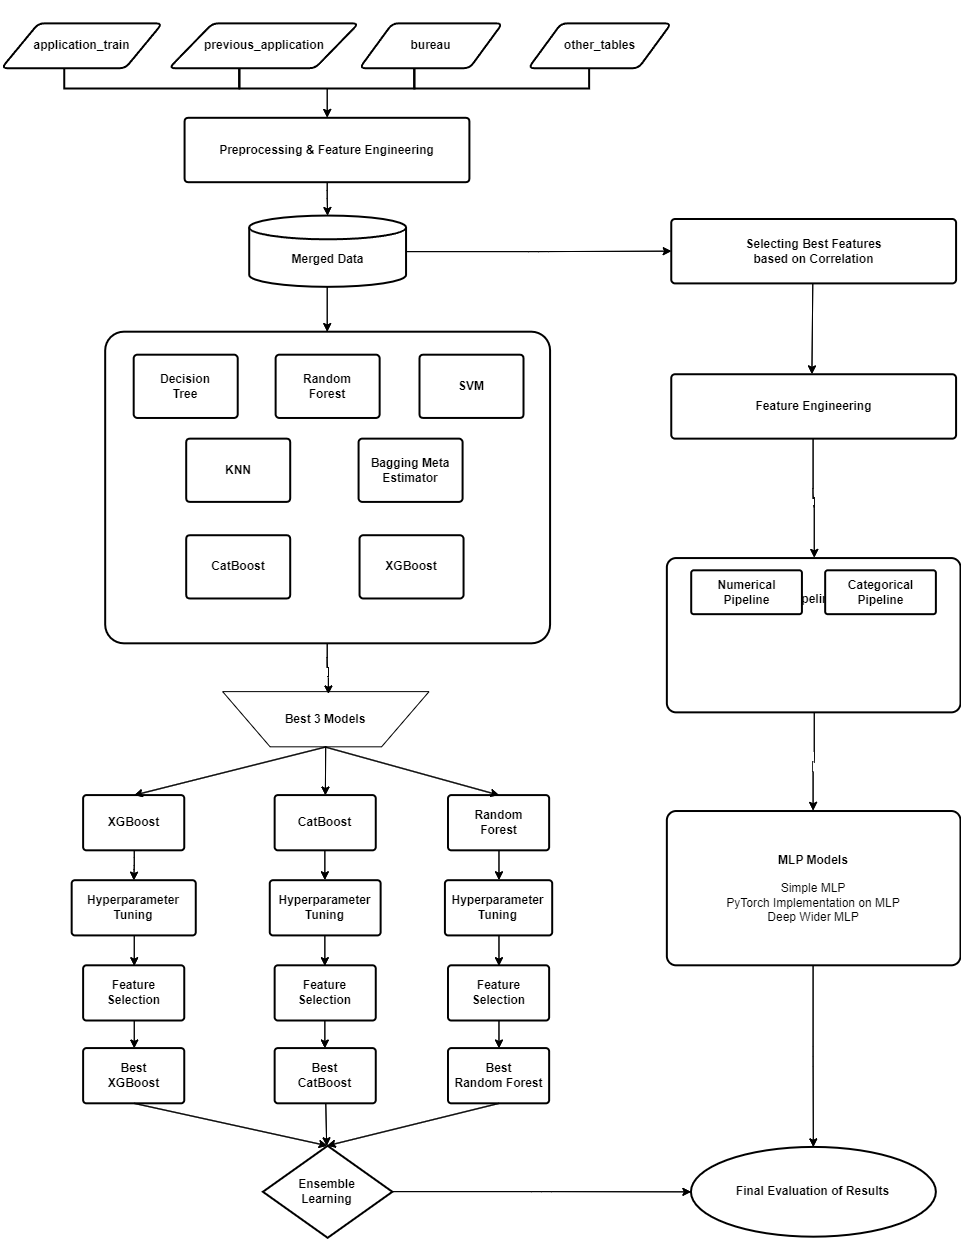

## Pipelines Implemented (Phase 4)

- Families of input features: 
  - Count of **`numerical features: 107`**
  - Count of **`categorical features: 16`**
- The total number of input features: 124 input features with target.
- We have below trained **`Three MLP models`** :

1. Simple Multi-Layer Perceptron (MLP) 
2. PyTorch implementation on MLP (enhanced MLP)
3. Deep Wider MLP architecture

## Block Diagram (MLP Models - Phase 4)

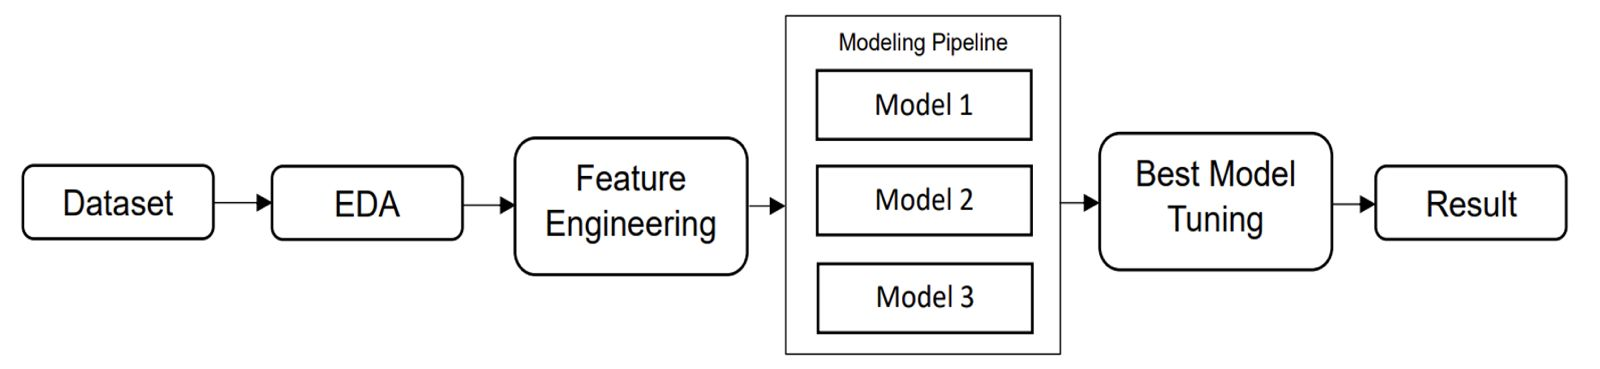

## Data Leakage

Data leakage occurs when a model is trained on information that will not be available during the prediction phase, resulting in artificially inflated performance metrics. To prevent data leakage, the dataset should be split into training and testing sets before any data preprocessing is performed. Missing values should be handled and standardization should be applied to each set independently. By training the model on the training set and transforming the testing set using the same method, we can ensure that the model's performance accurately reflects its real-world capabilities.

## Cardinal Sins avoided:

Our machine learning pipelines adhere to best practices and avoid the cardinal sins of machine learning:

Overfitting Prevention: We split our dataset into training and testing sets to prevent overfitting. The model is trained on the training set and evaluated on the unseen test set. Similar accuracy on both sets indicates that the model is not overfitting.

Convergence Monitoring: We monitor training progress using Tensorboard graphs and avoid arbitrarily increasing epochs. We only increase epochs when the loss curve indicates a high learning rate, ensuring convergence.

Balanced Dataset: We ensure a balanced dataset to accurately evaluate model performance using metrics like accuracy and ROC_AUC.

Accurate Labels: We employ accurate labels in the training dataset to ensure the model learns from reliable information.

These measures safeguard against common pitfalls and ensure the effectiveness of our machine learning models.

## Loss Function used:
The binary cross-entropy loss function will be utilized by this MLP class.

$$
CXE = -\frac{1}{m}\sum \limits_{i=1}^m (y_i \cdot log(p_i) + (1-y_i)\cdot log(1-p_i)) 
$$


## Number of experiments conducted:
In Phase 4, three models were tested:

 **`Simple MLP:`** 
- Experiment 1: All features before feature selection
- Experiment 2: Selected features after x>0 from Phase 3 findings

 **`Enhanced MLP (Model 2):`** 
- Experiment 1: All features
- Experiment 2: Optimized learning rate and epochs
- Experiment 3: Selected features after x>0 from Phase 3 findings
- Experiment 4: Experiment 3 with adjusted learning rate and epochs

 **`Deep Wide Selected (Model 3):`**
- Experiment 1: All features
- Experiment 2: Selected features

In total, **`8 experiments`** were conducted in this phase.


## Final Experimental Results (Phase 4)

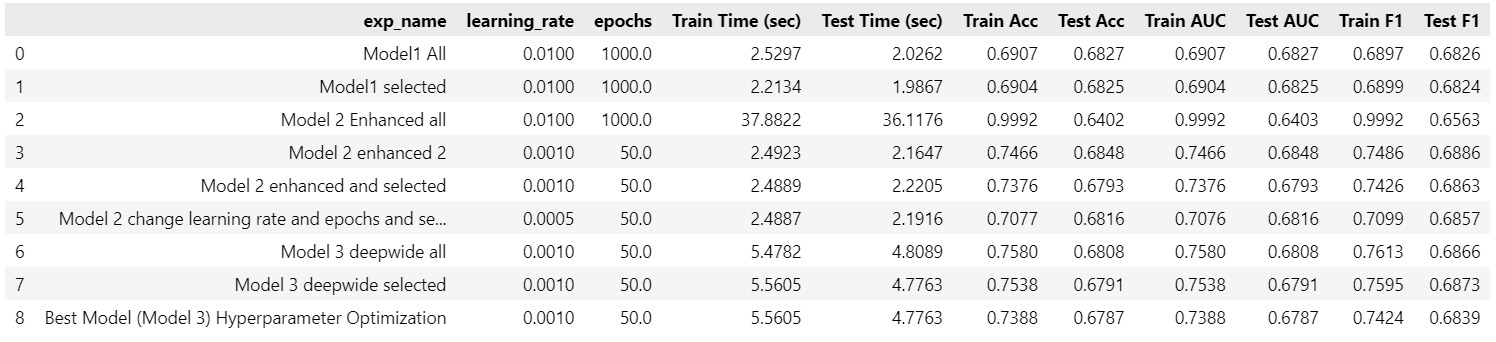

## Discussion of Results
The table provided contains the results of several experiments that were conducted on a given dataset using various machine learning models and hyperparameters. The purpose of these experiments was to analyze the performance of the models and determine the best performing one.

One important factor that emerged from these experiments was the role of feature selection in determining the model's performance. In particular, Models 1 and 2, which were trained on all available features, did not perform as good as Model 3, which used selected features. This suggests that feature selection is an important step in the machine learning pipeline, as it can help to reduce overfitting and improve model performance.

Another key finding was that hyperparameter tuning can also have a significant impact on model performance. Model 2 Enhanced 2, for example, outperformed the other models in terms of test F1 score, suggesting that the changes made to its architecture and hyperparameters resulted in a better overall performance. Model 3 Hyper Parameter Tuning also produced a slightly better test AUC score than Model 3 Deepwide Selected, indicating that even small changes in hyperparameters can lead to improvements in performance.

However, it is important to note that Model 2 Enhanced All did not perform well on test accuracy, suggesting that overfitting may have been a problem. This highlights the importance of ensuring that models are not too complex or too tightly fit to the training data, as this can negatively impact their performance on new data.

The enhanced MLP (Model 2), which has a training accuracy of 0.7466, test accuracy of 0.6848, training AUC of 0.7466, and test AUC of 0.6848, exhibits a more balanced performance across training and test datasets. Similarly, the F1 scores are 0.7486 and 0.6886 for training and test, respectively. This model has higher accuracy, AUC, and F1 scores compared to other models, indicating that it is able to generalize well to unseen data without overfitting or underfitting.

Another promising candidate is Model 3(Deep wide selected), with a training accuracy of 0.7538, test accuracy of 0.6791, training AUC of 0.7538, and test AUC of 0.6791. The F1 scores for training and test are 0.7595 and 0.6873, respectively. This model also demonstrates a good balance between avoiding overfitting and underfitting while maintaining good performance across different evaluation metrics.

In conclusion, the enhanced MLP (Model 2) and Model 3(Deep wide selected) appear to be the most promising candidates for this problem. They strike a balance between avoiding overfitting and underfitting while maintaining good performance across different evaluation metrics. Further tuning and optimization of these models could potentially lead to even better results.



## Conclusion

Ultimately, the goal of this project was to use previous data to forecast the probability that Home Credit clients would default. With customized features, we inferred that default risk might be reliably predicted by machine learning algorithms. In Phase 4, we experimented with Multi-Layer Perceptron (MLP) models and found that Enhanced MLP and Deepwide MLP showed strong performance, with test accuracies of about 0.68 and test F1 scores of 0.68.

Our project highlights how crucial feature engineering and hyperparameter tuning are to maximizing model performance.  Further enhancements may involve experimenting with model architectures, regularization techniques, and hyperparameters. Additionally, feature selection may be improved; dataset sizes may be expanded. Experimenting with hyperparameter and advanced ensemble approaches may be employed to enhance lending judgments.


#  TODO: Utilizing the Featuretools library for automated feature engineering, as well as employing advanced models like TabNet, LSTM, and Transfer Learning models beyond the ones available in PyTorch, to forecast loan repayment.

Please find the references below for your perusal:

Predict Loan Repayment with Automated Feature Engineering via Featuretools library:
Github link: https://github.com/Featuretools/predict-loan-repayment/blob/master/Automated%20Loan%20Repayment.ipynb

A Guide to Automated Feature Engineering with Featuretools in Python:
Link: https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/

Feature Engineering Paper:
Link: https://dai.lids.mit.edu/wp-content/uploads/2017/10/DSAA_DSM_2015.pdf

Automated Categorical Data Analysis using CatBoost:
Link: https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/